# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

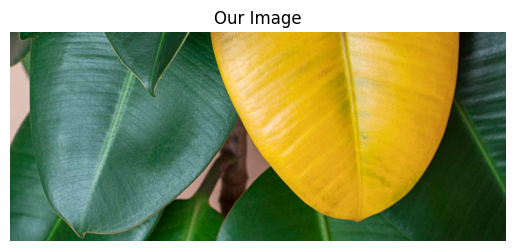

In [3]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [4]:
# @title
img_str2="""/9j/4AAQSkZJRgABAQAAAQABAAD/4gJASUNDX1BST0ZJTEUAAQEAAAIwQURCRQIQAABtbnRyUkdCIFhZWiAHzwAGAAMAAAAAAABhY3NwQVBQTAAAAABub25lAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUFEQkUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApjcHJ0AAAA/AAAADJkZXNjAAABMAAAAGt3dHB0AAABnAAAABRia3B0AAABsAAAABRyVFJDAAABxAAAAA5nVFJDAAAB1AAAAA5iVFJDAAAB5AAAAA5yWFlaAAAB9AAAABRnWFlaAAACCAAAABRiWFlaAAACHAAAABR0ZXh0AAAAAENvcHlyaWdodCAxOTk5IEFkb2JlIFN5c3RlbXMgSW5jb3Jwb3JhdGVkAAAAZGVzYwAAAAAAAAARQWRvYmUgUkdCICgxOTk4KQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAGN1cnYAAAAAAAAAAQIzAABjdXJ2AAAAAAAAAAECMwAAY3VydgAAAAAAAAABAjMAAFhZWiAAAAAAAACcGAAAT6UAAAT8WFlaIAAAAAAAADSNAACgLAAAD5VYWVogAAAAAAAAJjEAABAvAAC+nP/bAEMAAwICAgICAwICAgMDAwMEBgQEBAQECAYGBQYJCAoKCQgJCQoMDwwKCw4LCQkNEQ0ODxAQERAKDBITEhATDxAQEP/bAEMBAwMDBAMECAQECBALCQsQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEP/AABEIAl8B9AMBEQACEQEDEQH/xAAdAAACAgMBAQEAAAAAAAAAAAACAwABBAUGBwgJ/8QAQhAAAgECBAMGAwcDAwUAAgEFAQIRAAMEEiExBUFRBhMiYXGBMpHwB0KhscHR4RQjUghi8RUzQ3KCFiSSU6IJRGP/xAAaAQEBAQEBAQEAAAAAAAAAAAAAAgMBBAUG/8QAKhEBAQADAAICAgICAwACAwAAAAECAxEhMQQTEkEyUQUjFCJhM0NCUnH/2gAMAwEAAhEDEQA/APzqfV3baWOxAI9zXzHsLBRfhbNty8v5qXVSraIZPyP8elBJYfC0UdQmahqrp5kCrZLJn6HQCoUqghH1INBAIoiTilotBz/PlQXRC94ALEwAATNFjuKozFGzAQBtJJHSdKIVKCe8dlQkkgExRaozc2HoeXKiFzlkjeTlPNR9c6cWkbEkhQACQfqaMwUaJ8TM8RmERPn/ABRn7Hmj8zry+uVcaBY+IgEwPKK0QtUY6FWU8gRvRa7erBAQSdgD5/zRBhPmB6mKh2CW42UKxZsuwLTr1gHUVqhTKhu93afMfuvAn8KNAsJnQ+HMBAmTP81KVFW0zLlkgbg0WXcZTcbMYrNw1H7ti+RHgQM4zLMjXoa0SZdxd68rlwuUiIt21AJnTYDTT8qDGUr4rRXMZEagSNZFAZf+y6ZV1IM5QCImgALaH/j111Bg8z6flQLiCSI18qA82bVlXNzYKATQDlzKWn4Y/OoSlWpAN/MESd6Au78Iad/kPeoc4BtFC9CT86OLoBy9TqNxyoeky+dBMoOp1PM1qC71+ixzUIAPboay/bvUW4wP9wKyHWSNAa1B96SfGiA82C6xQAoXLkCwsEEdZP4EVLqHWNSfUyaCB7i/+QHrG8zvPKgly5efNde8xPONKA7j3rmZmvE5ohtgT6bHf1oE52+8c34VtxywYuMFKm6RJEwT0Mj8azZjKXL4S0C8RmJYQPP2o0Zdzha4Re8vYm2GGw5mSBoeROtHGMLb3NF2KxqdwR4ZI20o6x7hYXGzJHnMz71LokW8GDoXVk8UhtQAKpxlWrVx10JMEiQQJ19KCnHd3blnMpymJMiaFpanf0mpdV5jbkaCb6t/9N51AqjsWDE6AyI1G1GqqtksGP3G9QpRE0RZ1AIotS0ZxFo0XQSiDDbhWIdWMzAPKaOBQ7kAEcpAJPoDQGpVmCu0M7fFuTqP2pGiQwlygm4CACJrVxWVh8UL6mpdFH93u4B8zMe1AObPJIGYbxzqAsDkNSSABVoOLNbuZVQlVOgDEcvOZosKDvOTFpBHMsZ2OtQCt/EG6bztPrXAQCn4lmPPyj0/DlXXKi+J1t/5iYGny6UdWQw+JQPOSTtz+VOuKdlDeFWzsASpcGKt0o21HxKT6iPrT86gW7Q2QjQaEbH0oIrMfhOTrl0kdK4CNxrjFlVhP+JAM/KuiiczMA/eKokM0z+dBCFBgJlBjQmSAdp+VAGXzoJl8/c7UQF0mNaLQJPOgqZ5fnQRTlExv5jbrREWmjBun7UWvLvrtP4UC35fvRnV0cVDfdWfeguh5WyACSQR1BmP4o6hXKSoMqG1OsGKC2U/zyNHfaDXQggjcEVYjeKocoWVNMgcaa5jMnyq3UURPprtt1oLDNbYMpoIndp9wa9WIPy50AumWNZmqScuIe2irZu6r96KCr2Ju3rhjEZlHw5jFAsNmyrbGVySCH8Wg5k+/wAqlSnFs5XTOC4lw2oBkjQ89qpI7bTm30Ezm1EdDyoH4dnCuE1Gad/IUQVcX4tfi0J5gjpRpFAxIGpIgCpdCrxc2nJv5H+KCLooXpPrvQXRafXvQEp8LL1gj9DUIDRaUQlFroKoJQSWHwtFBbLl99R6UEBjlPkdqIMXLrmaNo8zP/NWtGZWghIPMzvoKgAgmdQI3k8qCzlHxXI/9TXBRE8/r6n510WBvruIo5wKCJo6Yq5p125czQG4zRowjqK5I50tmzcq6ScQ3W2fxA7ijprXLjaC6S33YaaCFm+7aB8xofeuWOSq+thXXLekuAMoG2WikWgYBk1OSNiW6eVWBz5f/Gn/APGgvNGa9cKjMQpJnK3Ue360FTOhIy8wTE0AkxUIGSuZVUg5p0I+H25fOiwZvKgsmFLdKCIP7mQ6AESfKdqIUGhcsbGRqdoGn4UWoHfTYkRzoiXqss8/bnRYNtSSBzIMVwH+Ln8a6ha+p/8Aoid+lGqb6nfmaM/2isF3aPajVCANAdf8Z29OtGKqCZlEZjEgGeVAJM+GPH/j/NWIGjQo4PPTUelBaNLA27mo2GwJJ68qAQfCxIgqYIoDJYKSW8I1gaR1I/CgAW1CgoMubUmRM+X/AAaAhmOgaBzkSD6/W1BRXNJBgEkiAYg9ByoIUQ/EJkmNBv8AKPegAiCIBAGwIigycPiFRXHd/eP6VTJLhtrbzd542JUrHIj4p9dIosolXRQFRCJLamWJPT8KAFDGcqzpFSpYbmVJPMgAzQNBy+c0FB55VC1ARVoEi52y5lGhOpqFqJWSFiBpIB/WiIUxY/FbK9J5iizACBBM0F0FQ25QgHYnnRCUWLu8vX3EcqM4hWP8jOogcutGg4mPQH8NqAkWLTXIZkaV0Gh9TyoBTSfSen5+WtHKjmY/cUJOIq76+/KhajDbxKJAOpijoec0Qmh0Ikfiff50WsjLqCwPIgxQHbdVnNkWRHMcqOUs3J+7ttrzocMZWb4hl6eYrknDqO3iZ41Ikj0/5rp7DdDBQSPxP11rnskAQQGhtF6110ecm5lu3NNMxCiTqOVauKz3THjjTTnoSdNPM/jUpDkYfEIqIs7JfFpcsjRjEyIB38uc1qyJAisq1WNVLQBBA0HUUiFrr+Znma1WEtKkRvWSEzeVFqdtgCAIkAnaiEH18qLUR4QvSdeRoIWQ7oD0jSgD686A20UkAEjYEb0Flf8AcvrOg9elEe1BYUmdvlRyKCAKAo2+Z9qCxbuFQ4RsrbEaA+lBZ+Ir00HpR1VHVkRRxAPOrAkKPhWKAWFxfufjQEfiIOpG568v3oByefoTsB0oJGZgvWgYAz3e9dyT5bkT+dAR0UmR4RMA6fX7UCSwKET4TuZ2+vOgZZRipVYIUxIO+lUyWMmmdZ0o1C2g/uQFgkAAa9KOKdWQ5WEEcp/Y1LoLh8JXrQNIjqfQUdLz2h8bFuXiEQY1jrUKU75LrAZgvKDAHqaBlrVsszmJOoBAoDYTGXWfh86Ba0Fhmb4mmPr+fnQSgKPP09KC8nefeXToZo51ZAX4zHSjvVATz/OgYFlWWd+gP60BPbzMV8Iy7wNzQCLcSCyggSQZH1zrgvbU6k7mRXXPaAeIA/E25ER8qHtDqgK3EMmIEmuAHCK5UMP0roqejJ7muenUa2TGuwy7HYV1yC7ufvqPXShL1CksWn18jvH4ih3gXTbxKOZk7mhFoPEV6qdYIAo6BqAmXN8JnvEQj0gT8qtASssSToeXU8qLX/cKkOMp+JSSNIMEfXSiAUWa4YNAWVUhmM8/5oLIjz84MUAS0w5npOx9ahHBObqKCX1bkZjaOW9WtW3IGeooJLGcrRII2+vOgop4chZsxAJmCRI86hmtfjB2ygnoNvwoss5n+K4NP8jpR1C+XlM0FnX+AJ+Q3oCa3lUtm28jRyVQSdAfEdh1o6JbbiSykACaCOgDFZmOYoj2o3bzW+5TEv3YJYIfh1EbfOjilPICTyg6z6/XKjqpX7pn2rVspQx+G259tqlkK2IVmhTAB1A/eigBHTR+7IOpBn57SIoheXI2bMpgkGD8zQQjmPi5HpQCR977/wDlQTLnZnJ1gnyJidR86pKye7uNpM6gyQQev50Fh22F3MOYjnEfv86lQRqpVtc2/Qjl9edBkYey9xWbMg8R+9VsgWzDi5lDFTpIBA31g1xpS4He94IYDYMukUPagYct1AEVLqyJ2o6hOSARIYAnkahqmXz+vr8a4hF9AfUV1nFqmaddgTPI0jRbHPqQASSTAgVqIvh+9v8A4msqz4h9VPSGmB0o0V18gTRBoHd+cx+X80VZ1I21YyQNTP8AFHRkSuXyG8kEjmaJ6gyn4nCxsCDMxy0o7FKjJdOaPCobQzuJ/aocCzd2xXK3nIiTO9W7Z1R+Er167j2o6LvPKjnC0ymVZ8oPlvR0aEiFOkgke1AS3MxaBAEsBofagAuBqEiaAyEyhCuZpJAMQdB09K4F/XKui2Odi236CuCZQJZ3/D60roJzEfsKOQC8soLSQywNxR1buxgE6DYdKsXcOZmb/cQZ3nfX50Qoaf211j4T10/Db8aLLoHvrcfUZGM7wGHKKzAMWPxeLp4Z0rRCakaLNQCIM5vunarWAupUqzqJ+E6EzynmahmomPrWraLOjFelQgXeeh8gdR+1FTwBxNxuXkNtzR1GXLGs+fKgmSNZ3oiLKqdEEHkOtFpQVIBBImiBMBAZAxHlyodLLAmY384HzEUcMcMYzIV6yBvzpx0sieY9jND2BVlQQwJbYA1YI5dMxCyJ0GtAahj/ANm43nGhH6DnQUTc/wD6hPSeQoKJ5kAKCQSBQA3LwRzAVYg+nKtg7LHPr+orEQHKytE5RlAO0eflv86pykMVZiytM1Lom0gDYcug50gPvf6aEjMreJWmJFemVnTkt2P7z3XObVrahZJaRE9B6SawUS7t3jhWEzEAzNHQ5vQ+hmpdU4YgF3DHmRzMDWgaut1Ds5MZpAOorNYXOgPX8q7BXiOjtmHMEaHWtRCWZiS0k7CsqJQT2YdZESOdBZoLRsrAkSOYkiRNECKKuiZQOQBmKLTLn1O/M9aCI8TpQF3n+38SKOc4WRP7DejqN0GgkkDpQRWZlZC0swgTsNf4rggMKzQpiNCJPt5V0OYxntrrMZT10/mgEhVjKsZhPmNSPb9jQQKyW2CPBcgaDUjXSfrlRzvUJy8h7CKcPaC3GcjKCgJBC84Ij3jfbWgpbbNbfKJ215DWjofYD0FECS4wZmUDUgwRIMcq1VUyzz9hvUuqIuLH3dIiQTv/ADQCWUqVVg087hk1Dg7yqL1xWUmGO4irSqZtOHJYCCATsOf6fKgFT5qPPQHblRZpWWY2khYmJ25x6bn1igEGVBGpOy8jQVJBkGgJNWZutQ5VNbY6mVGXMCCNfwq3UKPaaLo8JIk9RyoLCeJm8Qnqo/Wo4AKIih2uFVLQcuwHWnkRirKLy2yuckajTTmD+fv1q0BzMNQxBO5U+E+lFqqELBjkD6iixLpRC2Kpo5gnUiPxotc+IglZG5Jifb9q4IR3nll1Ox0j/iuuTwMGZ9CPr+RWrMluXL05en1yrNSt9ABPIAamqAjMfiafXce1BG1gDflO3zoLGZfhaJ+dAwhU0C+F21nYmOvXT8fKqcUH/wBqn11oFs0iQNvzqXRMgcFQ2h1nz6+lUkLlmYFkyjKqxPxADepUJgwYuVKk6oT+BoDtW0uLnuKCx5+1X2p6K4Ml1wHR5lJUkgjbpXHYHENYNwtYzEbSVAkxqfnPtFD0Vl212AFS6jtltjT4Z056mgsNldDEwZqFoVLggnf65UE20BbLyBMxQSgGglAwNkZlidIoDBmdDqZ0E6miFMuWNeUUVEGYyA0AklljVh0Fc46FtI99OW9dBOzLezm8MykEEQYP/MUFKf8AnmPSgpOZBUHkSfKggMqR1ohEKiczR09aLG2lxnGpMQw226VwEpVclxnUbmDpJiJ/H511mECKOrt6SDqu8HaYMfnWrnVho+6p9RNS6G4DAOUZc2ZgBB3oAuZdWZuQGX/KPPpWaxLbUyXClQYOYajziu9BWWcMWzxCmOs9Pzq0AotYE81HqSJ18qgNuWpbNm3302NWFhV0zPGoG0mOtEDVd1nxgSE5x0otWVnVbhR1QyM+XTNG380FgOtwW1WcpidtgaIARmMxll8sc/WoWgBEg8qsUFzc0HQt16TyqAMQpbpSIOtqz/CgbQMZ1MeXoB+FauAcL3aZViCR+A/ei+hW4rXEV1JtgyUDQT61KQuNgdG1kdNags6qgslSrKxjMZ2otFMToNTOgj6/OgpvDRFvEAzxy1A+dE+1EsPiSPejveDB5DRRsOlI7EYsvwtH7zvWrnsP151Lqj963AHnED3oIumh2O/TfrQNY22jx8gZjXUUFhbgENliQYEE+3P5VTntAvhZCxKtuCZqXSmds2VjMfX7UFtCkOjy/wDlG2k0AZy4JcyxMzQC1A+xiO6QrkmTO9UkLGduX70VFMzBcqtEkHYcqOVKlSETRxG8UeQj8ahYoi0nvQV9TyoKoJQSgP3A8yQBRCH4S3RsuwotBda18POgF70sWy7+dAbK2VVZ5ieX18hRyUvNm5UdMhT8LT7Ggo6clPrBo5xBoGICnSII0+VHRnxMV2y0c9IisJzLGsUOjbT8fz3P71yU4ttWK9PM9PL0px0rKq/Euauud6g8LMvy8z0oe0HwlYbxEKIE60dTJOoOnI0ct4YFhw07fjpU9dWQv3lzefKuycctAqefKJHkTsaV1YZlZWbM2saDrXXO9MGXXIxYgEsAs6DnVugBYTlaIBNELufd1USJ1iiwETyX3UGoTLxaO1wyxAKrMgchVqHcl1I1GYzJFZ0LYTqw16j0+tK0AHSfMR7VCDB4kYygCxoARNWsKi4reEgKZhupgwKID/4FB2DNr56UWG4ylZJjw+IQAFn+BRCi2cKdBAjU+dBXuD6GgifFcQBpEtqIkc6AGaGKxtQRmmAduY60BfDQWB4Q3WgI5mAzEyBEkRNAObNOnMmgpmy8qAvDsGzA7g7EcpoKoCTT4iCn3oNASZVkukjrO1AR7tVLi6Cw2I1EnlQJuctAPQUFwp1IkcjQRAqkkjPD5oYgmAROlADG2lwtZXQ6gMNF9KAlZgNDFU5Eo6lS6dc8I0AJIKgajSKhoxz8U9SBVsxExUOC/wDHuTlJOp6g0UEGaOiAX7z/AP8AHWgGglEJRa4nmo9TFAOXzoIqzOsRH5/X40FkKuqOCDsTpQWSTvQEBOg35DrQQ5futPtQMthTOZsseXLrXPTlLJlia67BP6qZJMgyff660DF08TEf7mJiuWOSqYSzN/kIrrnUGjhulHfRhtwqrMxz1g0dR0bKVViJMSFn651yOKc7asN9jHOK6UatyI0PzJjTXlXO9dTM6qrK0ZpnQbgbaV1wISOfsQSKHC8oQx4YJABRdDXD2YyXVtZyfCTAYfeGx/OtHQ9R5TPMiR+9Z8cVb5g7HcddDWjoggM5iAVMEFZiociovgFrbksByAGnMVbomJRipJJHNTANQ53hR6DRRsOlW6op3mgMGCQP8jQDlzliD4WAHrrRC2Khi0Ks8gPL+aAY8IWCI5xoR1oJ90jnAE+goBC51VH8RBgbgmfOgrropkEaiTQR+WoHqaCMJgDc7CocvlTCWLhZDc8sge/yq3VnX9fSgHfkR6iAKC01YL12POfOoclWtnkLhJOwb9elW6pjCkn4huKhyoLbd2CBIUgE9J/n86t1SvLZY3BFQ53olby3IFW6YjNbjK0Swj/25UAssM5zDT7rGOu4oBucqCb6kkMd4gD5UEJuD4B60CngkAakfEepoDQyDpsf0qmRrW8vOjWXoTmGitqeXU1IJmURmMafM0dKI8+ZFBIYfEsVDRbNlXNEwQaJoA9wRNxjJA1rgYDP6etdE9gfUAj5GiEotKAjpHkAp23FHAfDR1PhoL38W8/e6+1EQdFqU+WxB3NAz4lLjQvsdTFBdtt9Nedcs656GiZp+EQJ2+95dK6ShFvJPeJMiBQtVbXfWotchh1UrC+LQyCdPnXOu8EE8QXxGegmnHRheYCAgAA5a0Fj4jAUE7QIPzoKInkx9BP8/RocVDH4rjN0n0n9KAmVgqqwcRPxelQSFrcZWDKdAfnVtUIn/IAggyIknnUMUYMWLM0z5c6toLN/tUegiiEAU/C0x8Wmw50EIjmR6RUOcD4Rq65iRvtVOpEjcn1M09gG8PyJPr1rogM/kPWucc6A25VtfGkyvkK6lTL/ALgfQ1YomKCnCt8QmATQFCZS7CWWMs/EFI50dLajiirZiBkIXc5qAbqxBBkGYNAT/EbcAuv3SOVAsjL5zQRip+Fp6bfFyoLCq3xPl9qBtr/ur7k+gnX8KCmbvLQc5SYAMGSfSgWRH/FAy5mFs5liQIEgkqaCL9RvQN+JlXrzoFZVCMFSJ0OUUAlSQCToSZFBcMPiWPXY0As0NMb7+QoLIBJI3Jk0D8JwzE420bthkgHKR3qpBgHY+tU4FizMWVZn9/4oforyOo5iTUuoy7aAQI0Eef60EZvLYkUFt445uBHqB+1Q4BzEfQoUIE0c5TFCiczRpoI1npRqvLQVQWDHIH1FBVEC+H35HcUWr4Z0BkEazRAqLMzbACSQCBzNHOBtnxBf8iBQs6JSo1doAIM1DhpSEJZjI1IYyPWfn8qp1Vk/EseCIC9D1qSGWxli55Ex7U5wQKuXwjK5BOX696t0OT/eV9YH71nHOjltcrRII5HcVo6Z3M6hoYbGKhyhdcjFZmPlVOwSoy/EIqWqERqQCx3JHlRl+zGVtMuU+pjlRqBlMFGUg/X4Uc6hE+X40cWEm6mvp68v0qxQZhqjZSNRl3n051BJ1SorT3iq0/FlgTrH6/jR3iZS4nyB2HOjLqNmJGdpHSAKOdDl86O9DcTMxYmDBJUakmPr5V3p0s29CM2/ltVHEKMyFVE+HLPP0PX0rlvniS7lmGAFxcuVYJ0nSa0AkQoWeRHzoAa3mVWldZiVJ0o6Y+c5SoVzlAYgmZnSdPQe9Q0KcKGKqGEEjQ71bNR/49Io4ksfuxPw670FOugAMfjQU3oT6CgjBXbMoy5iNtVjlFBMkffn3mgDL50DAyZWDAKzaAgaekfWtBZgLLNr6a/80FfdAAUMuxAoIDuDowEkUDlZVVXMEMcqkiRE8vnQDcgiQAANiBFAFwGWXOFMwQTQUCNSDMRpyOv8UAnVmb/IzQF31y0pVLjKHWGA+8KCxLCcqj2qnIc4QJ4h6UchSuy/CYmpUECKC5XuVykswMkAaR1mgX+00A5/L09aOjGjBo28wSahqK397zEUYftYMUaIfrUGgi6sF60QJWYaBsrc16a9K4tYE8gfUV0G4zwelck451Xd+ddOrNljoNWG46a1BRA5WDSunUxVkWfFAhc33dNSZ2JNQG+JmZyGVSCRlOhE7eR8QNANu4zajOqqQSV2B2GlHIO4VzZVSI8z+laqCGA/58orI4JRuAGCjYEUWJLOVg2bbU6aAetAZPMARyIoCA/55/P5fLlQVmzdB6mgnXyBNFDZu70FyGbYRv1oVMxIy7AbDpRK1tu/wCYqO8G34T2T4tx26tnheAv4xn+DurZI9zUXdz07HpHBf9NPb3iGU38PhsKrgEG9ezECJiFB/GKxvyouTrosN/pL7Q4nMtnG4MXFgOpVxpz5SV25Vz/lx248a3tH/pR+0ThGCucQwr8Mx2Dtxmu4bEBisxqV3A13p/y4zs44Liv2WdrOFrmxHA7pUH4rRDiBuZBrabnHM4rhGIwbMtyw9sySQylfziuzbBh3cK+QgazWsvQm5aurHxn/AOqrvWZd1CHLLEEc2P6zUi2HhIIEHeVBA9BWjqnVrRAUZIIJ2O1BVzxNnJCqdyTz+vyrlCXR0hXJ1PiBMgcxBrrimtl7jFhlAiW3J8/WgoDP5cx5iuUgGXLz6/nWiVETJICiDJA5n62oB9wekGdaCAMyqygGZ2YGNTQUQGYDYnnQD1O4kgHrQWus+DL0JECaCyJ5Eeo+hQWFb7yj0YSKCm8MAbAyBUOXwh7wXA1vSBLJzX0q3TRJDdF5epNABGWNCdQdB5fzUOAvDLbOra6iDGlW6WGbKVUxOh9en5UEZfOgNGIEVTneGu+dRpEUdk4CpAuJigmeBEb+dAsjwsg0WJA9KAmSVKllM9Cf4qEov11odMopCYotAZoiXpqDcjcbTt8udFWrXVmbrG+/vRyrLrrlGeRHwzGo/auOycEFXXKCkg7MdZ51FSk5ro/3evI1osRGVc43ABnyO4o4seHQbch0qD0O4VNsgtBIDAQdTzM/tVOiuu6tdZXOxOqxuK6BUtrmn3WPP9qgi5Z5IWSQQYMDU9K61EjRmJmQdSCRsd/rrXAKryDCeQJiaMqeLewILCQSMhOo5UWNRPtr6edALGVIHwtsetGomXNzrOXiBFc3eWgdRMA7kitEm28HebbRjooO09CeVcti5OvQexX2C/al26tJiOzvZPG3sNcGZcS6C3aI5kFyMwHMrNeXb8rDW7+PX0h9mX+i6xhFt8T7fYq1jblsAnCLaJS2eYZlgmNK8G35XWs1f2944N9mXC+BYe3awWEtYW2ohFw1tUXeI0HnrXm+2q+qRuhwTBYJFWxZLZdIdpYe9Z3Y5ceAu4fBKjJasoskjXy/kmuc6cKIwCAvZtSSVV8yAEg6bGdfM6VUxOOa4l2a4XL8R/o8NhHKLrasCY1iB6SPlXq+6lkrluKdhMBjEz4JsNmY3MyPYUMTpqZnMKr7Kz+t5/2y+yfsVxOwtzG9kbNiAe+uYcmy4PIgrtz5V6MdtZ/i8r7Tf6ecFjUa72R4tet3CZOHx3itleR7wCQd95/CvThtZ/i8f7UfZ72p7H3jY4xw04dWTvUuo3eW7i8yGHKeorSbZXLOOZYMlwW1IXMYMVtK4jEFVAXLlGXedBy9JmqdLInQgRrKqN9OQqHPQXAaIb58qt1THMxXp+On8VywK+DkpnaRyrqPa3MsSN22HL50AEzQQ6qV60EJhS3T+asDllVeeZJG4mT/AB8zUCebEBs2bMT+EVYXQGNVDecfgP3qCAVvKrBNpAOjRJFQHW2zLEarIJ8gN436fOrAgqCwVSIQba/eOp+VQIq5vFctMXgMCNYNWEnX7u5JOZeZ6UALlPxLPvQRkVfhWPlQFY0tgVbITjIxXePkfauNLVVLqlbLyoIzZeVAuJYt1qEmx4QvSrWrL50UYhifb86AKhAyVCklteQ60WtHidKOWdMolFeZ0rlivQgZrlnCXqSIjIGHOTrPWuOCjMzOAADoIHSrdGE/uZA3iHOBoOtQ7IPu1GhGZjsNtIk/v6VbVQuM6q7mWiD9e9QlZVhGW4Fkga+lAQSOdBHMwSFJ7oySJn+KCHM3wrPlOooHZpctG+u+xoCGv7nYft5UUkM2huZlAIALFgBzP4UFjWshm4DBG7cNlgS76IszJ6Cpy28cj6k+w7/TamNwWE7U9rra31unNbwxgRoIBBGpJ3120r527d2t5H1z2a4Vg8JdtN/R2rht2hauKYAImAP9qqIAUQAOleLb5aYx1d5MA6B7WGt4e+ikWu7IUONSZjQyJHtXm55bOdx2NFpCtlWVrjTCtB1rfw41l1r160uFtd6HaQWLAGQTIE9PPX0muJZ7ulvvczRlBt+5An5frR1iLauu39lsq5VIUjUAmB6elWlS4V3tvh7d5LbXbikP3IJXrEct/nSUaT/9pLUF1RBaN8ELLOs6EmNNRMfkBWmNRGta1axVx7l+zaNsmWGXeQDqOkSY51rjlxFxc7xfs5avOi8KvCyAYFvuiRBI5jXStJsZXFxvaDgXBuJB8BiycUAHt/3sMEI18WU5idhM+VbS1PHz19oP2M2cLeu3+BWnW2FL2xuCN4PpP1tXs15dnE308exuCxnD7zYbH4d7N5DEHaPLrWzPnWPvuJgg0dU6+HwmG2mNjzHSgjLOZDvpLcj6VbpebyrnRGH9ttfT0pAOXkDryFJep4Bzljz3HOK67Ec5TcX/ADE+k7USBZoC8jqOY60EK5o1iBBPIDUyaOAys2iKCByPKgNhlgBUDASBl+GaACeZUE8yZNAxGP3bSmSB8MaHnrVqMAtmbjID4lIABzHUwfPTSoaKuIqA3GMO4glW+KYO3oatmxnGZiv+OxO0UcVlX7ojr5igWco+Jo/5/mgz8FZW/ZLd+luGiHJB2HStps4zYv3nb/IsPxrFolwNauNZuIyuhggigFVnnt8qCMub7w9jNBQE0dMKyqrPwzHrFGgQI5gzynUetQkS0A0B0B29M3mIHoef50ctQqy/EsVDiUcOQs85UGkbelUsP/8ABfmKn24YEjnSTjq0tywBOp3Pt/NGp1u3mQLmUvyjXMeVGVTwtqV8Q2M7Va1bftoCKgFcRTmyiM2/r1oKFkyVvNmkRlg0Bm3LZwdGAgxuelA3MwVVVCcogkHWs2qG0i/CHH/tWiDEVu7yKsxz+uflUA0skmB7mudkOvoj/Td9h97thxG32p45hn/6TahsOHWO9aSJgyInQTvr0r5fydvPEaa4+4MD2fGGSzhe67lBZJUKxlLemZiDzP4k18659eiY8bSxktqk2jaRiwCrDQCQOW33d+u1PbrJt4tCLOFurcZrZaQEHjkHY6bVHFsVMFbxqhXuC2qICFQESxcKAW894E7VQFsNadibRYK0KoCz8RiT5HUe1ciOViXuGWne4yvdb4ntQGOZQwA9pY+01UOMCzb7xbgXMA2VUUKcwAmSD0q7TyO3kQOpu5WsoigqxIA3LZh7Aadai1xh4h1ureu4Zyc693bDGCiCTnJ5aH8BVRyzkaNoOLuhLZVL1wqqTplES3poa9PUVg3tDbuWito97md8xzHQkQPUCuWIrm+MePEd5hHw7NrLvbYOPfn/AMV7Izrk+McJlLVu88MwJjLsZ0Hyqp1FnHj/ANpX2bYDjdm7fFgYfE2tVubySQI68/wr1zb4TY8C4twLiPBsQ2GxlkqqFgGOsKP+a0mSeNWo3BVg3MERFdnl1M0xcYQ7CG6x611qDL51XGSZY5+ZA6eQqbOuegBeYZiDsSaq3h7WROh25jrXHVlZdQWJJESTO1U5YWGVvhjzgRrQq9tTtzPSjknVhvCq5V8IAkSCdI184o4DNm5bbenSgOMuXzQR61n7AumUDWZNaEvTBmXMCFAaYA2Extp5VYArC5p2QVB0NwKVkN4l3HqKsBkUTmYfCd0mgW4nOToGEE/4mdD+FABHnH/tpQPsmE962l4zoLzZ7ztlVdYygRt5Vi0RmhQwAM7zyNBMjP8ACJj94oKX69aAiZ5KI1IUaxULW/3f/UfmT+tWBqECWi0YfgSKC6BpOf25czUScT7WdVLQTHQTVcd6JFidfwFR7OLCMfhVfbSljvKKckasZAOprq1scrFd+m+poGKkNnB0gheskbxQMXn5gjy16UAZVKjSZChW6b0BC2J39ztQFaGZcs/DUdFzy8gJ5b1YIOCZyweRO0GoUagVpJEjkZrkgdEupGrCYA2PvXRVtJnXauZXkOde5/6d/sExX2ldobeO4+L2F7PYErdxT2x/cvHQraSfCC3UnQawdJ+bu389KmrtfoR2T7F8J4Rg7XD+F4T+gwuFU2+67wwcuiFSQSzRGug6Cvibd3a9unTW1xVvh54dirGGcObbW7l25aZnYeIkAvoCSx2XQaVnNj2fV4aXDDEWXNm41xWndroPec5y7xJIgnkK9FteeaW2w/BsRcKpj0OGbOZtOwzDQkTE82A586yuxtjprIxCYcWVwz8Ps31usoAcDUEwhY6mQJgDb5VP2xU0qvIlx7dlbdhLNoyGuJ8LBNlXYQug9Dzmn2q+gnEYTA30uWhj7d13MNcuqVAQmV35CZiegp9qbpY+IThWHxV662MwwUrbNpUV8qqoIgKo68/PyNXNqbpc7i7zDGm/hHOHRkAFucsCZ06azPrV47OsctfKxb2JstYuNc8FxwqM0yraRymJEfsK2xylZ5YWeWnxuHu27l1bhUgiXZFJLCIGuwXpOu+9b41lfbVYk4aGzhCA2QohJCtzEnc66+tas2g4iig921x9GhT3jJPiGumvSt3MmnxWDtpgblxRnuFnBe7cLG3qRIGxJg7iRXYiuVxyW/6aGRLrswyqG13itMUvOO1XAOD8ZwkY3DWXDMFZgkMJ5j3Br0YVL5549wa7wTieIwbo5Nq4yg6NKzI2PnWkvXOtXkcn4CCNx09960R1MvnR1Mij4RlncAmJ/SgC5bmPFRyqPPVRAJMnmOX5VyhbZVteFYz+f11rpVVaRUA0E+tjQB08wDQHQWrzOiagzl6kHWjiAtrmZmkkidYPKPL+aBbK4ym6+hhVMb+fpVuiVrryBcynowIzHmRQJfTMRqU2K60EKqfiLD0WZHSgbYtd8paQIMaieX80Crn/AHH/APY/nQD6CTQXGdgk+9BLZ8GU6xzoCOb7qz7gUBNULDCj4VigJDlYN0oLoGMZj8udQmrJz+UUk4e0bViv+PLma5Hb5MUTIABPIETSOiyzqTqd9BPyrrU1l218qJR0iPGnlqdR7igYttQCUKgqIUghj5A1AI7x0MA+X61YqpBqneZip0CzPlmH7iuC9tRow2YE6ehqxQGY77ct5/es2osts+LKCgJGbNM+taINRQFdCW8UuCFnSoGUqi4oyiFOo9wNfrpU/kPXPsD+xfGfajx+4MbZuWODYCHxd9LZ8Tcra8iTO/IV4Plbv6Vp1eX6EdgezXAOxvBMNwvhXDVdLAGREBK5xu7kfEx8+lfE3buvraNPh015nxt8C7cASYW2hYBNQZG25+tK8Mr269JtvDIiZWxLbFc07rOxPTT0PtV/ku6qyMNgFsM7XWN1mM94SJnYwemld+xyauMw2UW7aKKyyTMkagkktqfOo/N2Y8Nu2wCH0UAhiziIIOnrU3N3lY+IsKjAIrZhOqjNIkz4edc/M41uMRQjKCTHMpBOs+nI1Uy6mxpOIDPCsv8AceSysh+HrI9Y061tPKM5eNBeeHygPp/ia1xlebKVi3jFpvCwhtBqBI5/v7VtjGWXhrMRiVdThWdWm4qBHU5Qs9R6GB+PI+vCPPtrnuKsDczWMXctQ2UoFIA0EH8K1edrcTcvsxzTdYuGDsJK6zmn62qomtFj7eGv2/FiWtuBBVDMevStsZxNaHGYGxibsB2VLIzlrmh+VaY3iXJ8asK6274sHvsOwYOFyZ1JETI1G+vKa2wRfTxbtz2Ux3/WMULVq49m1cYpdFsgpEmABPp8ulaxn2uD4pwTGcKxAs4xFVSJV11DDrpoRqBvWrSXrBZeZMKPiPQdaOra2vdjMJzCB6Dn9dKMijbAt95klh8Ou1HQsWfLmbZR+dAs6fDpqSvlXL4OBZc3OuS8LOhOv15Vq5LxKycDKn4TNagKA6Ck8BDRK9OTUF2wpuFGePUAj5UAXtFDeU7CrBOvdsVmdj7wNaAHuSBpt+w/aoc9FJmZg7tJG561bqlbLOm5mqc6ZdP9wipdCWyKWiYoLtmJoBAioTymqY+YM86NUcRFACiedA0Jn1B05HrRzo7i+e5JqJXKirmnWIoSdFlY/Cs+XMe1Go7fPw7iJZQR7UBJrP4+R6UDz8PeL4oADHaTyPvrQL25KfUUBgqsZm+6BPI0FlZYtO+p0GgqAxx4laFEf4iD86sEuU6I2m0RrHn61HeAFH7+3WgaVmfIkbD5606pHLBsubO8gIV10I3/ACigBXy/eyf+sifr84ok1GcgXbbZbgJltNh9bUU6/wCz7spjO2XHcBwHBEI+LLd5ePw4e2vxueoA/ErXj3Xw6/QH7N+znDezXBsJ2c4Dg+6w2ERQqlpdjIl3P+X4bRtXzdte3THrPDcO9rDpZZVBgNoAND111jrzr4e2+X2dOvjdYXDC4pUoMoUsFY9GkfXnUTJ7ZjxsLVuw2UsqlX8QymYHPedtqnqGRbwmclsJfBA3mCN40I1UdN/Sq+xxkLhkaQ1u9AktmQMGQkwd466R+dY/bEsyxwq3cAXEkkvAKqs9JOsRMaVy7QjiOEtJhripbT+yXUSu2uvqNqn7UOQxgbO7lpAIJEb/AEIr1Yx2NTfQm/bfOxQiELHTKOc9PX9K9GNcznY5ri10WGdS29ofMHT3rXHy8Vc7xriqYHCNmVR3oI111kSa9WGLz7K1ljiGHxKWw1pC4JzKSYOpjXceZ6168Zx5NtazjHFrLXyohS8RmykAQIiI06VUZNLjMVesq3eHNbzEjxDTr1q8TsYHE+K4e1gyzYa5cUWw0W2HieZGvL0gVtIzrmsTx03nZ0wjOiAWyhMhCdtutVIzrmOMcQ/vd53113IJyZjDx1jltWuMQ0fFsC1m1ea5gcNi8ViUW9axKtl7tmEgGRIMzIq8fA4DtsuBODNpCrEKzM5BILQJidtRWrkvXmzJGUFlDEgEE7TzFJOKgBb8QXNvPLy86tRVzuisTIGwg0AlI5/tRl0It51KzE0dpW+h25jrUy8dQgHegWDDAgaLsKpPVDwqze58zU+3FVqLOqlCNG3GtDiWhmmCy2xzB6mji4ZXDspGpPzo7wIG4BkxIEHWjlVduazlXVIkAiQI0+Y/CrdLldJMaAep60AXOXkAPkKCW07xQ2YL61SR3Vy3WBPimSOlSoJ+Et/jt6/vR1e36g7gzUJngQP11NG60MT7fnP6UQjUQIpl5z19KK6NhEEahhIP6VDlM8xtyNd4qIg3I1HKdj7VxqlEiXRWbpFA6397VdBOpAJqAW86EaRqKsQnIzLLHSNT9ftUCyPCQ6EhvhbNr7VYIBnZ2Lk7tB2AiDH1yqBDCwFfMsSDEVYpd6gGvmdRqR0HWucao4iP5H5V2XrKrYefr6xFc6oBLN8NseYG5M7/AIV0ZuEs96Wc6gMSJ1J/esbeD6z/ANM3YnD8Kwd3jGMtm1xDGBc1wz4bf3VGvh67b+leTdl4VjO19T8AwuHw+E/rC5W4xZD4QSQDA9zXw/k5W19rRjHY4K6zWyxQHUgkb6CZ8xFfPr6UbXCX7QsKS2wg+Tjl7frNZ3r1THwYuKtPfBRNFEMAIVW85rrJtMJfBdH7om4dpIAbyneI112rqW0wKMQbzBB3iwLSQREkTqOvltrXm2IZ5Ze+7lMS4KgFzKnUnaI1I1naPKsENTx6+v8AS3bI3A1LnK3PUxW+qNcPDicUzNeu2p8OmUf49R8/zPt65V1qsYjo2bUrrodq0jLOOa4+bZab+VBaMjM245/LSvXqnh4N144HtFiLOKxFtWGjkiJ2ifz39692qceLPyxP6+xhsOAqODcAKFjlVmB5+wNenjy539NdiMNgcapxV+1laToBBE9D86ScRXPY7ilkOUwljOiu8eKN9NJEb8/l1rXBnXPYm41p1VUZrYGY5nhVBHPaa34jrT4nF8PxNl0w924VBDXHEqLh121k+kUkGsTAu9wvcttDTJI31Py3rb8++EMbjzGxwTGvdLgvltI6MQpfTSY6GfmKqVx5Px21ieI2bOHsrcK4cDLcuH70ESfI1WXkk45PEYfusv8AcVs2uhG3nrvXOqjFA/y+D7x1I+etUosDf0JqxWZn0FsFeYAiagLIhkX/AChD6VYAiaICBFu5ruI9BzNc45Sn1Ur1riQVQlWIBOnzPICgtBBo6ayKua5nhNMgg7T/AD+dGpbmWJBYLyAO1GPFFZgEwVGq8/aN6sY3TVTBB0g1CfQXExVqRRmnWIMVTI28ua4ddqlsgHhZZAmNzUNUKzzohDzzfGTLe4FBaljOZw3pREEQR/waLWj5Z0maizqZeDQrckusnrVW8UjDMxbrUrEtAy3zoDBUfE0UEzqfhM0BZoYNlYx01oLzeX40BZc3OKCw3IohHMZeXrvUCfEWIPhkgVYMMz/Ckx51nxQ5XXNaQwSAYMzO+vrUCAZjMjTUgHQCf4oLtozNkQSWEdDyNBa4dxObSeYifxoPQvs17Iv2h4oC1kHD4QqzMwMZt+XPy51lnTr7A7H4LD4e1h8HhbaL3hyAFZkQSfcka+prx7r4ejVj3y9i4NNzDrdu5u91DSpUqZ1AJ9K+Ftva+3oxdJw9rj22Z9pge3Pp/Ned7o26kI2dIUkktJBDE7T7R7RUNlB+8g2j4QAoLIfEfL9PaoZs7NcW4ipetFtzCkhTm0nXzO3SnZEt/wAKdziC1xVvKZlFbwiTP5RWOzyixtL2JvqpK3LVpUJbSXLecmFEzWcjjmuNOl8Rcu96IglioUn0gwN61wx8NJ4cxiUezKoylNVylRzB/atpD9tJxHGt3vdKFkLLAgmNz+QNenXj1OxwHafGE4Y2gRNvMWGvMn9/wr26sXzNuXa4O7xDvsRcYpE+IaR6ivVPDy0viWJvYXBZy/eC2ZCuCUD9PKvXzryXLrk8Z2nxRw+RVQwpGgjXSD7QPlXZOM2sxfGLVjA3MRdvpJLCACxPy5D9avHHrlcj3/E7jZ2u5tlhlkbE16Iis/huGaXxuLuaLHKY9BXK4K4cP42LTbXZtQCeg2qnOiv8PxXEeEm4MOO5s2ma1ZDFixA3iInXc0ng653ivAb+F4ScVd4ablrOuIUiAdFiDA03JnXYDnXbekjyPtBwtMLfOLwtzPaxDEogEZOg8ulOjQvamO7X1GpPqPx19auOsZV8k1IHw1sIbXdz4ydJkTG4/eoCGTbw5pE9I1/igGrFZfOiFMvnXKBiOTH0E045bwvu/OnTgQK64ao8TNlTXfw8ulV7Uu67wLaQC4kQCDE/xQLLBjqWDkkmDqda6hGUGCG1H4Ud9FZZzMp+ATm6ax+1HC2ggMBE1YJPvf8AsaCMZuNpuZqCKJ9T6mrd8rBj5g1CkRFacwzOfxoLWgNedQkStl5UDFO4BbKSYBMwTVu9LGU/C0+1Q0OAiuRC18Wp3BBJ611YoYqQQUO4IbYc6C4213ANAeVh8Qj9daCA5vKKkEcumVp0jboSK4LCzz2A1MTtzJoGjMWYhZDtJAMEAzrNBFbwsTtsw5keR5VmozbU/DtrvPLTz/OkoX3fhZs3wiYgA+9cBrZVfFcZG5s2aIE10OwyILoOQ5eZAJiuUvp9JfZTw4cI4HghcVTfvgYi40QWkGJ6mK8uV5UT29n7P3Lgu4RALlvMSTqRsC3LfYV5918PofHx69l4JixZV0vteL2lUkKwPTTTbevh7Pb7Ol1di5nTNEeHINdAB195rz8ett2AK27sa5ixEjMeoj010nSuNemWreZc/ek6lQFcEwNgPPWsb6QfiHu3LSX2VTlIZyNCACNx0qLUHcM4ilrvbbspVYl3YKy7/wA6VN8u8MxPEhh7ZtyrqwLFSoCkEtBgAeZnnXccUVoMRxRnsnNcHd8lUQp1I2+t62xi2rxWIcWrl1lU+QBHI1cjlrluJ30ssxsgi2AWcSREDfSvVr48m2vPON4u3fa9fxWZLaZsuYaiJnXntXt1x48vLgsLiT34Z3i4xyqfLNMV6JGNjoMebdnAYa3deTeR3GVwFBBJg8pI6dK9cr5/nrzzidpcJi76Ya22QOSFLTv90eutVHO9abiVx7Vt1tZUVJdFA0AMDXryq4lrjiDYvOcSsXCIRUUzr66Grjqku8QvYZ8RbFy6Fj4iAMpOu/tXWeRtrB4rUXGFtuitVordDHjA2beGtW2ZHuIjeLcTtttO/WhGScfh2AwJKM1vD3WYBJAUmFkzA0BOvn60VHgPbrh2M4RlwvcouEJDpeT4bilpEee+lHY4t7CMJcH/AC1Eb9PKjZjhDmC5wJ6mrZLa0oUswzZFiNjIEEEe9aBLL3fnPLkP5oBy+ddAtrmJ0DbnpXApvDVs5eoRM+QJjnFHUKRzo5L0phlUtP8ANc5wqBc1vvSYUAD1bkfetEDbK3eZl+6sQY1kkAUWURaXUhyDsdNfyokLPbHM/KioX3qjNGuafxM0QAGfrnR32lWlbHMzN1M0WqoapRAlKicxjp6/U/OoSsCKOGE5vLzO1HfaqOGgywXr8/lUrDM8lHoIqlm1ItVy6E+LmOlUGKFZsrIDoTqKAAInRRII2g786gH08gB/P10qweXLPiU6kaGpFARzB6weUVLU1gwjMsSJBOpI86hBvc5eanc6jUCTqKAWXKrNLmBPhpYGKqtdUOJXmOtdoUG0BIkkSTpJ/f3rgauZrbh28QiR0qHMmXgZViYUiNQZ10PQ0ckfVv2U2L3F+FYTE4WxcIt4a3aYEQEZfDLHkNPxry7bxUj1/h5w3Dnw17F3x/ZDPeYARMFTt5n8K8u3LsfT+NG27O9veF3MVdW5ihbbO2UfFmUaz4dRXzduvy+npr0rD8XFy2MTb/p7lk22fOrbQJivPlhx6ca22F4vbysqaFBmPiJJEA6CeU7fhWOUXL1lPiQHS81p4JgXLRImdhp58jUZTrqn449q3dth2MeHMqydhz9udMdcqb4aZe0eEVGe9jMnIKxBaJIIII0kfWlXNTnXM9qPtb7KcIym9x3CqQniC3NvUcgfxr06vidZfbHA4z7feyt0G1h+JC8x+Fg4A89B5zW//Ecu2M/Cfa3wvG5rtyeUZQ7/AIk6+1cvxeMrs7W8Tj2B4xhB/Q30bvCCNN3C7HptU/Tys8svycX2x/tcPuZ/ErErcO0iD+1evVOMM/Lzi1fK3w4WDb133PX8K9DGun4ZxS4LK4XEYdL2FdxmVjBttJOh962xvXm3Roe03CbVy53oRbTKdLZuAZR5RoRB6jcVvK8jl+LX1W4UvZp8J8MZssjwkkbV12Oca7cONdbb5ghIAGug6dedWy8tpZu4rGYY2zay7fExU79K0yUabZsC1aOclp+HlC1NQ2HDbGHOHLnOrQWUspMECfLy+VSOcxN08MItYd7hvYtnN28ZcDNMy3oatTzvtpxfCXsH/wBFRLjWMOrIlxwVJcMY57DX50HCG3cdWu3LWeVBAURG+9FkGxLM4QCeTKCPwigG8wbwgMZaCcpJk7z8qsKe332Y+FZEgKNIoF92x1QZh1okp0mNx5EQaKLy767kmtWSFYVm/wARI8ztH40WW2qz0qmfoK6usfCwzA9RQ6gSJ13EVzjqpyrlyt4lXcR1p6QSEZlzNdBkRrtqRqOtdV0RQEGW1ggQNJIiZ8tao9Mdl299OQM11PFUEq0jufET/kSah6EbWANSdfImjG1Gt5edFS9Vl86hK6A6CUdnsZDCMwGonQzzP7UbjhdlWB94Ty60SZtzB8gZNQCQ555QYg71YtUlWWXztEHYEA/XzqBACwnwZjsGO/yMVYYqXW/8Kfj+9QDFrNPiiATQhgSLb/Cdtx9EVk1ENOSj0EVXELd8seE899OdSKcKrFlWM2nvyFSMtB/cXRSOpHmPr2oMZwFdlBmCdxBidJHKglv/ALiz9Cg33B+HNjcXhOG4bKuIxVwW0zfCJO7ek1yuydfdPYDsvw3gfZfhuB4daJDYcXHdkAa4f8zGniMmBAG0V87NUjm+1jYjjHF7/DkxDC1YYWmRNCxRJJJ9Z0qH0NP8XEdoMVxLgtm3f4M4tWrRCO4yhi8AgDSeunkJNY7MevTq8Mzh3+oviHAJwWLtvigqFHtLcVDmgdSc2snznyrO6rY9n58ei/Z79tmB7XcVw+AUvhXZgTZcFXtgDdZPOKwy0OzbH0hwO5dxGGzEI6OqlkB0k6adNQD7V87dOPTGq7Y2p4TieJJiHw5tiDc0dGnaNQdwRqAZFXqqdk4+RPtK+0vj+I4jd4NgMVf7zvGQZbnh0Pi1AkAEx+tfV1Tx148s7Xm2I4D2q4jdzHBY3HnNmYWUJCwCddd/c17MbP2yviiTsz9oNuyTguyHEGs2/iIsDTrv9a12XCu2Ol7E9qu0OBvvwbtDgb1gKQ9s3LTJDGQQDqIg7b+VY7P/ABPHrXCMa7/3LN0pcJh1B3A2/Os5PCU7ScYxWJwZ/qbvku3InXfXlrVYzicnErimuG3dtllAcbHfWK1Y1tsLjjau96qnw3IAG5HKqxYbPLN7RYUXg+Js942dWCAnMBzAI8iT6TXoweazjzni1snENDFrpWMpkkyQAPma0iesexgsRgrAxdxTbztktg6MNIPznn+FaRIMQb966LSXCBosfzWzGs7Dq4vi1hchCWYuXGB58gZ1kfnXK63/AAzB3sWtzD3HOFum0QoR8wTSAGI5+XnWd9jleLWr+CwXEOFrcuf1CW2abjSy3VGaJ6HaBOlUpxtzsNiMZcW7j2uJcEs1sIPiZvCJ96musZ/s7wCBRfvYwTI/tFPEY0yyPqa4pzfGOxl3BNlwxGIGjwVyswHQzv5aV2DmLmGvW4tvaP3pV1idxr/NU5L0nKo7tEXKZgNR0MuSQ+aQTII25RQYztEaflWlSWUli2gnoKroTvodRz6n3roF9GLddvIdKtnwEMdAsjmKFDcKls6tJIEqQdDOx+X40BB2cS+pGVJ8p2+dCqKIdATmBIIjnOn61XHSc2/hBkEQRJ9qccl6XcC5sikMZESORrqCyOY1U7HrUR1Mrtqi5h1rZHVfXvzqGxqCfYg0ctH3DaZtJE7j9/T51DnKB0NtWzEZlMEAz+NDgCJo4ZkzKHLpmbc5qOrQL4bjNGu0GjUYEUDMubnUWdF5c/JhHUVYbkyqWzqY86AV6HUHcVAaFUqyB8wYyQBr5UFplKhVZNPIismpwt90xXJl9CI+X1yrveIQJGhMg7iu8DAI0OoO45GswS5X0dZAAEDbaKCgGLAqgMTMaHeaBqtEsFE7AztQAFhw87eQNBkYWwbzZA0MdpBJPy50OvUfsy7NXsT2jwXEr1sWkw5a6zOCJMHLE6GQT13rLZmqPrDsLe/rsDeuBLltQ/h8UZgNY3Egb+1ePZ5XHMdpWbg3aPGYhgLeHxlsXGuzqqxDkDfYTWF8PfonZxoLfAMH2lv2+IcRutgeDYO8HsB8tq7i3BAJDN8KgACdzsNSaR7MceXy6HjPY/ss+Ge5wm0bdllLDK63EYakbzyPWafmrZh+3A9nsOOyfbXhPFbVlbAwtxTdWysL4/CGUf4z56Ee1cvpMk9PtbsnxQ4rhFvEqr2/Arowt+OdD111P5V8Xbj5fQ1XjzT7dvtCt8G4fc4fhbrqz2yZCbOVksTMbg8jJrbTp6ndlHyQgvcX4zZweMxV23aZS90odVDH4fLSfSvq848Pt6vwHhXB0w1jBcMwN/G3bKwyPiGVLZ5ZixA25AGptI7Ozwfs7atLc7SYi07KsHCWLgtWEPL/AHOR/u0qPK7JHKcewXCMaty/wW/bQpssh1P1FayVjlZ1reyfaHCvijg8Wvd4m0GXKpjMRvA+t67+PEXy2mJvLeulLNxcr6hydoY8udSlyPEVZJVGFsqQSqiPv/vWuM4isvAXWunOxBlz7axV4+Gdx66TDYq9isC1jDBWvWbi3BpBZfvD8BFbyvNsnHH9quG91xO7eZ+6ZvubQeQ8q0xebrFwuKY2lFxcy+FMuaQxjnqeprWTiQNcS4xsjBZjc3RW0RQZ1IroZw7D3cVcu3/6ks2HYstju4tx94gTJYR8hXKOm4Jw27Zu/wBQWzXLjf3FyjQZRprUOtNxzh44r2suWLFtAti0pvOBEHKCdOZEx7VcnHGFxLC2cBctXruOuJbObNlUF4BOs+U10ctxLjOCwKh87XMKYCmDqTsNtDMUHHdpO1HClQYi1cZJQgosmCpAiDqN67J0cNxntFZ4jiEu2sClsDwli0sSeelV9Xgl6TIEKuUf4qTFYqhd1JbLPwADTWdOVW6QyQxYswJ3V9v5oMXJzBlZIB8hVpCVyscp8lbzrcTurv8Aj7c6gKhDIcCZJgk6SPSrZh724v36O8E9tsro+YFQBqQ380cIuN8PhUSY0kUKtQoUJackr8M8vrSuIIdSRoNRyrjoRbIRvEubQgEjURM1QXXogNRldgdAu7cxWSzQFOrrmPXajkq3KtARtBsOlQ2AWy/9sZZ350Y0IE0SYgmaW8dglSJ1/AVEvWolXNzqw74eQPqKkERHJT6iaoUMzMFFsGdSQsmaBirCsrEgaSQYioDO5Yap4h1oQ1Vyjx5VnoKyarZLSKWyT5Tp7VKENFjNoXFVi0u08hrr5+tECYRqNQeflzoCVgfhM7+2/wC1AaZoOVZ6686mgRZdiYG1cK9a+z/sZw9sOOK8QC33a33qWxEqoPrzI35US9r7PYLAYpja4ZwexhWlbZ7lJUoDLEsddhsajNeL1zhvDsNwuz3GGbOzpIEQD/iY9Pzryc75W4v7QcJg7qYe7iMY2GuIjFGW2Ha6xYMEEjQzOv6TWGzxH0fiPKOOdjsb2y7S8Te/wi/j8Nw214cMuZs7Ksi2oGsBgZIgkwK10Tvtpv3cnh4FgeDfbXwnjOGudkEx9yxikR0uYRgMIrEeIXQTlVVMjxaAV9yafjfj5fHvzNvX0h9m9rtlxc8MxHbbgCSOICymKtoBbuKrL/cURGVpGoOu/Ovg/I5L4ff+FLt1/nX1Ng+Pnh/C1sEMO7thUYHaFE6V87Odr6P48j5r+3jtff4jxL/p+Ha5cNkgBEGdSwJmSeQJPOvZo0vDuzcD2E4VxLinaK73tpy+Hw1zGXGt2sxNtTDEAxsI1HWtdviJ0+a9S4e+Pxl7A8I4aH4PhMZeRbuPuDvDaD6G68GAdNtdQJNYfptu1fV5jkP9VH2Y8OwmA4Nivs+x/EzYw+FuC9j72KNw4vGtdkd+x/7YyDwhQFktvE19L/HfV/8AY/P/ADNu2Xw8F7O9mftb4PhLvEbfFb2dHy2sCMT/AFF6+QCSyqs9Dz6nlX0N1+Nzww0bdv7ep9hOO8Qw/a7D2+OHLKFu8VPDc8OqMNw2pEV8XZZ3w+xr9PX+LcJuC2eK8EvXLgtrnNhhnUqeY55ves1ccvxHA8VZLqnCi0WIJa+wUMs6DeY1PLpWkRZxiAlMULNuxHdgBjqJ1gnnVxPG6wF82r2cGIjT/Jf51HypLesrOMnjFkYy2Xd2dXBa1fYaFRHhM6SNd/5r16/TxbHK3LDW7hspmCLuiupGoIBGhMSetbMWwwuANvvbjXVRmCnKG9amjNweGwuEVsReuXNCUZJn8OdcdavF9reJcGu4vCYbCq+KssbdxjJVWiJC9dZ1muydGDhV4guCvcQuK2fFN3rs3/lkTJA1+dU40PF+I4v+pXMyqSMrAtCKus+m2vrSeRwfFu1AvWbaf1dtbZBcqCGmZBjmeWkVUnHXE8axov4kCzby5NLQLCSp1M8gZ8+lXIE4fBXLRV8SjKC+cowgHpJqdmxMZJsXGOe4YY76A/nWK4TeRWuEFSVGwA2q3SCkc6JKuGGzSonqYoEutpYBt6/4zoB1rToW1vkMs8gAdfxq4FS2oDEKSVK6kkg6elWKa2rXGBHhX4B0/ejIL22VnZtNQIgTz8qOglVYqqlY6Hegji+fhuMYBOtBjvdiPD+NTJ1ISvIZQo2AFdlCs3lXpjnT6ydSZ/5NQ6P7waFEdBFGoKAlG3mQKCZcvOgYv/PmOlZwFb51oG0EoGWxAP4aDf661AbbVYJZA5bQDesmowlzMW7sCemld6gbKV5Hodt/rrUCfESR8R2H80DbYlWJ1AIJHX9qgEml0aTHyI5z50FH+62c6GAD6DnQFbTfWPY/r9aVYNZVPCYY61AZhU7zMPCsQDlEazEfjQewfZrxm9dNnheKwj3WuxhkCsBKaljrqD6dNqD6C4BawWAsxgWyozG5D29SDtziNOe/5451UdjYxL30uNibym8FjKIDa85G20ecVH49VGMMDYxuLU3LinJaDLnO0loHtFeTd4fQ+HGjw3DeJ8D7SXMbwzE4e1cuByty3iGtMqFhKkDeD102NTjt4226etwnA/6nEi9e7PcMN8SzXjg7WZmJnMzG2GczrJMk61V31U06/wD9W0GH4hj+JYLCXcf3i5g9yQWLtIyiNgoGaOp6V5evbonPS+2GLTBW8RYw6+G2zLEwdOZFLOvRsvHgGLwve427iLwi4xkg6gan969+r0+bu8ug7FJe4N2q4fxXC4l7Vy3f7t7qaEKxAPqCJEVltvXNV/F7pjnu4sN/VXlJc5jlQCQSI9RFYNMtnfDV3sDxHhti4eH4uxhu8EXCU+MdCA0Nz36+1d6ys65Li/BuK4nB37S4zhuHGJ+K7hcOMOzDpKLNdlqZI4zD/ZphReZ8RiQLlnRUW3/cJIIOpOmkydeQquqxx49E4RwLgYwps3UV1EqJbLofTpXFyMfiHZ/s/g7N58K1s6wLZALadCAY960xrPPHjy/jtr+nxAZmS4O9zRA0BO2mw2rTFnZ0rh+IF/HLbR0yNcVW8W+v812e2OyOx4j/AGgTYS2tpu8Nyw6yrkDmARBIB2jevbr8PBscXxLHYOzee1grK2GcyBn0LFRtpWlYpexI7nu3t3ocZGfpqQDG5E1FnXRvxKzhUN24itiZ8KBgJHodveugeG8XweBvs+NuK17EAXHLCTLCT9dNKAOJYvhbqbmEvAITBUNmUHnpyFVXHF9rOPcOwjG1grYzucsm0jGObAEbD151WtyvKOKDCX8S5xKqXzt/cs2xaZR1hdCDzEcvOtsYnrFa1gOH27j4izNzVWAIOnIid67x2UdniOAvqcmJDdAxmdPl+NZbY1PyIJyiJM8uo9+VYjCvWWVgqgtpMgaQaOsTEyt0EmWIknnRwhQWmY+VWLCoJHeMCQVidCeh9ND8qQIy+fX8624lj93HPZfyrQRVzaFhHMEgTUoC6sM1wLnz+FuXI1Sys7CMxnUGucYWqZma02ZpgdDtB129BXVsdtbfw5c3+2I0ijgLhjL6QPMdaFDm8qtw73A8yYG1HZOrKwN/bkK5HaIFswZmmPKpaK2/c7Vz2z9IdI8yBzp7d9G5fP8AA1PWqu786tJgVWMgZSdyZjy9KC6CVIdbTNIJgjcVi1NCMv3Yczl+RrrI3xMrKq7mdzp86hQlRnkJE9CYkfUUDLguDeG5CVHSodS3auksp1IjYAECrcWuZWQrDw4kEzqdvTpPWgnhLsygrKnWTMTO8UDZGQvlYkbxrOpqAzDMDdgjTNBHWg9M+yvsxheNYu/xHG2bbWsHlOVwSLjzoPKI57a9NRXsdnifZ/hOJ4XxG3wa2LlhXsFbaJ/2XGpOWTInQ89a5UO3tXrGDtWmttdy3LQurh7ul0owlCRyEagedZe1Qp+KMQ2HtMyWgAtxs0D0Pn0967IptOz3FLWJxOLa0i/2ilshdB8Jaa8O/wAPv/47lwb21bUxfUKpJJKqoC6kcq8t8R67rjd2btq3hTeuvlS2GLHprMfMmprHLHidirlrHcavcR7sEWAMisN/u7+QJPtU98N9Lk+3+LtG7eafCzkg+lenV6d2vOrdhsVeuXM4GYwZ68629R4b5bnhuEFq4Gt7Jv5zUZpk47ThvFblnC/07gZYhZE5fIVh1tMHQ4S9Yx9hXVSjgaoGMeomnT8bWLfwGD726t3DWbqMVbxkzpOn4067jp6x1tcMw+Is5cIojeBmJgEa+UE061x0sLFY23YQthQO7ykDXzB/SnWn08czxvjV1ba2rSoEVwTAiDuTPoPfWrxna8W6PJu1nFrS4u1ldR4+vpXrnp52twPGVw15f7qv/cFzQgCBE6ga7V2TqNkdTxviWJsG2HxC3bN4d4rFNcytuCPT5H1r14x87a49+IMuJuXGZUtsQVcpOSTBIj10NaRg2/C2xgv4wYi8rrZYKt7OwLMZIRSY2GvvTh1mJaw9+8bt7MltDoQfFPXy5/OuSOtbxDHYMhr731td0SMxkwsn9vxpJKPNcd2uxOHxL22xKZQpKBT8KjaOleiarxPXMYjjmK7yL2IutdvXHJYvqxmZPLnyGunWqk4ztvWBisbbwNlrj3la46ZlCiTHIbSJJ8o86qTrjnmu4rHXf6rFMYL5xaz51j3+evPau8D8Kt/EumGsWLdyTrlIIC+3IVlt9NPLqLfgw1pr7lmW2Jk7fzXkrZLyxbJETyJE/wAVxq1twqGyEZQNgy8+cVbIph4iBqBsTMH2q2amVQIX4mhSQBymdfw96LY9y23iuogQGNtMxj1H/M1aSLlpWyhxIjLroCY61oFM5P3AY5ESflSeADlbTZVXYg76fU1bMpsxVULeFdh0qHS7gyrm3jf0qr5c6Sq5tAdeQ611xdwTbOvIVMcYua5/nWvK55ZytlYONRyOn61zi1ks7KAkk6swOhPWuuqGs+Rj+ayq0YjrXahSmJ+vcfvXVnkZNQDm3UkRBn+aAfdR6mKBmdfuw3rJBH61AsOw1ByrzNdBAx/wKyDu7YDQIy8wuk0UbaS4kwYLbA7H1rgcROh23IgnWNx59KyWtbMyDcSOYmrSN7WRsuadAdqhqtVzaEPlC6jLvFWyEiEsq/dc5TPIeZ5VDg8uWSWBkRofMftQMJRE8N2TyEAT8zQHZUCZLhfuzqJ6zQevfZ9xLhfCuy4w+Jxy2GxtwuLhbLKA6eYrsnXK368cwOLL3EvhsPqCw3JI3Hl+em1d/HrOu34V9pvFcd3vAOIjC3GwFm0P63uf7rz4V0GghVg+e4qfwi2He7V4u8rYlbuRE0cMAYYsYBArnBtexvGC2Kxt8spPemY0mF+vea+d8qcfpv8AE6+63onDuJi4pZbZjSQdK8mXp9T6mXxDiACixFpNyCG3HyqJ7YbdXG37M4p7OExGJEf3FuQiiGkkGuZ+mepwfbC4967dJzWmRe8YkaqI2jnMf8V6dXpzc4v+tw9lkwyYm0pjM+bqTuem/wCFbfp5PxdRwZhxG9aw2GKupYyQZkCJP41GVJOO7wPDrdy2xtroYzRqCOk15fyeqY063hVtNAEBBlA8qdXMTrpw9xizNuZ5k/M0/KPVjqafiWOwFvDMlxyzvbLIoGx5U60x1OXxOOuBDbQ/CAzLzAO/5V2Xru2cjk+PcTXD4S73btmClQSZy+XtXownXzNuyPEuO8ZtXuKMGbKVAQNI3Gp//uIr1R86rTFoqqr92pCglRofbrV4xnsrqTxO7iOB2WOHLNYRhbAacwjwjTbnWsfO2tfg+HcQ4jaGI/oLt8JZ7wwwVQV30JkmNvKNq1k6wtP7NdtuzmB4PiMH2qtXP6m7iTicI7WGuAlgNCR8J0Gp0/CtZrR1icS7X8PzDD/1LQole7ObfaT009tKXBo4Ptp2wwGGVTZJuN4oUHUiNCem1d1avPlOVebYjjtzGX2ulWuXGBCgEjIOgHMdZr2/pHeqt8TyXVs3LfcNc5rEBpB66T+1Z2eekZdziNq7cZsSzXW3BUACPY1P4uisFLgFw4VAByIMRzMDmKmkdNg7eF7kW7S93buyxOWNd9+WoGnpXnr0CvIytcss+aJXNlM1i6Q1jOpt5oeYggxtO/vQY121lgonh1zETA16H9K1QU1jwhe9yzCzMD1NQI2Ha0xCKmYRBzTy6VYSyzoNSQQBqVNAhllSCUBbcxH1zqwgs1tiqswUbKpGh9DyrRJdxc3ef2i0RryGtAh1ZULFSOYnnRACJAM1bkC5XMWUET1M09Ok3cqrnC6zrrygQPw/GkrlY/d+deiI4ymXLzrJS1Ex5ACos67EAn21PpFGiOPh8zFFCS2pnMJ/4NEmBsvJzO5XcnzoLlfvLPvUBjCVK9d/LrViwqvGZZgAc6j0LVfOsmrLtBQTmaJBBEaxz0qUDdVWA7FWAiCpOnXSgtfrf9ahY1KmcubUzqIoMglVhXcAnTIYiRyFQKDWyzrb7sQp2O45VYMS0BbSu0ZgDqToZ/WgstFzIRCxqw0j0HKgMJ91oGoLKFHIedQhk4fL3sksrSSCRWkcydNwrG2/6MCxbtDEIku195Hh5LMAAz5a12XqK2GF45xXEYvC4Oy4W3YQA2Llv+34SMoUkwCeZ8hXXHdYfhXEcHgbOOs/1+CxoGZYtG6roeWcGGEgTI0ipvhRmNx9zF2ScSoN1Agu3EXTSYnz3rjsb3sDc76zipfMrXjIjyH71835b9Z/iP8A43rvDtbAALZRMAmYiP3rx+4+pfB3Eky8NxLk+EECfNoAH4/hXJ7YbPTrOyuFa7w52Flnt2FDMw5T5VOysXKds8HZvLcwwIzXAQIMxt+NejVWOzzHl/Z/svw3H8bxQxDf1Fi02drRuFQzkwASNdNa0yrCxteHcRs9luPYXDm+icNxN42CjGWsXJHinprrWWzvCY+XvOGw2Ft4OzbtLoqy0EgD0j86+f8Ab58vo4TrCxuGQo6pbUAdPHH5a1U2xeMaHiV+7hyWRQQtskJzMchVS9bxxmP4g+Q3rjqrEZgtxYymCK1wy6ueHMjFW7Y/rsQzf1DOc7Mx08vTetceVjtznHH9p+K3b2CvJbbxkeLzHX2r2R8PZevGOIXrt3iOQPAQ5usDn717Nfp5tl42vC0u4/ESbTXFZpIX4hpy+VVWGy+HV2sZfw7hbeKy3B4VyRGog6eRGxmux4tl6ZaxnEMWl/DY26Ct280lVKzAB2XTQyNuR3r0YR53n3anADGYHF4G4bmUX1BuliO6gkSY2JkeHbetsSTriONcfCPbw3DLji1ZQWhcZYLkfE+XlJOg5CJFaR3vXPtbu4q6997urRBYQW99/wAa6ilvhntqXcwo0nqeQq2c8jwig3f7gzKDGY7j+KmtMWSlovcKKiqOoqbOq62/DcNdxeJCWkVsigmZ0AO+9eTbfPHZHULaItoqLMMGLH8ya87dL6f3W+LQkajwn9xXBMquoKMZJIgrGx5ftQY105Gyypjoa6MW7bVAGSPOGnn5VSCrzEMWKxCrz8qBF0m2AZB9CfTn61YQTnzAEhT8IJmBB/ekCyvhKosg7hW0kHSa3SUbWVXIbwsVAEbfWlBiusLmzW4HIGJogIza5WiQQdAdOdW5QXFU5c6zJgeh50ctC4mK5Uxjmzm+9t5Vtr/iVkER9edZ2NEIjzkkzyqa5AB2PxGf+K60ER4VQAwFLQBOs6/kflQMAhQvSQfMEUB5fP3IE0EGvLU0DVTfXSSBG3yqAapB31rnVHKmZlafgAHrUegxY7wzPh6GNxUA1XNqNuRo6PM25bMOR5VCgqGM5WPWXEiP0ogbsGWQ05aBlsNdvNbtr0gdKB4tM0sozbqW6n9qhaBDeuFoUDfUTpyPzirGTdH9sgmGAAI0OnL6/aoQaV/uN8JzINxOh2qw63iT3RtXcNZf/F4Kx1mN+fKkqV3MVcxQtKE/p7XinuQRz5k6nbblVdcej/Z5xTgtns5d4PiO0BF5rj3/AOnZmJRcmotg7bDQVLraY3jP9a962mHtWrtweNhAJ3IzEDVo8ufOuydHVfZiJw99/wDK9oIIIIA19K+b8t+s/wAR/wDG9f4SucZZiR+teL1H1c5w3tvbxOD7LC7ZRrltcQjXmA/7aBWOY+UgfOkrDZ5H2Y+0TF8FwwXDX2vWcQFa5Zy5rd0gaSZ2mDHPY13PV1F/Djh+1v2hpeu3LMolzKTCuveAzGZpIyk9TV4zjDK4uD4f9q/A+z4ul71lsQZBFrxxroukgnQ/j5z6MdVvtja0fBe3mA7d8Tx9u/ibnfnDteK3bJt2ktr94NJEg8ucVX0p8dfVf2Pdq27S9kcBcxbTcsKMK1yZkoAAfkR5yDXyPlyR79TqsYosWu4YwLciOYMmY6mNv4ryzjXzXFccFu3d8WbxiNBMQBXs1zkXK8/45fW2ouXrZdVOYmTAgHUjnvW2udNm3jhuKcYY49bGkpbgyYAnnNenXq/bx7drleKcRU22tWAYGpOwM8wOX/FemR8y+3mvFLiJxG9cUrcRiNQff9a9WvxHmzrZdl8Xhhjlt4gsoWXLK0FPOrebZ6dBe4lhQDbt460rr4iwughCBsecbek12PHbHP8AFe1Dmy+FTHMtq0uUiySO9ZtdzuNxW+E8IcNxXtpi8Xw7F8Nwt25bw+JhbgDEsQTpqem0ee9a4uWuR7nvIITvFURIPKTqOo1HzFaycR1RM8tlg+Q6/wAV1xHKPnKtMifSKquQzDqFJka6R6zWdvFyddlhey+Ft2EF5boc6kkxNePbtvpUwbYWbOGQWcPbVE6Df51h3sVwMSY26+nMVxQmEsUJlVEkc46R1oF3X+JCMoG7KSPryosg3GzFWZTHUmPcV0Yd1Ldy4AEyqdhIMD3qhZchM0/DoNDvG34VMGNe8UsduY61qhjvs6Aa6H16n8qBFxlDIyxpOgBA9pNALhgrgoAwIAJkxP0DWnejFupkUtMwCavqS8o5V0WiwgSdufOgS4iK0qGNl866hlPoxbqSI5j6muVZZ1dV61Ecoc2b2rrQ23z8hNAfhVlZmjWBpuDzozq8u/wiQRoI3o0EhhVIVSOQO3sagMCRz+ooG2lUkllmNqzimQqTMLm9TtWTo0VwrsLUaRv1rgNSoBTOf9qnX1o1EbqoxBzhhsV5UQsFSpVUy5gDvQWVQAAtlHLSoB2QozElYMQSJnT+asNs5i6sihhMjUiYn9qgZCKWLBVlTrEkAdJNATLlz6zAIB5QQYiiD0dywylliJ10zDrVg4Zs7zLaDKSNRz1gRUIXFy1eUKVVjMLBCkfjXRncGwV/HcQ/6bh07xbtuctuDl1B2Mc551cHoNrDWsOyoAA1pVRgjaAqI0G8k84+UVUnXY9D+zyw39Bdv27YVmuNcI5iNCfrzr5ny4/Sf428wewcCw6vYt5TG86citeDOeH2tmycdXZs2Llh8MSXtRBXlqNfwkV58u8Y3bHmH2gfYnwXjFw4jshxbG8Cv3v7jWLGJuLg7rHcZQ2a2Dp8JgdK107b6rxZZ/0+V+1/Au2XAOIthMb2QtG5bdpxOU3iIkazEzX15cZOvJlu60vD+xnbPj1/vP8ApmJxjsQQdgupMARAGvKq+3ByZPaewn2F9peIJawnaO9/0fAYh+9uJaIa7fA5N00615du6/peOT6a7HcH4L2U4PhuC8Gsi3ZwykJmZVJOpLFh+OlfK3f7Xvw28bXEY4phkNjEFd5BGcn0EVjNdbzb1yHE7jYl7l64ugJyjc/KvVjPCvyee9scQ72PCIzXA3dg7qOYr1a8Xj27uvPOJWbQv3MU9xg+++pPmK9uLy/bK4XtBxNbFi9lYKWXIvWTtNaSfk82yuAu3XxF57p2JgVtjGH5N/wgdxYKtfFsXxAOUGV57+1bTF5N2xlNcTx3g7qWQWzlQKW8jrpP77aVcw68nXLcbfB4S3iXxzd8WsXLdqyIfISo1HTXn5gVvrjtef2nJkNJXmCQZ+YrWxnWYyTGvKf49K76UzuF8DxmOsk4e6V1YggaOmmk1js28Tkq5wHHWbhtXMK7MNgBvV/dr455brgPZ58Dd/rcZbAZYyqzTHqNq8e3b1eDoQZBrD2sGWRM0T56U3iEUaE3gxnM85vIaUGMdxXRPb8CDPLU1osKHPlubQTp71mkNxgoARYkTv5mqUxmdQYVi0EjWiGK1x8hXPCn7vOefzNALOrMqNZn/wAYKjWeRPWtupQqvdPbYBv7aiQwnTr8/wAKKYb2zsJJ3AgyR9T8qJCFdmYqgPUGNK0Aocsg3Mh5iJoAceKNDHUTRDDyz95R5MYNWng3bOxaPaSTvOnzqz2stlz6TBnlzqHfIQY5biaNBq6/dhvVQYoDVcvPfny2oCIigYKgPCb6pqI8Vc9NTV10LIQQCRmrGpZFkqs3GY+GCASCCCKhqhKfCjZwdhBE/P1ogdrKcwdoETsJPvyoJbCGSHMEzJWP4ogWW2oyqYzc4n9KLE7DxoASNgxEaUEteGdRymTGlA4K1z4nTSdUGus/x8qhDKC5uojqNdo9InaizBa7xXXO22k669KBiqtuSBCxJOmn1rRAw0KSR4hrHOOWvtQWj5tGENu42BBG/l6DpRDN4VibvCsYuIwtu3mBhoJOm0fiK0hXc2F757TXO7s/1CB4mQDzjU6eX71cdj1f7J7yHB4jDvCNbvaxXz/lTr9B/j7zF6zgbdq2pa0qpmgtmMCB5/pXz854e3duvGbdx1wovdKyzMPtJA3rOY+Xgu69El9bd62SzAkZpLEso59Y1rTnHp/THxfBsFjbma9hcPiAssjG2CQT+FXNlZfT1jrw/DYOy9mzbRcsRlQr+UU9oy1/iDqPIx5HrXedc7xlYTiiYeMt3vIIJ8VZfVFXb4DjOKf1CqtlYUmM06e/lT65F69vlqOJ4kWA10lmyjYtSYPTdtcHxzEpdAR7mtsFvx/j8a9WM6wysefdoMWtlAVeCFIZfvbyB8/yraV4/wBvKu0DNiMTmnLn1PMkjqa3wx8J2XkaNyqDu9nbRTG1enCPL+TobmLwnCnS2trLbQKjqT48+5g+dbY4vLsavj3HLNxXxBuKC6FDKlYERrPr03q5OMudeecQ4havFVwrFlUQxICnNMnQbVcnHaWJssUZIjnO9djO+3Q4TguHxWFt3ndQ2TUtGsGOtRs2V2Oi4bZtYa0bVpIyiSeuh/evHsdZUjpWLVV10LZmMTVMbAl1S4rOYVDJNFgcxFHVZGb4RMedFFs2Zi0RNdAP42LbTVAG73/yBT0kTR0oJcDhjDAbcqhqq4VLkFBKggEb69atkxtV+6p9RPl+tHCrhYxmZOfIrzoMa4zI6OYZhMEjbnVgGbvC11hlgjOOgPOgx7jCIAgSSuu38bVaSgTqGMhjJHU1oAzKfiMdPWuir4IeCzH/ANjXAiusqFRmQrPwsY9OVU7J1dzXN/viPSjYKr50SNUYRmESAaByNlYNExP5VAJnbedRselWGi2x0QSo5dBUAl/49KzPJi+KSCwHIgxNQplWPveQnXf5VDorviy6MsCJIg78qOLBYalpYfCehotbLmjYQI0UD8qIQmahZmTMhOZRl1EncHarQu1ZjN4thOxqFmoWHiZYfrOm/Sgypy2jaOozHyM8qB7ZbamF2+NAdd/0mgYy54JOo3IBg6cvmaCZcv3Ms8wZk8gD++tEHW1zEvJDKCZHOiRquaddhNWM67xzE4eyHZLzBJ8ZcrGk8uoB+VB679inaLDcQs+H/wAhAGuq+/mZryfI9PofG2XnHvmDvWjh0ZnJt3D84rw5R9H3Gr7R8d/o8Si2lutavJlUqpzBiNoiQemmtP05cXLcQ7QduXcXMB2a4lYRvhbF3FtM3nlJn50kaz8WAnbvtlwx2tYtL4n4VVVuNuSdmJJ1Ee9VMeNvBi9qe33EU73A8E4nctrm8TWFWYGnxMOQiq4i4y3yxn7X9tFw6HEcKxDMgjKgt5gOZBzdfyofXhWFc7c9qCzK3Z3GnIY+4eQPImu/ky+rD+3ScA7SYrEIj4vD3MLcfYOuUmoy8p/GYtzxW6ThGItrpqANJFckHmfH+JNZU20de8gnViPYRoTWmLO3w4fjWNe5YcOczDfXmd6uMq824s90424lizIXRgG1mvfpnYy2Xw07JdS5mJKmZykefMVvMfDzm4jtA1zvGewoYIMzKC2YDcAnariMmj4njnxaBBcNkXDlaSWBHn0q8WOUM4FwbwJjcSpyuw7odf8AcD9CtOovpgdohl4tcEzoinQDWPKtsPTLK8plq73eX+4yZdTkJGnP0HX1qcnJ6dHwPG3ne5hb0OMpYFNcskb/AIfKvnbYqNm5yaEVk7OgLsxkmjZUzRnPNGgIXxbchRup2mARodx1NdQmXNzrQLb/AOB+FZ0U/jUroPQkmqCpZfhMdaOhGUfE2WecaR08jUOMd84lHLMfITFWEXf+2SNGC5h0G52+VAjElvDmbM5nkBIqwl8j94SsgFY189o96BF23Lb+I8ht86tIBopADZiRqBMDnQKVFS54hmy+1aC7yS2WdqDFd8jZYmrZ9Ae7VSuonnuDRoI/DJ0YEArzE0EbloRIkSOVAafe8xFASeGec0DgZnQjSNQRQEvIjRtGB6axUBo6nRRudDFZNTozbAEjYFZn8NPepQNLq22lfFptP41AK2sT+XKrDrSKZzCaClUrrv5c5mD9edQHI3gDRv5x+VQtcHcqB6Ga6H2gr582b4fCc0DNGlcEBs2nIDExGoMaRvQPVmdc2csZKqrHUAAH23oMhRCs3SOQnaN/regyC4uOSfDqVHSANNT+tSKbDs8ZWG0k6Ayeh9vwqkilkgIzqCAQNoNHDrahp8vKpSO3cu5o7wwdxAg+o51TjrPsyxtvg/aZTadk/qjmInTOuug5TMGs93+x6vjbPL6aw19sVw5VsPbKssgXNh1FfPznH2cfTJ4Xgxw/EDFi41zEBSquxPhnmgJMetT6OM+9wc44Mt+6V8UMZAPt0/GpmxcY1vsXgbRLrdVnLElwJb8Zg+gFXNnFH2OEWcGCovspfVnyiWP+49fKKXPrneF3cBgmuSLHeXJBXOQwI5j02pcuk8m/0iqjBrqW1zx3a29gdhM6xXOu8YF/+hyZUS26qQQW5MKr2zynGk4pjbItuZ1YaCrxZZXy8n7V4xsi2k+FSQ8/CT51pjOs64jH41Lll3LSh2GwJ5EeVaTHrOuc/p7eES7iGZLrSTIbYgz7f816YycziH72894MAWY5ZOx6VszyaxvDzJnQyxOlbSM62fCezV7H3O9uWwlhWOUE/wDdjn6V1jnW+fC2iP6dFizbuBl8yDqR06UtYuH42tvF9pcTbYBWQhVHUAV6tU7GWRNrD3HYWGBXKSoO/t+Xzrmxcro+EWO6st4s7tEaRIEwK8O2dU2LoytLiGO46V53bDLdplkPsdY85OtFJFs6OdeQ60UhbMpERQLBmrEJiBso28j1oAagW+wPrpyoEO8xpQUzrmzk5WgAHeKAZLsWJRZ9pPWgFibgzjqAp+8ffpQYd7KrFlRVzAjT186sS5bZLJLCZy6tqdfP0igw7lxgpRAqqxMAAaH650RL0oBm+FAx5kgT7VbqOjoska8hy9zyrQLu6ROhG46VnPYw7w71g20CNzW3WfFQ134UIid/M11xb6o4/wAQB5H1FGqz4ouf5TI6Cf5oCTnop9RNAQHezyygt7fX4UD18Xl00J1qA+3ottoJ1I0A50IYq2syk2hAIJAkSJ2rJqu4zNChigAIKg+n7VKBKO85nzkg69fKqDha83HM6RpUi1bfwn1A1FBLS+C54lEDmYqASFszIjQw2HWpWjPm0I05jrWiGRZZpbKYyr846eeprMOtZ3uBvCyhSwzDXeuLPt/3BuozA7ny+vOgbbtO1twkEnaTA3P7VIYuYo5Yg5TGgOgAPnQNS6yKyACHgMpkrpuAPnrRY1E/eB6QZ0iRRkfausZza8h0JqnB3Lnd3mGWdvyqSsnB4p7F63ibJy3LbBlrmXl3XeV9JdhOO2+KcJw6B5LKCPIkCK8ezDw+rp22x2eHuZFRyPCsydNNDWL0y9ZD8TNiPDGdubA7051cvGNc484jPeC+gp+CbnWMOPPmIkNH+NOcc7RHjZNu4GUCVOsQfnVcVWNc46vdEgsynYkjqT+Zrv19Y3bxqcRxlWuEEE+9X9fEXY1PEcYP7hUySsFtiNOXy2rsnEWvMu0t61czF1+7K+LmAADWsxc64rH49WJs2mzLEPIGp8+sfKtMcU28c/xDGJkuWUXOqDKxBiT0raRlWibwWxzK6/M16E2s7gnCBxC+12+v9tYJE7jXSqxeXbXbi1bs2oDZQugWKqVi1uKsd4gJbwpLkRvA+vnXK5fTyDFYt8ZxPEYpXAF285BBkAT18/0r265yMLetlZuJibJuKWNxVCxBMj22NRtnheMddhRbFqbbhsxzGDzNfI/bSSxk5lRitwwnM8q69EpjXbOIzrZDeIyQRB+f1yozB3qn4haHoJn60rvFW8CWnSCI5kamjn5KcuIBaZrjoGYhA8b0CcsqzQpyiYIkn0oL+JSBsdPOecirClXf0J+QmoFlM2cE6NGnmNqsY5BLZz8TAE9PapCLhVVyqkZuZJgVQEqpYKQHJBKhzrI108tRQS9a/wD1muZc2mYjUAGQdPwqxrLlvLGtXZxKgJ+vOgHN4soCNO3PSgFj3xLLGgC/XlWgS6MrEIM467VflhYUozaE6cxB+uvzo3EzZo0iBHlQTOx+Iz/zXPTOLBu/+MdJ+VdaHK3jVo+EzJn8SP2oGkZPOfkTzNBEMT+XOsL7UylnWXZuWvI0FsMzFp+utQLAmgKWHwtFAwZcrMrTEcqAagPB5hIHI5SJ/OrEbU5wSQ3U1AdbWMxBhogGNR6UGVbZXUMp5BdhuDp86haFp+6RoRJGpJ50GUhlWUiQSRHKBJH151IcTManQyZMyI2/H8KBNtbYUm5nKwDkSANZ0oHLCgmUMrHiOw/igyw1t0Uh9WJAEUQl1hccsBv+1AeHcLcGbapsT3jtuxHatuCt3DXoVSCpOgMsJnpUcev42z+3t/A+PYfGoqKzsrRmDesfrXi55fS1XrqrWCN67bt5ZzP8tCa49XOtiOE4OwneNbW44/zJgegrP8mn1wbcL4ffwzJd4bcCuAQVsMhmTHi5U/Nr9UaTH8FUXXsXUPdDYu/iX0I9q0mbz7df9Oc4vwbDpmz4phAJb+4TFaY5deHLXxzVzF4a2zk32dAQFMTPvW+NTl4aPjPaC26f06XRkXdQQdOe3n+dd4z7x5r2o4ubYe2rQXEsQdfL3rXGcLXDYjHXW/t2rmon/wCta1xZ3LlYRzXDqd+daTHqLGz4XgLl65lVoLxDRtV4ouTssHw5LGFR8OgKAgADc+dax59h9vCPffI7Zfaai7OMp7aHt3i7HCOCYmbgW669zJgSzDQCPf8Aiu6v9qdl8PGWbKZia+hj4jDGtrw3G/0F2S8C4qnbSCJBPzqdk7F47I2+A7TcOANvFtetiIFy5bLJB5giY968P/GVNsZLccwuJxdiwjFrbGe9YFOXIHfbnpT6OO/bDjxRXCYew/gMuSYzMoOp9NfWn1cdmzprXmaA4UNzUCCPWoyw8KmTIw91XYKxyz71nZx3rIYO6lVX1np5RM1DQBLKCAdxXAKNLAkaDccvnyoBdJjYRvA5fUUC3GRgu8OJjaegFATJlcobeVeep1rrrCZlys6MCyysj8fnWjinMrlbXOQG5DedB1qQDQI7xPMawQfy+dAm5mdHt5shUKxOuhJ03gnnVjEut8PhYeTCCKsLC5lVZjKZHmelEo6nuszoRJ0kHofU0F3GDwTlBHUxNawYOISbh8b/AD863iAlcl3ecuh5ax9a1lbxxd5oaQrBTsCAP+aNAEzQOt6T58uccqB1oMGUhMwUQV5GoBgs6qyqpkxo2w+pq2oldgrOpiIrBDIX6HP5V2gyq5VZhM8joR6iuCAZfvD0Y6n161ALKuuVp1nbY0DbSeHN4hPURUCzz8gT8qCUDVSdJ33HOOdHTlW2iMc6lgJylDGg5T+1Q4yGCpdYo2YGIgQPlRanzaZSPgzaifr/AIqQcsbbsqS8kzIG8j96B4LDUnM3ItrGnL+aCrTKskm3ObMDMxoaDIS4zvlYKZ2kTB+v0oGuGCl7ix4odfOgK7luLNxDKLMHQegohaXM+kRoDXeJZVnIZW4mZTuJiop6dp2G7YNwTFWsHi7z/wBI5yDMZyFtBr08qz2Y9erTu5X0bwrjWFxlmxeW4rKWBjkT1rxcfc07Wz/6vh7ThrVy1bKka5QDIMwPwrv4tvuIxHa1cOzOcaJO5J33/eomHFfc0XFPtCc2WsrikWdJBlj5AeetbYYdYbdjzLtL2+wOFdlv46QvIsdfkK3w1PBsy8vOeIfaOuJBaxmcKMqycoiSdB71vhqjHrluI9ruJYmVtu1sHaGk+5rbHWNHiMbfxbyXJSdT/l/FVMUWlJbBnWPYmnOora8M4QXuSE+Ik1SMq6/hmATDoLqW1aCRLMBNceStpasG9IuWwpy5ZHNT5e1ad4nrMS3ZsWywhWXVTHOp5CV4p9qnHFxvGV4XaIZMKAbnQ3CNQR/t2+dez42rkZbK4ifAuZ/inMqtt71vGTIzA2LQVpCggCNQOn41yk8MvhuNw2H70X8M10E5QAYhwCP1qKrFDetYTDDiD3+7uEEJayglgeQ5r7bUktdvprr/ABdsVduYjC4t8OVt5SAYKr/iD0rT8OI/bN4VimwwucQxztlRQcx2IJgH12FZ3H+mmNdJgcTdNlbpMo3wkbAenKvHtjTGtrh8QmYPGhEbmsmrIuMpCkHYz51ksJFq2pcaDl51wBOViu8UEQZmZdstddUQxWEdQwAUEEmAK41YbByzMr5ZMEEazA1j3rvlkSUX7ojfQ6g68+tU4Jwxa2STOUZQwIBB855+9bBRQpaYqS6lFymfFPl+NQMY2mZmZSx1jUzFWlfdICGjxczrqetFEOO7iNZ36ketdvhJWWFZp5R86sYWKa4bn/cOgAr0RAlCowZQBAJMkgmDz01rmbgPi0Hxch1rNoItPL35j06UDlNotJGZkBJEkRQHhgvfozIzQY09P4oo9WAtlFWJGhBHXkaj0JZCo2Zm28qyDUMKHPwnfSI/AV0NOrK0qY/xIINQINFZcymTGkHagICObexigJnZWdlMRHLffpQNy8gdeQqBWXz2AFHT8yn4TP8AxRqZbymQ65l5gaCOdQyMJW5dIQz8vP8AaijmGdlADBuRAmKC7kkZDHiEg8jUgjqxPWgYjqFYMIzffjKWgkdfSgcRbEFfAwETqdOdBk2TZgrmEa6eR5UQhtqNDcAJ2B50Fm1lQOGLA6GeR+jPvQGC4OrTPlRynW3MQanKdTbx2XZ37Q+K8NsrgLrvetKdDMECQN+Xr+IrK63v1fK46H/87xeOQslvFeLc27ZcD3HL+Ki4ceubvsafH9rMe1l79vidrKrMBCTO/npvXPHprLY5Xi/afj95Tbw3E1RD962i5h5gidK21akbM3KXil0hsTiXuvrLMJJ+VenxHnyy8J/QJky2LoZpJ0E/W1dY/nSH4a6ocxn2+pq2f2dTDYUJbV3UFyN49/1qpHZl/bY4Hh1zEXA9y0UQcyKlOzY6bhuBtTkBItIJzH9TW7z9bvD4NbxlUyosQCsA68/Lf1rCuM5QoP8AYYSdbjA+KOvlV9iGl7Wcdw3Zvg+K4pcY3Bh1yqCJLO2ihfOY+Vd1f7M3Mnzljbj4m539xhca4zszNMsSxMnXWdNa+j6Z5XwxVuWdfHTjH2M4kp/2ygnQnYkedWo5boIa4CATAKkwI6D8KhxhKxvYxbjI7i2YVZEBTvz0rX/8HQ4xLdjEvgrRzkbsNmHOOorPl51xkcbxC2sNY4PavC49wK1whgR5DT0FXrnjpjW8s32dxhTd0KrbuabKB+Z9q8/GkydBhrqXAyodEXUcgedePY9Ov02Nl38TNrofQjpXlq1F1H3isfDJmP4rjolXz6fnH611xTG4GGYzH41oBZmDFlaM3LmPas/26UxUtD2wxgGTsSeo+fvWrgMobwzFzkrCJ067UAmz3qgusHIQBqZoBJ760bN5YYkAzs3vuDQJexctakSNdvQ0C2LaQG23UwQOlWEXhOXQiBAkc6JJF7KIKzPn51oMe1jsNbBW/h77tMgoABHuDXpw/iz4THM6mSCTudTWItTnYLA16iaNEUyzN1j8/wCaC1XLzoDQkMIMUGUllCned2Sk5SBv5fXWoUllZnxARynU+lZpOzN90x9etOcUM94URviz7iBoSTrz6UFr4uRHqOdQHBWb4VX20oADKPiMUGRm/wDUepqBM0f5HkCTJigYi5snmI+VHYyQJsMSYIXUek/nUNRAAXNDPkBAFEDt3PEgIhVmTNAxxnJgAuhlQROh+vxqQWgzmJyb6HfpQG1tyMyZnHU0DFMLmyROZj4Ygzt+XzoHWmzsVjdT9aRQM7wZszPJO8jQ+1EGJctuq2y8K5zH/KY/CgEnMxO00cpqrRFPsPlJHWuUnt9QfYJ9h3F+0/Yi923wvHhgr2NtO2BwxtArcymFFx58BedwNNDzrw7tvLx9P4/pxXbrsjg8bir9vinCVwHF7N1heuJbCtmjUMAIbbQ13DLw9fY8s4t9n2Ns3GW1csG0WY5zbyHSIkD3+dbY7HK5jG9m8XZxDW1cZd4IjXnXolebb6AnBMcAXa8AByBCk+nWtWV5FLg/EVedK1lY3ZGzwPC3vMJdA7EAl9I9a6i7G9wvCsNhFZ79yzdIAgkaT1FTWPlsLGGYsL19gVJAyg/D7VxTMNq3aXPiWyoABBEn5DajixZbEf3Uvd1YPKYYfPauTtRbx4N9qfbK12i4jZ4RwxweG8Pdst1D4b97Y3BG6gEgHnqelfQ06/xjHZ5cRebKuUmQ0iPIDQVvyxlGIpDXAgyDzavXzwqQ2y7C6AGABMsCYMyNK81B4hGuWi05Xtjxnyk6nrvQJsXbmHYvbchyBJUwSd/2rRBDXb4Y3XViCdSAD4tdSD+VXyLHw1rFm6t8tnu2sr25AgHrz29Ky2eEx0OEbFNbSzaRkNx85JGp85rz1eLosL3OEW3mAuFhkkMNXivHsemN1aIUrbCyybEbOD+VeStgq2/hYbbiOYrjUTLE+YIoyLuctAfUTXXCbz5mDRyikCrl+JUW9Wj4h5VqKNxSxVjlKkQepoDKxrO8aaTuOVQAm2meL2YASMxgnyjlVhOIygFTcZmXeDBEzt0+XKgVctsrQduRqxitmdLhaSZmAJiQRRJV1e7tDxK0dD9R71rBgXPC2XMoj/IwflW89MqdGdVaYmuqRRkUL057Cslq7vzrgXm8qDLti2CC55gfOaByXbgbvQ5Yk/EeYIEj00/GoIavjnunUECYCxNZNRLpJG/I9KqoMrMVO+wgkakUBgzQODBvL5frQGTl85qAxVlgu0+hoGm02ZWVWaNdByiRRZlpviJEkgg6mfWPagKGylWQqTyJM7nzqEHKpK5y7EsCCSZ50WGIVl18YI0E6x+tSHyrMxVwZMwDoKAlbP49g3L0NAS3GQifEJkg+p/etUCdszloieu3zqAStKsvX9jUrNT4QhK5RqQTEmgYNFZoAjoNxRCzcMAo0Uc4bZHe3RamM4InpXDj72/0ldrsHc4Lw3gK4ixbbE2/6XGWmJKpiZItmCZAdcoOkaivkfL8XsfQ0zw9Q+1X/T52X7fg4xSeE8YtKQmMsHxg81uK5y3FEabEcjXk1fL/ALej8HxL9uPYLtj9mfEP6deM3Lj/AA37VzCd21pRqr+LUqQZkSK+58T8NrybtuemvHBx3iF4/wD71m1eHUDKR6GvbdXHm/5f9ju/1/ExItMiAD4NZPIn0FV+Eidm3rL4f2bxl/LdLsmb4cimfnypzjHvW+scFt2EW0RaUhxJLE/MxoaDIC4SxcgBLlxwRmPgA9I1/GpoprOLvslvBWme4EL+EaKOenITOtcV2NrY4dhcAgx3Epu31XMtsmVHtXZOnXkX2ofaPKYngPCsWRbb+3ib1s/H1ReeXkT517NOn91hsvHjd1UL50XLPnP0K9kZ9lLcw0DNMAgkzqeVapUGzK7a+FuZmdf4p0AdFurtHiEdeg6c/lXUmWnMMGEz1MD31oou+Ut5lyFWBByQAIjUb9aJYyBxbdrtsrauaMRJI05j651azLNhxmNsM6sPCQPkaysG5s4nFKwBdVZlCsxYywFZDbYLPgQ2Kx7DvivhBG3l5SOfr5Vhs9N55dDhMRdbI72spaIBEnUcutfPrZl27r3WJdpUxB16eVcWal1mshW1/Koa0nEXM1s6fjXWRFzRsx5+YrRwlySZnXl1qQzJmELbkDwGDBgbf81YSzcgjk8hl30qAS3GOqAA7ywBMz/xVjGuXMxErBE/lQJaSBGZl1IgTpO/lVy8CWKnQOxHMAxOgoklrqFWQMCxEEToOWtaDCxQCXmCsFB1Eka+etenD+LGmo2bLaJAXeCYE8orHtqlHEEf+IHzbU+9daCJjmPcxXABSOdA+yMzZetQHpmty4doG6jSasNS6y6m54TtI1+X1vWDUcBmGSTPQTRC48gfUTUCZvKqBrUh9tGuGYkjc9aAkuZWDR6eYqAVsqGDM0ALnGnyNAbXFHxGP1osy039vu/IEE7A1CD7bd5OkRt/7cvaizg7m0kEAxrpvQAC1wSzjweKDufSpDkMqG67+R+ooLZxbGZgQOZIoDFxvvGfDmoCF1j8QJjQQNhQMtjqFEgMIBEH2NUCTu8ytcJGUACDE1IyVKmSzhWIILExzmfKiA30s2Lb379w4exbQuXfoImK7J12zjR47tH/AE+LycPwy+L795Z0kEEAHffea9P/ABfCPskfoZ/pBs4b7TvsW4Fb7QcO/wCm38BcvWsFxXC28ly6UfxsSpBZXJM7wynKTmIH5351mu2PpfHlzj6bOG4tYKqcmPS0gtot9BcYKOrEFvSTNfG7Hr5xxH2q9hOF9vOAXbNzgeHt4yyhGHe+c6Bf8ZALDyjqa+j8P5f0vPv0/a+HO3f2R9ouyPEHa12BxmPwJQ3kxeAutilaTrnsqwZYO0D2Fff0b/tfJ26eOJJ4xgMVctt2P4phO7GVEu4G7ZyGejJtXq71LKGHxWIw7HEpYw1vcJmMk8zqSelc9OdjI7nC6ZsSjSQNgIHM6aUdMtcPslsoQB7mod3JzHnAPKP+aDZ3f6a2hOJZVdGIyBdIA1J8usxXefkny8i+0X7SluWLmE4bi3W22ZWKHxXlkyB/t6nX8K31aeeUXJ4fjMTcxNx2Y6v8CclHSvdjOTibezyxmY5DAK5fuHqdzNXJ1lb5UWUxlMwZjWf+Kp1AysxJyiYGonSda7wUoUaC4snwkGfDJgGiQ2XzMbZVsrMRJGpM6Qa56UbiWmwHAhgIBnYCupYatqGKrIBBIETP1tVqZlnE5c5GW2xtyMo0AmTHy/E1nXTcLjHsXQQ+RmBJ2EwJ25H31rKjZ8L4i9vEJfxz3LrKxZbTJ8Jy7wdPnvWWasK6uzig1pLiXgVcSFYgwOoj89K8t8PUzMNe8GU2wAGkwTM89eVeXYtk5QdJ1BgnqORqXSrxBLLzO/StHGLkQEMqwyiAelZ/sDmUqytO06CTWoYrrcZVXN4tyYB1BHvUAbhZICWyw6DkPz+VWFKGIY21lFAid9TGtQMV2ZPhberAsueNvKQdqoJe1EeNjJgzrqedds4lRLG7CMVVgQQDsI1mtBh37lxHGQWzIBOe2WM/LatZ6YUgvHL6mtGge6/3fhQMIysV6Vks74o9Aa4GWRFxdV1MamKByJmRZMABiTBNQGWzv5aj16/8Vmpddk4D6eQAqReVdcrgyCDoRqeddDZUfE0f8VAJW8TNG9AZWFVem8bk+lANtc2W3PXWgctQGW+f4etA/DPbObxAQAJCmNzv86LOzeErodFBg7RvUBjtlCsQoCwDAiaAlIVoPODuOlABJJ2qQSsp+E7gH3OwqkHBsjB94bL7czRY0ET8H/zUgqCG648QYBd2MyoHU8o3rslrneOU4pxscc4lbs27hXA23gDLpeb05conrzr6WnT9bzbdv5+Gsx2IuNdxFy4c1zKVVvMDatr6YT2/Wr/Tf2v4RwrsFwHhPCLBTheC4Bw0YQpfVe+LWR3kaEEMxY5QZknnqfyP+Q1XLKvufF2eOPc8P2lw2KtWyg4lYcuMthspWecnKwBg+Q/X4v18e+M58RbuBy+CgmDORcxE76HKdulT6dnhxvbHsNw/tFgmu4a/asErJTEWHIDACfEhkDrB+dejT8q6q8+7RNj5z7f/AOn/ALa4u89wXeD3LQ8Jt2cYQW1Akd7E78yefSvuafmYV4tujnp5pxL7CeP8GF27xHguKS2oCm5IdfEQszbLDUkRrrrXum6bPLx3W1mL+zTGJ/dHDro1BhvL08yKqbE2cajtBwvEdl7IxHFrBw9phIcHNOsQCOcxpvqK1n/Yt/F8/wD2h/aRcZ7uCwapbW8IOGBJ063m57jwDTlrXt06p7Z3Zx5PicXi7r3cTiLlwuzTduPz6DpAr0yMusX+3eZmyuddfCd69PGa2Kp8LZpqOdUVcdLSljIZTGo6H8dBQJU+J16S2ux0rZIgRmAIhSShMzlPIxULUtx3ZVW2pGeY3Py5+cV1EGSxtKWXLluExzjnWTUoW9eZ8gojfoK1ZLsNctwq3JyzlWOsz+dAwMqXc1ggFd9ASSTGo9d6zdjd2MT4A1uyiKxBcanN1Gu36EV5s4vH26fAd3dsK1pm7rLmllIIMagk6HUeQ6V49niPXK2GAksHIgEwK8uxbI+G0G6AADkPr85qAtgcrXJ0G56V10hmj7p16iKpwBeOXuSYFASXsqF3Z4IUgMD16cq2FPluLla2NQCIOxInmaxorvFW22aOWuv586sYrtEA6HWR0oAzqJzGJBFWKFxbTKzFNCD4vI12pYT4icwuQNYECrGLeFwPCZBA18Myeus1TEKaoG6+ZpVRRADFWBMba7iqaMhvGpQbnbQ1wQGND8XMdKA7fhCjfLv5jpQNzSMoEAAkSdJ6TQORV1LW5nYODH51jzyowW1ect1do103IrnsWQuYhHBUbE6SKcBVAYGYfCXH/rQRRM6qPUxQG4iKCWx4w3SgaRtqDvsfKoDAVW33j/DtOWTNAy1/bnnNA+2ZQENI8tIPOoWYwzKV60BMFXKA8tlBIjb61oEhMxnQwQdRswoGoFKhlJaeQWTQAbqj4fFII3IiRRDJTmRsdjy6fqKlVvCsdxfBcMsm7fvMpfwBVWST8611afsZ3ZxzPGu0WK4qrYZbZsYdyGKlpdwNs3l5bac6+jq0zUx27WDhJsp/VXbgJIm2CIgbZvnIrXjzysDGX899jAbrPWu8d6+0P9H32h8f7bcLwH2Q4Ltrgez2M4JwrFYpMZiMG1y4+DtvK2rJAY94oc/4woJOavg/5TC4f7H0vi5c4+/uCcH/AOlcMwdq12yTiOKS3azXsWXF29OryzRI1kSBOg0r8xulfYxvh1oW33ircNlrrAl21QZZMHLBEbT69NK8vetcScXhzezrhMVfRndpW3lk7biQ0+grnj27ca5/iPZS3j1He44XlLNpfVnYbeHciRy0HOZr0advHmy1uZxv2X8Azrif62xmVCPBbKKSDpsJA6HWPnXtny+I+qOC472LwneNh7PDrty6yt3bWDtrCsGjaRz+XX26fl9ePZpvXyV/rGv8f7NdjuAWsW3cf9R4rdc2dSQthAAJjWGuzoNSJNfa+H/teXd/1fF117lx3u3HLsfF4tZbaT1NfUx8PDfbDuHM1xds0a8x6VrA21muWAAQHby+IcpqnAujJGZVV9YIBge9dSE3M9r+4A2bYhiMuu09NdvKgsLKsgZgpEDXXeTPXY+0U6opsxRmLZo+Fuf19GtEgViri4TmB08yI1oMi2yqFZCXdGGWRI9CeXpWYUGdHVVfK2bKYBIrQPuYV7VhL7OTAEJB1kCff+KzCBYYXBdDoxZQ58XIiP3+daDZ8FlPDcKtbt3BmLAmfOAdf+a82zFpg7Xh8d2nxTbYhkyxPi0j5AEV8/a2lZF50skA8xp6V5XoZBuLc0RmY+ZkH0NQ6As2ysY5gnerahJJgG4x0B0Ec/IeVGQR3j/fOnRT+tHEQZXEv4m3MHUUAFFyqqvMTyqxPEbbkOM0wSJMwfregSq27jquQiSBv50C2ClSpaJqwh1VoAuLHMHSaJJOVSUVduY2PpWg1eIu3BdPdtlHTevXh/F57PJwXxd2wUawRBB3PSvO9DISyHVbhMn4Z6xQKt6ZvQn5UEIm43t7mgcgyurQpgRqNP4oGL4/KKBgPjDdKwUatyZ02BNcEqwfUnckkmpFkchqx2HWuBlozJISSQCW/SgMLzBkHYwakFb5+350BK2blQMVuREjmOZ9KgNAZGZVbbfTyP70DluMvwmJ39I3+utQs8pNq34jyYTry0+dBVoZJ5zQS1c8WXLvz5e3WpQPLDKs779AegqlrmOQHoD1j9aBisoVmZJiOcVI4rtHiTe4rcXPIRAkdGiT77V9T405reTbWBbtvfi5dMp93zr0vOvG4i5nNosoYbwxJ+Z8vyrvBi4exicbibWBwWFvYnFYhxbs2bSF3uOTAUAakk04Pr//AE0dhsP9nmJ//OzgMXjuN2l/pVv9+3c4cOhFyybVo5SCwYBmYyFJUc6+V8zm6fW9um8fX3ZTtrxVuDYT+mweB4U2KxAv4W1Ytqlu3ZtI6O9wCSQ7ZVAYsxCsdBE/E3fH7PD6eO17R2V7S4jtDwbDcUTCYaxbxdvMhFtlGoA0OumnQV8fbp+ut8drO4r2l4RwPDHF9ocfg+HWUfJnu4mJbqqkhm1nZedcmnw3+zrUWO3HZPtJe7ngnaDh+JxZVLwQh0vMuXRlFzKWBXpOx95+r8U2n271yxedcPibRZRlYZgQx5aAwRpqBG9JyOdjXY13dFtXBbts+ZSxt5muMCT8UQARAHk3OK0xvEWPzU//AMjXaMYn7XOC9irTKbPZ/gVq/iCsQ2Ixbm9tyItCyN+dfrv8PJNP2f2+N8q/jk+S74hY8jHmeVfaweFglZUid+fKtYg26MtsE6sognrSVRNw3rD5LrPI0grOnQ66/wA1skClVz3S2hiPPrUiL4bb6NrG4jnXFiui0c9u38IbXfaBr9da6glmt7nUcztAn9taCwMSjSBvqHGv4UB22FiXcGQQQI0PWTQMu4hbrEjW4RqG1gQOo3oFrbV5ts7iRIywdByiddztQZmHW62IU27ypmhTOoI8uv6TWeyeGmFdrhMRkw1pM7XSohyT8Uc/WZ9a+XtbcZBzFluZpggKfUSanw2Zlsd28k715Ksa6efT1qlFMMrhYjNrRAC2Vi2VmzD7okfOgmZl+IgzPlzoAuMywEiTyKjWrEGoLbSSdNxpyNBiXCoAiPnW/oE3jt95I06GR71n6AXEYLnCghd9NB6USTm28CGAAIUxMR+Z9da0GkxuIVL2RCgUKIGWvXh/FF9stDCuW8QBkg8zymvOtlJl3LrBAIIM0AxlZW31igC54WRpBidAdB+1Adtv7i6e3OgZaKFshSffX5VAcqq2gbxD4hpoPY1moxTOp8CjroI5ECgs6qQWSTuc1EjIbZleAuo+KY9KKXbEyQrQdjlImuBr/DkS3DEywnQAE6VIEFR8Kke80DV0ZkIIKxIIiDQUt3/bsAN6BtpVWcojSfeoD51B6UBs6EaIwkkwRHyqFoHycp1B3I2NBlWMoZFdAyRmObfUaGPrapAq0akSTvJMH22qgYdVYqsnrIgkwdQOe1A6WbQliBsFEga/x61Llpb3UylnOULuTsBVx2vPsRctYnEXsVcEG65aOe/T0ivra5/1fOvtEuPacONFG5rSuMW5czuz7sdz1qo49G+yrs5eudk+Pdslw1l7AxA4PiMUzePB2AEu3WUEjL3hyWy4khZXTvJrPbeTi8X1Z9m/EV4P2Fw9q9hroxePv2sRfNwXAj2LQZVt21n42dy5YjKFt6Tmr5G/+3qwnHoOF7aWMHwK1iTZOCTCWu7ud2JNwB5GUADSCoPr5xXlvmPVLx02C+0vtB2bs4XA8CWzZx/FLaB7j2jcFu01xjbZbZOVDBmZ2Iry3Tr2NZmrCdo+0uAxg4rj+0twXTczXMWVVXuKY8LQCSPECNRAj0qbp1ycVLm7rs7264Dxbi9vC8XwuMwd3DoMX/1DiWJl77I0SLhY5YJDAAagkb15duqfpvLXTcK7TcG7UM2E4XxnB4mUbMbCsDcKkZipZRMDSFJMDY147qd6PjXaDhnAOHXuLcU4zhuGcOwwLX8RiXtqirGrM1zqB7AjmKrRou68irZJX5A/6gu3KfaX9s3a/txaxz4jC4/iBXB3VXIrYa0i2rWUawuVBEmYg86/bfC0fToxwfn91+zY81xF0AgBcw5GdK97C+GMCAC6IQo01HPpWjiyrfdWY39OtUku6YAEH3UjWudUxvirRKwWZQrGctBTHIpbf5D8qATcZWZVMEaBuQHIGgPM0G2ykJq+QGIPUUAG5CSSpC8wDvykUF/GpWDuCYEgAcxzHzoCF1V0JCj7oJ1NHKfZuQ4uqIZDmEbBusVGx3C8rfYLtCNEvqqH/NCWtn1HKvDs099PR9kbjD4y3e0NwXEOvhIMN1BHTp0NZfUTJnW8U1vw3NR16fxXluvj1fYyUuNrmOYcjUC2ZhGa2B66n2rnFgzeVdQoFvvW1HKW1E85rUVcWcusQIJOwEnX8qyoovltv4WMmdBVjGcWm+AR1oLZ1WAu3Ief81YC4VOXMs6xvXeJJZZa4vlmHI6bHWrGuv2VuXC1xiGO4AmK9OuX8WNXby2mVmacpB6sSNxWPFDa2oYqpRYJ1JMER6UaDuLlUNncxDb+dADuyRlYiROhoGjX8z6UF5VViEeWUggx59KDIXn5Ams5OqNGrBes/lXQfdxzInaV5VnfIJbW/i/CnQZEsTm3/wA21qAdtgoYlm5CAd/Kgtg5+J83kBr9bUEz+ItHxakSZnzoBB5HUHcdaBlu7uSsCNTO1BkDwsHIVjzkVlQ5szMCokEgDyriy5zaDfaPPnQZHeToJyjYEzGn70BG7v8A28sAnUAH3iaIXmAMlTnPMiJGlFUV11tiSxPqa7zqe8aTj+O7vh721EG7KDznf8K31ar3qNuxzduwCD3mX3MV9P8ATx0nF3UXIG03j1rgzOy3ZziPa7tPwfsnw+3dN/jOPs4NTa+IK7gO07CFzEk6AA1U/wDXcZ19Ydk+wPZfC3bCcY4bxJsJhMXiLPAeH2LlvJwzCPed7Vi53hAd87S15iSSxBDALHy92/uT146uPQezuG7TcXwAxnb3Drb4g7pnFh2bEXxbtoLZuhQwGiZQScx1nLoT5tuXjrTHB2d3s9dwfBzxTiGHtYfDPZfDBw4AsyCwRFJgsCDoCSJ1rx5ZtsXbsMDxjiuMuWOzvdYqwEwF7PdyLYZLYRiNAWIgiCR8REVh+XG2E/bfcH4Lw5OKtexC9neHWbC97fv4gi1bFlYZ9TJzRtAzHkdyPLt2/qNJW/uYL+nHdce41cw+C4c198cO4yjD5tQ7XCBDaAqo5QJ1NTPyzLlI8P8AtP8A9U32SfZqFs8a44eJcSw1xCnD+CXrWIv2yoByyphGJUZnciM2gY6V7dH+L272WXyJi+Hv9QH+pTt//qA4orcXt4bhnZzDXXu4Hg2CabagkHvL7nW9dywC0Bf8VFfovifD1fEnJP8At/bw7t1zeRYi4B4GaAROle3jxftjXhbLBkJKMIOY6GCd6oKYG38Lg8tDt5VpEEsvnWy/SXi+YEPAI6TWNcJa7EELDRIM8+daJRryqzNb1RjKg6EaD69qAV8WX/dJA5xQD7A9ZE6UBAkQgMJBheQPOgGKA1HdsDLPHMk9RrPvvyoAY2xoHUr0ImDzH1zoDt3EuhbTW1L8iWI03j8aAp1ifEoAOkelc5A63eu2Wz2nKmSdPMzSxUybrh3aC5nFjEghujaV4Nuq+42x2ugw+PtOhIMxyrzXUvHazrWJt3Y8bLBB0NeazjcZaGIKiYBJAjSuBYTPqGAXkSYmrBFslvu4mdQfKgAFbilHWQYnWgxHGwBBbkAaCrdxBo+ggCOo5GrgNm7yCR4huZGtbpWrqskFGMkErpJ3HpvUDVXsMDecNeQMGII10NenXs/6os8lqveKyAAMdgBE/XlRbIyz94GANp361kKuN3jZrgmdiToNfrlXBTLm5xoR86BloMZBWGPwidzB09aAi+XQiVO460DrfOs6G9fMEVNnVDlbejtoeUb1y3oZay6ktlPIwTQSJMkya4Lhh8Sx6ag0BhbQ/wC4G8pEVIjtDG348g1ytzFBdq7E+H8aA7KyxAYEMSQQdPlQZQHI6HnOwqAatEasZIGpnmf2qFgC5o8iGI5RRAy1oLmjLBA9ZotaZCZlTHItH57/APFdk6hLuJtW2NsMpUbZWkfX8VUjlY3e5z8DD1qsceoyvHNcYxJxGLFkNK2Blnz5/lX09c5Hm2XrGkDPed1RdN67byuSO/7F/ZFb7S8HbtF2s7SNwdSynCcFwtk4jieNtlQwuQwFqxaIOj3CWbQqhGtc2bZqnrqscXrPBex/ZHsRxrhvavsN2KWx/wBLv99bxOL7SXMTxPD/ANnu2S9bQCwy3ZfUJpm3UCK8mXyNlwva1xxe0Jw7FYnH8P7RcJS3e4bxa6cdhHfxZlUjvVddwyM0epr5ffPXpk8PQfs27IY/tJ/XYbg+NtHiNq2Dh8LiRCYm2d2DEFQQ0Tm0gzOorLbu74a640/bfiw4nj7bYTimIxGDwr/01m/cVbYygCbsLCpPiZRA8LDnNThJZ5M/FbPifby3we1xjGtgUPEf6p8QbGKDKFuX7zMne2wc0hYblPlvXJqmVaY7PHGZxDj3bWx2U4J25u9ocLgbHGLt7C/0WE4eqMly27KJuPnzIROsiCsRrNTNGu7Lrdytj4f/ANTH279su23Hm7KYbtpxW9wThT91ZtpiDbt3nUEPdYW8ocuxeGMnKB1JP3Ph/D16Z3j5u7d2vC7OH7yTZtt5wJ+fnXuebtZ2PwK4L+kwmovG1nuyZGXr7wauHWvvt39wuNBuPXrVydGO65LsbqAQV6k864FOf7jE6sefU1bgG3NsbkAjUV0BcIyFQEYgjUnaetEk3XyswDwBJnXU8xWgWHZVKA5Q24URPrQSA3/c8XTbT50Awp+JB0ECNZ2oDtyp+4+hOQ6ho5N0oIi95OsZQWnnpyoBZMqlsymOhBoBdSjnOo8JjQ71qBcsyC4rQoIBPLXr9dKkXau7nITG0a661NGQrTr8TbNMwR0g1GQhcKuR1kjlzHvU86DwvFcXhW/7hdeh5VGzTNhHT8I43h8ZFs+F5AgmvHs0PZNs429jFWUcOGlVEGSIIggc9ZnavPnq4r82Z3qmMrMZAPhMD+ax9L6jsoaGYCNBJ5V11TMLdtgHy7dDy/mgw8vnTlEGkeYB2H6VpEhck3G8CeXh3FO2C/CFyqsSI38z+9V0arE3Xt3IzKZGYmeterD+KL7WnP269fL1qHOH+QAJPIidaNBO/jVo2kECJI5igx+8/ti3l2AE86gNRs0+FfcTQMQRNA+3zrOg/j8op7ajtvcW0v8AcU+mo96nnWRoZlkDLBBLAiZAG1cUbbaVy+EQSdTG9AtuXmJrgu2ZYLG9dEz/AP8AzT/+NQGAxqBqNj0NAVvnQOJnlH7x/FQBRlXVzCkgE9KAjdUfE6D0bXedPkKATibh0GUnLlAImgB3hysbdPh9q7xJbsiubbOpYbQZBqpj1NYnEOK4fAr3d26i33AJVBpPIeVerVqZ5Vz/AIXzOpaBqzMZ0+vnXqk4xyva7/7G+zQ7RcdxnatuBrxTAdmzaZcLftG9h/6u4He2+KQaNYtpZu3WUnKxRVMgsKnbfwn/APVzH8nutzi2BwvAsTwvhnErOJ4xxDEAXHsWFvuwcxmUpqsq2YwAFGkGvFszbYYvWux3YTguJ4bxLBXeDX7uJP8AZwuNxFlVbVCLj2WACNDFSZBUkCNjXg3ba1xxdZ2f4BwbDcSt4PD4UYOwrNisXiW+O/CLmchZCtlRpyiCQD5155etsTGu3uz/AGF4bxDh9vCl0v2+GBw2S7at3O8i47A+MQHBEa503FYSdzaTkeap2s4bheP4u2l84nhmIvvba5bUwrd3ltuJ3XMcvUTO23ruuc8JvmvS+P8AD37Ufbb2u4rhcHe4hw26cLiMfFqWFq5hrS54OxUEjST4ZG1ZZX6sE4/zcD/rZ+1Tsf8AZl2Y4D9mPY/ia4zj2Dw2NtN3F8uMKl3IhN/T/vsy3iQsQWGmhrX/ABui7dn2OfK3Sen573IxF1rl0u9xoA8e7RMfjX6L8Xzf5Og4VYs4a2cXjEBs4dC7AmNfXryHmRThxp8ZjLuKvXcXeXK95pygyEXko8gBVRDAF0kyRVx0pzkjNpK+I8lnauQC5ZMwRlLAgCIIIjaTW4ReBMMiqV1ktzk/PXTauoQ5VVkLuBMKGgyBpNcWU6si5mUl+hJIauoDbaUyGDGsg7DnpQVOdWu7SZigAIq/CrL1kb0BQojK85gG260AoIn60oKRmElDlPI769OlUF3CC7NyoKoC2ZgdSTLHrO9SGL4dQWB5EHnQQvGgGnIUCVuTyj3oGKzIQVMc5GhnyNc507xueG8dxFpu7vf3MzDxFZIHX8qw2af6dmzjosBxWxiGHctqd16tzrwbdNj2Y1tkxBCAG3qBBM15rLPbSXq3Epm/xcCjrGPwkwRHURW/RStmdViNZ/A/vUS9qVsEClFETE6+dbBN7LplaaiDExF/u2Vcs+HqB+denXP+rC+2OPr6+jVKjItCLi++g3Ov1+FZNRvlEF2gnnGpoFgbg6MASR5cvnQMQt3ilWcbzmAPM/r+EVANVVfiVT+B96B6GfcgdT/NRYDlm+JpjyrnsCj5Z0maiXgeDFFL8jo3MdKCFpjTYRXBat5bmPzrogcnkK4GEtmVVIWWy6CpBEcwRlOxkg+1AIuqfi0qhLl9FWSAY6gmuudY7XSvw+9OccHav5s3giBO/nXcceuW8Y2M4nawaBrzZM05RIMkHbStpq6m7ORqcVxTGYhmTD5rCMmVmkh26actImI3r1TXGGWzrVXFFq9bIYy4zMeZPOTXecTb0+86m22Je6jBQWyMI2O4+t5ol9d/Yt9n/Efsv7HXP63tLhOzvFeK38LjOOYziWKQYbCLbLd1hrVgz39+3avuSAjRcuspA7uT8/5m77b+M/T1a8XZcN7YdmuG41+N9k+zmAxF/jLXbOJu8Sww7jE2XLKWyKQUaIh1KlIAXWY8mV614j9qON8FuFuEcVXBOoAbJicRiCdZAPfOwAnkAJGlZXCZe3Z4ZfC/tN+0nh2Ju4ThFyxi+I8RLTcOBGIxlsZSGK3G1tqQ5BIjSBOmj68Fy0nCcU+1KxhrvZfFYaxirfEMQL4e/YbvMNf2ZlcEr4VE+xNcswnmLdXwLsN2NtYL+l7Q8ND38Rb/AKc43DPcDeJQNUYhTy1iN/M1n09uw7RdsMF9gP2V8c7b8VvYPjd/C38MMN/UYkh8begJaRwNRBUEnl3c1njpu/a5lfp8vzK7bdseO9vu0+P7Wdo8dcxnEMfcNy7dfrOgHQDYfjJk1+k0aZpnI+dlbsrWcOyo3fFZI2B2rfjOeWRxHHzZs8Is3jcQf38QTBV23VPQDU+Z8qScVi19y6Hkq2p/DSKqzkSxyAef1+9QCuvEECR91htHSqnsY/hyshLAkSMy6nr+dehI5zqy+IAmToRuf3IrJRGW0dEcmfhDDRuscjWqQvluWllgzTMzp7+fntWYVBX4dhsOlaCDwE7gNuAYoBQ55Xfnl6+ftQGwZrnd21zakA9SDqaAXVdMzMPMKY9+lBjM7PGYzFUGB8vKZ39KkCREc9JB5TVCATyPsJ50D1CqfCv3cpE6x18/SpCjcZfhMUErUUNqyFM00cMGJxFkW71u8BM5Sx6GK5+Mvt3rrOB8Zv42xluuuZSV0G2k+9eLdp431beeG9W7auWyC+VmYkryWvn849UvWNdYNcJFauHADIU5nmZionsLJhmWPhE1sEsxIiABIJgbmpGs4leCYjL3aGF3fevbh/FlRhs7M0RMVkplqzMrgOQxMEkzoBpvr+NQteRmdYAYDkp0A+priBsS+TO6ZjIkaGeVdWFCRMqxOYllAmD0qQa1wMBmfITA3NBavvpUWAi8RpuAR6VzgaDNdl6KzHz/AE+dO8Fli3lG/pXPYgJMZXDagGRpHU1AMqE8SMSOcmntRjrJQamGGwoLUxy8x6VwWLVxydIABNdKS5ecr1WM6i3jFxWKw2EQ3MTfVAQYB3IBgkDny+da46+1HWoxfGrzzbwSFFByl7iwTGxA5b16vqkY3YwQS7G40ZjEmSSdOc13nE29OVTAUuCBtBrvtJNwC7dJTUqAoHXr+P51V8Oup7F9j+I9sO2HAOyHDUOfi/FMLh8wjwrnzM5n/FVY69K5dskudaYzr7R7TYfglrtPd4j2mw/D+LcYvXWuCzaz2uG4HM7MqohJNxiWLMGOUsx35fDvmvRhOMXjfH+0fEcAlvG27drDlYtd/hFyBT8SW0ZfCp00AAMcxU3KRpPJ2F+zzjVrsrf7Z4/h14tiMXZtYXA3FKs73c2WBvErCjzBMKDWf2Rf48bvhfB+H8FbD8IXFWLuMxlxFxuOKHuyxk5VDHW0rDnq2WTE6c646fAYHhPZzGZ04xbxVq9baxdKWRa7tiy5VZVYpcmTBBBE+9Z3+q0k6Tj+Jq2Guh74v27ly9cCXMQoGYLJLHQqiKCSxkAAxzrsn5ek28fFP+pP7b+Mfa72mwWCucfxfEuA9mLJwXCXutAvtp3mIC/4tlVUnXIizqTX2vifFmmf+328O7d9leTKmZA5VhPURXqYzwy0ZbKvfhi1tSygDnB/g+1WNahLsS/xurFm5Tvr570EZ58WfNaiASBpIGp6/XWtEETLFzu256mnFI3ijWnBLLIFlyoA++BEjkIrqSL+N/wUjLvI0NUslrpOuYMOW4PyNdQu6ZExIaQT118/WgC2crZvMnTeD0oDOlx53mgiGJHOPffl86APhoJ8U+pPzNBdy2obMubxAHVj0oFi3P3mHoaAlVVnKIoCRFJJVcxEEHaP4oCcN3bFnzQco0Gg9qBNwZmzTvQJJmqBMsRruJoJRCu8hAhQSJmRMUWdhMW2Dvi6FYA9RFZ7MfzhHoeHud/hFPeM0tMMdR4f5/CvlbZyvbrpfxT5EisVnZ+8ZVyr6kSPatADjIuaFOoAkc+vpToB/Coc6sTGxgkkxXYMW+b5uHK0xv5Gt4xYs5TtP/NdWyszLGUxIB+vxqFrQwoaPikD1n61qAKl5PhzgkZhMc9Peugy+VmASREAqu/r+FaOIvj5jToZrJHRkMfhQ6Egk6a9ZoDRSxNGhotxoTDc52HvUBq1yBldAAZvKK57FRrOddejT+c1moaiOc12hkNIytEEHkacSK0FWYuuZ315UUNrsKXOULbTUkxCiklo5ninakrdazw5Rnt/+UkEa9Bz969urTydry7Nn6aGwwv33fGXmYuILsZj66V7OPP1mAZVCzMfsB+lTleigIqWknEvXFSywAYMQQGAmJqsZ2uU7hlpTmvsTlUanp/yYFTtv4xWM6+3fso+wjh/2WJw/jfbbhC4jtglvvS2Je+LPDM6R3Vuzade+uBHYPcclQW8I8OZvj7d12eJ6a4x1mK4tibF7E47s7YsX8Tj7pZcU+tu0DsAGOmm0yfOsW8xdB9nPZ3hF1sb2m7TPisRcsd5iMRjL6j+nRVWWuMzNLAGAFA1nfkfLty4vCM/jHGuNdsuKXl4faxFrh6W7mJ4XgMRdVf6WyRC3bkiBdcGZMlA4QR4qiRrY0WGsXcHi7nFv63AcYVLJw7vYuy9jEG2GaRcEAKJWSB93zrvUu37NXOxnZH7PbXajtTe4Nw7G8Ju4g427i0727iSl0PZIR1uKEjMCMk5k13rz7Zsuzkaenxl/qo/1PYH7V+0vEcJ9mWAxXB+zPEURsfcvIlvE8SvKB3hITw2rLsA2UfERLf41+h+D8T6dfdn8ng3bv1HzeDsQIaQAZOnXTnrXu9PL78su2+ZMpNAGLdu6SwB8UNHX61+dXHWJlZ89xIMcidfUVvxxbMxUlzmA5DYiNDPTkfOswkH1Hoa77Sr4YB3iSOlJ4APf7n+3cMwSQZ8/I+XPWtlluxuKqcxMDrUoLOXcNpzOoIoLRs6hoHnIJ0oBAj9uVAcTZZ9tYE7T0mgtBnzcoE7jrQWPF5RIA5AQaCEMWLKsz+FAxbeZWafhbLEUAtZKiQxby3NAGRj8KlvQbGgoMq6B1J5jWR6UA5suseZHKfSghzNoFkcxIoBLRl0nwgTznnPpQUy+dAJRh8WVfU0EbNlVVQNl60BOhVQAVaTBg/pvVc8je9nOJMpbh19j/cbPbadQ3+PofwivJ8rV3031V00zcN0bSQJ3PrXg49EvQlGGpEKdj10o6K6VyeIhXH3IE/gaCt3g7IQxPOOf6mtEMPE3LaXSrWcxHOYrbDX/wBUMZ7mdpipWarqfhM+fIVC2RbLLmzLsYgwRA3NAjMyfCTrsVGvl8/rpUByBQwRR4H5zv7ftXQSeFgCFCnWQNjyqgQWFJnaoGRaCtOZZ6a1ANwXLFPFO/l+9Ba/XT50gZmU/DLegGnnp+dBQe0ZIZoIgFo/f6muiTbknIdf9xrPikBQEzC+grnASfX10pAKlbc5nAzEnWt/aWo7TcQ7mz/SW3IzAl4MaT/Fba9THZt/py6JmnlGo9evSvXjHnt6Yn9lQhKsROkiAY389CYrdLJZYutyQR7afxWQV3/cuwLZRpJ31neuASHYhiAoJGUj7w6xtvpQe9/6T+w+H7Qdp+N9ucTgMBxP/wDCOGPxTBcIxjoFx2MzLbRijaXUs5xcZBu3dAgrNeD5m7k/D+3o1R9W8Px3E+2/arC4HD4Fv6/iuI/urhMWpN6XzXHfPqLaquYgQcqx0r5M/wBWD1Y48Z/YnswnHsUxF+1fw/EOI3+7s2vAcqBVR4aAVcAAQTqCOQrHZt76XI6LtViMFgMZd4F4L3B+EWkvPZYDLiceihghC/FbsZo6G5mPKscf9js8OYxFnimP7OXf6XD3m4ti8YMRi3QTbe0BC2yIJABLNE7jly1nh3qcRuNwzCX+N9q8Vbw9uwv93F4sizKlcqryZ5aAIB1210NSV3vHyb9uP+oHi3axcV2K4CuHwnAGxIF1bFju3xAUBPG+ZmM5ZZQQpJOk19X4nxP/ALK823dx4K913cknMzbCvp8/TxXz5LsNJW5GyxlIPU7/ADqeV1lIZi7dub7mJJ/egx3Z2HessR8OvKatxWYKGgaPHsJ1roXcYEwudlGw3P1tXUgW4rsxQyTyrkUly4Q2YqxnfKNAfqKt1iuIui31MSN/bz8q6gJChSWWYoJkzc48ztQHcOfM8AOTOggGgWhzZuUGPbrQS3z0U+omgYfGxIJABgAmYA21NAdt8t1QBLHYHQ8qAWQBiQdyT7TA/KgtGzSsQg+7zoBfxEnd2AnYTHP8utALGbjm3c0mJjc9fyoAd4j4dfvFjPs3OgE3HP3qCyV3twoO4FAQImToRqG5AzVIXcVWA8QPlzFStFKhczW8+Yk7TGn18qA18ChtwXEchoaBLKmgUaRDDrQGpMzaVhl8ZObUH/IdK5fTsdnw7Ff1OHS9mBJEOPOvnbZ5enC9ZjsQmccuVY/iuUBOZSQIVdhuPnVJU65NAwLMIA6ajfp+1Bj8QawmKcISEIBWJ1EfvNenX/FxhioWZm8qB9xs0b+5moWkzzA9T9CgYv8A/T/y3Omg9vqNqgWvhozs6NW306fnRocjkMGOsUBm633DHsKgGusgb8h1p6EKwrNPwidPiPkKScAhlb4WmuWcE7rL99TO0dKiTqjUMTXaKa9ljwp/9aUSTexC2bbXXygKJMk/tXp1eWWVcfjb9ziOO/qbxlX+EdK9upjkUgAmOcfnWzDyZhh3l8EnRBJG5bQVHVCJzKUAJJ2gU4MbK7aM8sPumtRkouRQszHM7msuj6w/0tcJX/8ABruJm0mKxeNuYfDXLjqFtLnFoXCdMvia4OY8E6V8j5njLj16Z4ezdk+N3OGdo+JcN4Lwjh2GwvFbVrhuKe4Dce13b57lywwPhDMgJ1ZcrabCPmbO2PTJx0faPE4u6b17G3bdzEYs4riV++9jLZtGGYk5BFsOQq5ogGJ1qcMZV85HmeO+0zs1wDCrbwVxu0eJOa7iDhbptWULMPC9xlLMZk6CPPWtZhEWuI7XfaB2u7U/0y4zHf8ATcPZRjYw3D+9sLbWYLM4OZmldyY00ir1aeudef8AazjNvhXDMRxPG4tjcQPZw/eMbjyTmIBY5pjM066k7TX0dOiRht3fqPEcReOJuteeczb9J/SvXPDy977IBXXK0zy5VpBLZW5lts0PsD/kOn1y9K2BXbqopDGHbZv4rBLGcTE7VpxS9S5aWGYgeExGtEownxnIAwzZttyIMexriiGdspdD4QY9a7IkCXIkBFkiABIq1pc7wQbsknmTP5V1ATQQOqMC6ZhzExIoCa2wRiRBgGPLT8Nd6Bba0FH+4zNtJn6+ooGJqwWCMxjWf1oL7phoBJAJI0EQJ/egKF0AWAdG329f+aA7bPcUM50mAeg/XnWYTilhmAMhtQ33ZA+v1rQDZMvlJABXKZMUFXVKAoSDPMQaBRXzoIFnQak7CtRFIB12/I9agNFtspYDMBupBBqQRaVJAlhsDufegK3nYZVGaNQCdPl9GgXcTOquWAaSDLa7ztPn6fjQVce5cQNdVg2VvEfve/Peg3nZnFD+7hWbxP4x5nn9eVeL5U/bTVW+M6A8/D868/G0oyPCUBgfkOdZrS20NmkjxZZBiNImeW3SrcYWPtXmxTlGL9WtqWUnyI3r14fxZX2x6yWPzGx2PtRZpHMEEciDzqHPQ7fP2/L8qNDMv+4nrJJgzQVbXfVP/n6moDSqpGa4uokROhoGLz1I9CRQSFHxAn0MVIbaEzXLOhkqdA0jmDvQDaKicpYz1Eacq6COUqVZokAbVxQoXZHlRsIOgrPvALkW1LsdAJNaorlOK8RfF3jaWRbB8I2DDqTyr36dXh5bl5YhRlSSCCTGkxETpFac4gqfubAbp0HqacobbNw2S6q0HxQRG/KuxIA+cHKVYgQwBJInY7eVbC0ABzEVIdZSbhGbaNfrb9z51k1fZ32A8Ks2vso4G+PxLrh7PBX4hcQLCuH4jdUqzbKQr5p1iRzivj/Mv+zj06Z469s7Mdmcbc4gnZ7stg8LjsfOOVDddLffLaPei7cZSZItXEgR98a6183bn+m7kft14ZdsDC8L4LexNzCNYs3ePM9/NeN9YuojKvhW0uaVybzr591Kvp5NhuxuOsqxxlzDYS1cSLVm3fD3bxz7BZJIEQdYr02eGdaTtPgcDwRXtriJxV5XNtu9kZWO7DUiPXTSt9KevCe2naJuN8QXDJeW5h8DmRCpkOx1a57n8AK+nqnHhvn25u6Q3ibQgkEjc9IrZwtFJJZ9FZYYbwf156/lQNtvDZsq6bACNZrqQXUaTcTY7GuKLGVvhRllefnXUhu97aVr1prmViFBZdJmR6bUFNcW2e6aSLltRmAk/wA7fjSTqimhRJrZJZMcgfUVIYEXLmQhZJHxDWOhNAD3mOh1WSRO4nz50AkzyYdZEaUDVVRs0oCGbTnyNABWVK25Sd5H5fvQADP1rQVLJsd6BwCMocOpLbySKAirKrG4qjWSgGhJ/Cgq0kXARmLAkAxoPWgrEjJdLmQSCM5EacjFAs+LnHsT+VBTJP3lPWNdOnpQJZsvKqFossFgjMJ1B/egYHZNAfCdxAqQxMwXM66kkEzzHKgd3bG2uXXUtlIExprHPY0CiLSsoEqHEiB59OW9BS24kg6EkCRrExNAL3FLFl1zAj03NAWExRs4uzeTQ2nD+oG9c2yWEdquZnCqsyQZ5gciK+VXpi4hWaAdZ1Bri1gKXCOuYHU+gIrp3rCxzHv/AO3bdgVBJU6THTlXow/i7SqlA6LMRwiKhB2n51nzoMDN5Rv6V1ZkzoduY019PLpUCWnmdKBxM0FgZ/KPP9zUA66HWhknnNcl6LOa1c8SxHKYNJBF56qfQzSTgKgHN5Ul6NN2ixxgYK2xE/GRuD0r16tTDZfDRi2LaFCysLhDaHYn6PzreRigLW7NtW1NuWHmTImtEE2rQuMFuGZMTWq+m3bouAKqqip8IA286yqAA5dAq5eQImPSudFhpE+x1JBHPSrt4MwMiMCq5QNhP1rUXx5H179jnb3s5w37EuzIxnG7Ix2EsX8I+BdLiOmW85F05lCvaciyFdCwkXF0ZDXxvmz/AGde3Tf+r1PD9r+P8H4fg8TgcJYbtBisO9y5es5bV3A4YZjh7GcQ7C4WY6nxZgDoqivnbMZXoI7T4XBdseE8O4p2fs44X7WHu4Tii3EFp1DxltkgzcCtoTsA3KarXj4VfTge4t9nhi+H8Ut3rGLwpvC5dS5/cW2QpYCNiStxGHLwncV6cZ1nXz79o/HcVd4X/UZntPjWOHsIG1S0o1Y8+Y+dfQ+Pq/deLZl15cH5jMFOnhaARzEcq9snlnPQZYK2Qw0SJ3HmRyHntVexS5WaVuBgBlMSQfeiRsM1pWLIWcZWaTuPUefPSimM7KYLJmGw15QNK2SELNrf4IPIggmJnmf3rGqZVs2C5NxIggnX4i2oFIkq4AGDaFiIJCgbDoPqa2WSGyIqxNY+agnSQWGf/ItqSPWtBUqFCs0R+P1pQT4h3cqc3NTIoJKjcxQG+ZGKq5EcxoaAT4lK7efKgGFOzT7UFkxQNs3MzK2fNJY7DT50BI4W0e7uMIBVo0kEyRQQGY7wq8gMArHQdQKALhBYnm23lQAHutAKs4ACkADbprQVKopR2gnl0PWgC7ldjbyQR94VQoArlDspy8m0j0NSgwIh6ezTVLMAVvjE+c6k/X5VIySSbSeHLlZg0kQAQSCD+n70CmbM6gLoeaqPEJE/lvQCA4z2nyo3mRMyYEkef5UCSuV216UFpmVgVbUrIGUag1y+h1XC8Rcu4S27oW7lQjEdOVeHNrrbA3CwBMMDqCRyrBurvctxxmy6T1oAvjGXLhvKjt3njJVgNT113rZLX/DQF8PnRayFHwtmn2jX+KB9kRPtQORZcOT4hvGx16cv5qFrzKZymYBMaAioEBnUFsvIgxNA9FiSTA5np9a0BlR91s1R0NQSZOijc+9cgtl2BOvMdK7Z0RfHIcyo+EdKQRwwUlRNAi7dt2LbXbrQFE7VyTtZ3w5S/eN++1+48G4Zg8x1r6ePpjneqW4qAkkGen1v9b1pJ1jQXzkS2oMjLOmg+Vc6BsNK3LmyAROnOtFEXGtm4xtq5Gk89KJErvDJlZCQpiATJOgMbVOQczTaCEa6gH30H4VFvA2xZxXELuH4bhk7y/iri4e0sxmdyAo+cUq8X1V2Y4KvaTtx2d7JXrbXcBwPD2MKqM7NbFvDJOUAmILkD3NfI+T5y/J6dc5Hd49cb2m7Q8Twtm7bGLxOJv2bBuMLL3cjtktkRAe3lAEmCpGuteKtpWd9oXbXGcNwvC8Nhww4tbsWLdwsqZLsoVdWG39xoJ6Cfa8MfCrXm3aviTcJ7P8A/Rb2IF3inET3eKY3M/dWw05A0nMSRJYkzXr04Mcso+be3XGLXGePvbwmmEwK/wBNZ1MGCSxHqxPyr6WqcjxZXtaLImYvEZ/iHInlHQ71tJ1wLXXurkJIUagTsfz+dWBVBbQD7+8AwY6x8qzF3LmZ85ZbjFsxBB/Kda4otoczmcHYHYeQ/PyrVIiLDrJXOEgBRpAgmR8hQCAhYO4YKskwYEkfXyoICFtSCIGgLRLH5VHQkjxK1y18MxJMmTJk1YorcH/j8hrsOlAO2+pO55EdDQDl/wBwPmDIoKL+IuFAZvECBBE8tOdAfw6j4uRk6a0AwyfEsTQWRKyTBQCR5daCFoYt/lHtQQaMG3jlyNA4nvEadDuW60Alg231pQV4rpCquvrtQXeQoxBdWgkSqxNAkmeQHmBpQQaMHJBPkdxyoDLxyoKoCTXQb+egjnNBlIqtJMlfumRt01+XvXGxLlSASwBiYA0rrGrYf222Mxup8vL6mgSTmPwgEkkKAZJPLyoLUJcWFfxL+B6elBuOBXi3eWAgHhmNgehnlXm3xprbnCEdzLNG5A5g14Wq7GuW6PiUyOZ25DnvWjpOIVjdOUSOtauRjnRih1HPzqz0Z8NZOiCyrN/jHTrRbIQMVCs0xOpGu3186zsBBPvZvB/lA6bUkEK552GhHhB19d/5EVKzWC7o0sJhoO3rzoLDczqTueooDF2GnLyio4HK2ZWWPIeQpRAGLsyLIfY12C82XlPXUDStIhPdh6GKiOVpeN49Xy4W1dgR42PPUaH5V6dev9s82m+8VIURziB9RrXoxecHtHIanetISCvM2ZAikuRIPTUftUNUdSuHW2hUEklgRPp9etasqQCQrvmIIA/LUevlQLD5Z0+I5iOUyP2qchkoe8tbRmAHy51nk7G07IvhbHazgN/GXxZtJxXBs9wtBtoLy5m9hXb6U+qexfGOE9n/ALaMZYxty53OIuYjh5xGHt98Ld3MMtyBJNsd2M0CcpPSK+Tvn/S16dXp3PDeDLw7tEtvh188ZwtqX/rLSsFXEZ2ZRmiXKgRy8MA7V4bWzjO1WK4CvaE4ziHEL9ziOCuX762rRUILmuVnK6SASAoMazvt6NM8M8rePFPtE7YXjYv4rD3GGNxbnD2m3VTEMfYH5kV9HRrn7eXK9eQ2beSdZmvbizEhgHTpoSAdx1q+CwrMql0Lht50Ye/8cqzANpAIExMNMqOQrQEDkLDfb5R9a1kpUhf7toFQoJBnfWK1SpiuttWmAATBBBExHsRQArd3kuZgJ5FZB9aAnHhVp+ItHlpoKBTLmgA68h1oKPhYr/iQfX9fxoB23+cabdSPOgEHxBzqRuetBIUQC0EmAI3oD+H7ymek0AfDHmAaC80zpsSNCCDQTLGgYydgDFai469MwgEGKyDrazm12E/XnQJzb6bAmgMFeTBp00nfprQAHLGSdTv5+dBHNsGUZW6xqPlQUzAHwqI6GT/P40EoJ7j0kAkeVBS0GTa/uKzQ2hY6Cfr/AJoFkF3VQ7yFKgZt/TqKCGMhzEeHaTFAORCQSQIOhJj6FBbyBllIO87+1Bm8LDJfKqWXMsarGvSsdjuDeB8qkZTquXURXiekamFZetZygcS9oXP+2RIBhWgflXpjnSV6nU8zQghR0QeFKxvUuw6w+VVJgqSWIB1mBrPLaobrBhmXkBPrUJPtHNqdApBPUe3z1qxFeEVcpYhpzATmX19ZqGYe9/2/jRossrMWJyzy5UZ+jRcy/dmaNFIZmjKiVvKji8Vikw1lnZWnkRyq5FdcpcuNecuypryK6E17nmoGC96LarETrMtIOldQuFKWgobXXQ5telcagulheAVozDfc7fjvXUKxYI0B+DTYQSI1rRJdpW8RQSYgHoev50FZbRg29VOswfhjfX61oMgGLZI368hWdimXg7H9Y7LduXQhUNcCQWcEwoUNAEzGp865fA+kfsjxPFsJ2vwJs8Ot3Lgwpa9/dlrNru0CXM5Blge7Go8RJBiZr5O/+PHq1eI23az7T8d2o7W4zAfZvwTE4S4JsYJrdxbzyIN7Ell8JutlHiyjKqkDWvP9XGlrjO0GGxPZvDDh/Eb4fiOInEYt+8Dd1uIJGhPhMn25V69GLLK+HhPabjFzjGPN9Se5sr3dgcoMyfWZPyr6WGLz321ovsficCABGWR7dK1cR7391vD6686cdGGIGYKMpUMCANYIHynnUIFcQvlgrMSoYwSDtM6VoBhVjM2V55jRRB5+1AI8TAcjsZ/c0AHx8106T+utAJkkADfblINAZUKqkmWUyT/kvX8aBOZScyHMDsegoJvntyphhqDO1BF11BIB1kGJPOgF82ktPtFBMrbhZUbmdvxoChfuiPU6UFH4SYYR1ETQLdttPY71QMPDMCiZVaCY/H1oCAnnUglE8iPVYoKvL/cPiA9TE/zQHbLZiioGDKQQelBdsr3ii8hFsGYXURzHX/igxyrCGYb/AHuTaRQBVAhdn7v40Fl/CVjepDFeFK5QZbNJ3Gh2PvQGl1LWUhtROscjuKCr7sUgMylpkgwd+Y96BaXJVljeI12NASsBoedAakvIC5gBJA3J5UBWbgS6jEkFT4ecVy+iOgz22t2/FuJ25T/FfN2+Hp9shTlkCJ6nes3Q4zObxBupIEEj7x67V6tf8T0xlriRrR2INJ9JqXTbP3vMRULt4eE8SoT4iJI5gRuOtHISGZPCrOI1IOoA8jz/AHrUNtuSZO4mehk7ivPREaJJzRzJMxXSUa3e7++wnqZqe9OcXmy8q7bx0y22/hB9Zo5RI5M92/rRyNXxq4zBbS+GSZ1Jk9a3wiNjTkts7H1zwfY7V7o844GYsOev/wBdajgBWaFdTGtPYFQ2mUK7sFETrz+VcUW6FXDgg5iBBEx9a1qkSN3eXRHy6A6wT5bHkdazAO2qmPhEHU7xt+NW1oxcdR4Wid/TpUz2ydN9nyO/HzgbWKbD2cXh3W/lUMWtgqZ121A215danZ6VjXsvZbGcW4V2ji3xG8uITC3sO1y1dUKBkZQhzfEocDTqFjYGvlb/AA9OPh6DwHhnY/7O+B38PZ4diExmMw2bFYvE3GuYskqzAPGifdhEGgIJJOgyndiuvAO3vHsRcwWKx/eRiOIubFkD/D7xn0096+hox5GNyeXXUmFmMo+vevXPbOguHxFe8zx/tArRCIEDK15u8ckATIzevvQZFlLoXvpyxy61n6GOLpZ87CTAmSdRWgNit5iEbwrEGDrJ+jQUELFVUhg24BoLv5Sh1KiYWQIJ+dZhUvBQjKy7GtBJGoAAUiCoM/XOgACKC2KhcxZF1A10HrNBGDHUIpPM7E+tBeXfxKIBOpigpxMEnXmetBBowbeOnP0oBYhbR/Ac/Q+VAtl21/A1QatzmMwYbENqKkWTPMiNBBO3SgJDmkjY7HqaCmbNyoCtBrjZAFDAScxgDpQC652LbT1J0PnrI96BYMaFVKncEaT18jWoEEK4YagGoBoc06bedSKiPx150EcxH70BZ8ttNJ36CgDr5AmgtW8qAqCwSDmmANz0oDtSz5QCZ5gEgD29q5fQ23C8V3iC0fiQwOh+o/GvHsnGuuthabJm0mRFQ1EyPoEvqoHLMOtXh4gSSuZmJjMZriUoLapUsa6jbketAYOT3586A0bPKqqj/FQPnPn+FBSQxI0VuQJ3o6EvLKtt9/I6HlRojXI1Iknc1DK+DbVzvZ0iK5xZgvJuniHI8zXXPSrmLsYVczNObyAkV3iGjxd/+ovG5M+fWvZrY1jNAEHUGteuDJy8jr1EacjUewu4VOXK41E6mN6t1FfwtlyiFCqJg+cH5muoIzLcktcOWSR4dT6VxZgLMwCWQwMwQvnP611BQZV+JgJ5qQTE6iuL70xNdfIMPQ0y9IbPs7xm3wPjFnH3sJ/UWVD27tkXCjOjAg5WIOVtiDESIOhrK3vtWN49m+zXjaWsKeN8awUXOM4u3d4NgrKh7yJh8w78u5CwzuYBHiuLnjKgU+PfhGuLb9quOtxTDWLisA2JUG2tvNIWBOZmlrjTIzneGIEGp1YyQyrxHtzxZeI8cuYKw04XADuFHJn++w9/yr14Y88s7XOXhM3J25fXtW08oJW3P3lHm2gqwaJ4guYhOupK+nrQOK28pAuSrRBg8vWgSbhVlNtyFHIGAPegq2PFlzHXaTz5UDUXNp3ZbmNdQfP9hQA93MZNtVUbmSZ6SDuZigU+d9S2YCgshcxZs2vIEgj10oBXVguUa9YNAq+ubL4X5/drsB2WuOrNq2WNzXAQ/wDaegDSZoIdZ8O5JOYczQE7xGnqOU0A+ISvdIeegJP50FSxjKswQd9h0oIXU/Cy+5IoLLKfiSfegilRq5yjn5e1BKCE3MzMkeM5oBEgcpoLfMI722AYAZdp9R70EhiNFUjmrDX8RQJqgeWNAcq8s2gGnWpEJlSsfFv60FIwHsQaCnRlUuBIG56VQaV8KuPhbbaakUgUSFbMTy2oBy5udAQEc/woDlmVnJIyNBIOhHLTrQZXDbws4oLBRX8LagzWOyO4N8qzJBkA5ZncivE9K2UhmUa5TFWEnRiu8c+Zqk1IU/Es+U6UQhPMiACQTV8a2CUsJVWhyCCvn1rL9n6TzOp6+XKtQQEMy/4ifaP5rIGz3G++S56wZ+e1BSyPiz5ohsvONvL50dU1tVjLp5jeoUq08TpREvVm6AJMiOQbetXONZj8ab5i2uWBkmZmCNa3wY2sZSoUMxiavrijdVmkZtOhirtdWHttktEv3usgLpmoEXGXKGLNoYhjI1BrqEz93K+IoxJysdRQDb7oSCFQHcADWgpu7ylu8238I1P1+FBAk/eI9DFAy4QyFcq68h+wOtB0/wBnnD+HXeJYjiHErC4qzhEi3ajMGuNMEjnEHQ6SZ5V59tbao9G4nx+5xfjNtLjLbQWbFp7VsQrOqqGAXYKMuw5g15bOqt/TV9sO0LcOwN/iMg3HBs2QdhpGbyAkabbAVrrxZ15Gb913bvjnBMsepr04T9s1u+VysbVpJ0AqKPiePYmgNbanxEqCNshiPUfWlBV1lRczGIn30oMfxOyqqzpFA7MpdC7QxOszP47UAgk8h6ka+xoCdwyzdY5x97r60C5XmYoJQCxbKSrQRsDsfflQAVYvkZp0BkCCK1QNABZDxAB8R9ef4VksIoGMfiufhRChlPwtPtRa/ryoFlvCUOzaxoJHI0EzeVagiVMZnI9TPKsgxRmnvLkQJHP9aCLGs3IgkeEZqARlUatA2VY1mglu7ln+4yT0O4oKYxyRvkfr2oAH/wAf/VUL8A0RIJbKBI1qeIEUY/CJpFiTMJZSdfvERIrUQiLRt9STpt6R+nOsgtxEEAhuRIqkDtr4Q3dlJ6ga1KxQr/E2WPKaCy2ZSIifM7UFWxLAeHXeRMGgtFNtluq3tTZ6I6i0T3KAnxkTlg/OvmV6ZR28R3a5ck+9W6x9T4twedUkRSP8vcRQk6jLClp2qVKGU/C0+1U5IpV8RE7UcMByuQNI1nz60d9rJiCNQRMyN+YqXQG6JlZIYAwTtQXG/oSPMUFH7906kmTQKxDDuLim4EJBIJjQ1rrZtPJOpUDyArasaDu/9y++/tWnWnV94r/Fc25RqK6zFmzco8jvWVA3HbLkdjm5gGIrUCVY7F3n4yXElaBZbN0MTqDI3oIMxZVLzmMeE7UFsUSAuZF5ADNyHSgJmdEzK0agba/Og73sWgwvZ8m5kd8Tea/cc5s6lZWD668txXm3XrXXW84ULVm3ibyd3nQgywgZdYj8aykcteedquMf9Wx4S0IsYcFUVhvqTmrbXE9aUJP3iPSvQlbFR8Nxz5TBFBa2yWC3EYTsTpQMyqlyUa24GxAPT1oFX2i2RER93pQKtoAcwsK5UEnw6e9A8u26M0cs0EHToaALYXUogRhEET1/igJkZYKBGB5qVHLyoBCsPiWJ09RzFAL+Fiu8UFgM3hVZnT0oEZGPwqzegqhfd5tDMjoJMeZoDZZhZ8YEZaAiY+vKpAlZ/wAR6DQ1qCsjO2QhgG5Eb9PL51kFXgZAZWUjcEa1QGI5qfQzQNqRcsNXWCefWgHOy/Cd/MdY+vKuyCWzGbx5dJ23rQEyMICCQBEdKyoALOpyEDc7xQQCeZ9zNEJ3jL8J35EyDWqwQzfCs+wFQMoCNQYPIjcVPRMuYETH5UAhgXZGBABgkighfKuUDcg+hGxPzoJvQU4iNZ9Ntgf1oBcxFBkYe075UUZlbSORmo2XkI6a22dF5QIr59ememVhuH4nGWFv2HzKZnTYzW2H8UNcrObaB4EGYAg7xqK44aB4WaWECND1o1oGPiK9KkCTOa3IGxkmDFUkTNl5b0QgcMdgp5EUXF22hiY06TUqU6ZdjKGfegtvvp5wD1HWgCY0OrcwusetaucYOMuDuy5HxEKB+P6V3WzYHptOleplUuaSTqV3PWgp32+IehiuScUJb0+FUb/aoAo6q6IUIApBhgGEgfvXUFsQFLMYj8qAZZdjE6e/1+lBfXQGATqKCJzoGuP/ANfNPxGIO1HcXU9keItb4e2CtuQO8NskeIKTJk/KvPtw8dVLxseM8QbD4a4A5VbFtiVAEkkRJNZ68euXy8/D2zJzyeZr1s7Vs0/A8ddK6pFuMklNG5HoetBTO1yC8MdiSsyOdBavK5YIgk6HrQC2XKQpZpXNoNqAUmZRiG+6OpoGnwrlZlhVJzKZ9hJ9aCKGHgXKyru4Omv5fKaBauq/E8JAYQ0kHy+v5AiYUNL6zzoAuXX8ST70FLcy9T6mtQZbKhWJzdSY/msglhLFBdDqu0Db51QPNl0IkHlIGvKpC8wiTVAgM3wW46mdKkRmzc19jr70EkOFGckhRr5chVILAiizpYfC0e1SBI8RWdqIEVL/APctkdJrVZlptwBBOwUkTWXRCV+6pHqZoFhI57gGgrLm+8o9ZoJp/kn/APIUBL9DlQNhpAUgT0FBCqlT4VE6u0bDy/jegu5s1v8AxIPrHl89ecUC2zFdRlVtmbT1oCRQucAzAnbSJifxoIz97cY3XgiNY3oAyKPikzpoY050G24WtsAkrBmNx+FePc2jZi4oZUcxMx6TWEWyLGLODVrCXbJUMd1r0x1gPmmWWPI71myOA5jbketGneALSpIG1DqgOZ0A59PrWjgo8RHSjvEnN4SwYcxtQEr5dQPFyPMUc6heXZo+Iz+AodLzd5qRqAST11/miCrpa3bOUg5iBBUTHUUW1uIvPcyAKhtiY02PMV6tXhl+yWZRGVg08p1HrWiAL9HnQRqAgWHw5vQCR70E/wC3ybXqIoI/gYodxuKBLlnUqx329KC1bNOnIj51qCRoVlj4orIFcuIURBlzLMgCKQZnBOI4vCYkYPDOoXGMq3FKgyBz8iJOoqdk7CXjf9pMQ9q3ibIurateHNJJ3Ej312HWsdeKq5W5kaAVAUbeIyPQ16Gf7Ccv3Vj9fP8AmuPRPSpUfFm9hNdYgOU/CZ+YoLzMjFgCM3UDb8fOgkAieYAAoLlR8Kt6LEe80EQ7+e0bkUDEYMrr3YltmLeNduXMabUCgrFWdQrKnxFZOkxO2o/HWgH42LXPF08qARl/7bNGfTXUHyj9eVWKhdczxoTXBZdnYs1xPmD+YqQAEVQYwuGO85belEFg5VAGq8j1otVr4cvSpvkNyxIDAkkkAEUCwAogVQJTPUx/kQZ09qAqkEhZpITMee3T08qA9OQj3mgFWtj7rCCDpBnyoLvFEbKqn3M0Cw+bw5V1+6BE0ECee4B6/lQWTP3Y/wDkiggy/dWKBqncjRhoD09qCOsxHKZ8tNaAblxmm2MqDmROvrQW7h8w0IbcAmgG65iIEQYAgRQQjN5RQU6/22E0G04NfVrDWifEkGNPTlWG/jbV/wCtogzEEGSpIC8zpXjXBhsOPu/UVaOEG0qqUXQHrv71TiL6L6BDB9ZEfOpaqEjnOgB0Op61SQuYgDVjsOtEJ8X/AADUtTCcvIn0UEVSVqVPwsp8lIBX9hQLJzRpECJ5VKkn+33ke0j96pkU75bcnQKCpkGQx5RHrXZGjAZGMBBJ5Ct4xpORrsZR8Ij8DWyAPyoKUMPiWJ28xQG9xjGZY32WDvOn4fIUFOlxWYuZLsSB589aAlWfvL6gyB60GK3d5i3esJ6UDS08vz+ooLDMoIE676UFSTAb4SYI60D8Jc7rGWrtp5yNmMiB8+VTl6GfxjilrEA9xayG7DHNLawBOvpWev2qtTmDHVnH/wBVszoiGXVWheZB5+xooogoYNBIhiCWJG5XnQTNl96C88KCU1+8pGoPTzoJnZ5BMkksB50BWWIfMqyRoR5dKCiCd83uZoJlZGUuhVhuCOVADZspVmzT5DTWenpQLqhKB2XKpaZjkQYNSFi3H3vwNUCKZWIBkcj1qQtg7/CsxPPzqgzL5/gKkUytpmUr0HKOooKdcjZZmqF+R3G46fWtSBsiM2uxg+g50DE8DK28GR5mNqCTlbMrQeWUnT8KAyhH/cYhjtzmgUdJ9CflQUDOg35DrQDCj4RFagxc5x7HY1kCZ7j/AH9qIMZ7jqWuOxy7fdJn03osq2YnnJnT9OtAVw5Wyt8Y+L1oBNxjo2oO46igjFrlwFEkO2hmgtXU/CZgAfzQXbNy7fti0PCxyz1FCN5w7AnChmdw4uRK+QM614t2z82zNAbKVK6nYczWLQw3LuGuXLVm+FGbUKSBMDy8q1ZMW4c8eBBE/d8vr8KL6J3t6FWObqwkDrA89KAIUbNPsRzqVB7r/d+XX1qnFgRyPuIo4Mj2QfhQAxZFLKxMciZO/KpcDLvq+nSqdCbiXO8zJ8RnfT+a66xL7MtwqphP8da24gMwpX/IBh89DVsaTdbvkMwCNfU1xRe0nqZg7fKtHVm55e/KucOBDd1BNrKGAJMg6dKpC5hAvmWO+0+/SgAM25d2H3Tm50Arlacrlo0PUHyoLoKBYsFYzNASrDBZ+KiBTFFllYYoTKjcda4CKwpadq6BurLFwXgkgZvKgE51jOsSAw1+RoKCsfFbjQggloM+h9qCG2P81PpmrUG1lWXM3iZQABJg1kBC5GDkKx5yCf10oKAQuBMyflWoK4VIYMSpbVlmSPPU61kByKYzCYAH4D+KAXa4WKh4jyoAa9cylc2/TaqEXn/FAwWmPxEL6miAt4/KATHM0WICf33NSKdssfA2kdaoGrAyM+U8tiN+Z5VIF5uG2vhCxAIETVCM3l+1SBR4kx00PrzFUCDM/wAKTH+8fvUgkaJ1GvR+XvTgrL5KfUTQHm/2qOkADTp50Cm8bFjAnaAdqCKP9rxsfDselBGTKxXvEMecfnVClDZgtxCqHeaAy0MVjapEy+dBC6AeEz70BEACZccumtBThmUqzTPkBQU2Uzlad12oLC5ZJysWBBJHPrQSyNdTLHn58q5fRHTYVzesW7p++oM18/KcvGrIcwLiZsyqJOdvi9aloScS9pmVV3MnXnW019R0rvGPw3AYbOdOcb1xxQ8DBpOmuhgzEUX1FohCxHwmKLV/cTk6z/lJ/KiDBmCFg+Vxr0k8jO1FgJXRQqh22gQJGs+R09NTRBV920LBCSDBC7TXWkYxyKxCLp1nc1qkkhXYsrb+VaRgteZJMASSSJFc4oDSRKrI5EgqD6aa0AG0+mVR5yYg1qkpiy/Eu/nXGnRBu88WVj/uAJn2FdZruD4kJBPMg6H1FACyzKjLlWQCd49qC+6uhQuTbkCPwFA1xbCu1wjxAMN80axH4fKgVmtppaZmX/HLBHp1oDdmMZsvlCgadaAbYbUhsqjc0C2XJcbWdp9KAyispZRly+QM0ABGCEhiAORFBRz/AOZ+UfnQCubLmVgNCdpBjoaCM0akSTuaA1XJq4MH4Ygg+o+hQWwUsSzZZ6g6eR86CMkR456Fj4Y6f80F3LaiSAyKgAMjX8aIDnYW2tqYzEGfQH96LBc8UEARyIGp9aCmZbcZbaiemlUKEH4UUeHNqZ/WiFl4+6PYAVKwTHNp6gxp0qhSPlnSZoLa5m5baD06UFFsvKaCgY5g+k/rQG2UKWUho6gfvQXtyY+gH8VINguUqrgz1gD5Ugorm5j21rUTL5/PasgUq3iYB5+8DvQWLdwmCsedBaW1ZcjvCjlBOaTp6HpQLurmUN4vCANBNUBjL5zt6VIIr9a0EzeX1FaijlKlAsBtx1rINd7hEF/rrQArhtiGoKy8iGDDcEUF0EHQ/DBLDqOlCOk4YzNw+yrGYJrw7PbVlRM6gaGZPXc1k1Yz3sQWJtXsg6RNa4fxRwKBROVYo6VnifhMiNDMUQsAs6nK0DcERPvQ4MDu+YM9OvIUWJXJDLyMQP8AHofrrQQ3cqqpRWG+o59fWgW7JcC5G8QEBY0mdIn9aICfCBabV2EMdBGv8mu8aE4pMOLAca5iBHTY1tr/APUbWIFf/IMOXKtGKrsqzEgaRzBqeKHMSdPvNBYgDTYRt86ATlXMytmRYlo/T10rV0vuLrqGC6HYjY1wWbaq2VrkQQRpqTB08q6hHXDW9DnzEk5TyPIAfRoADWjPdhFkEHlqedBbFzAe8gUmIRRG9ALMumVI8WXegVePw6KN9AIG/KgneKupZoO2up9qB6eKSAAORCkSOtALj+43if50AsVWA7gMeQ8Xiny6xQKZl+9cnppzoIXG4Go2PSgIjLyUyDMjbqdaCs6i6maOYEyYHlrQFbtSxt51DvOh03/OgIjMpJ2EBh1EfxQA5j3BH4UBRP8AmecAiAOoB/mgrKVPeBkKKdw2k9Y5eYoF/eK9PWgFiwUu7sSNyDGv1HzqkBhk+JYnzosbnOuc7jc9aAFtXDqUzHnlMk+woG3j3LZDcUEbxqJ9edSFA94xaHH/AK1QZt+2k+8fWxFAuc3Mnn4oJJoIbfhLTt5GgLKh+J4+R/WgrJ/uYTsAYMT0oGZVuffzf5ab0EWSYH51IZmZVVlMSI+VACOBMhRtsPKgtBB3+QE0FuqlYOWeRJIj5igohCZEg+ZmgpgyfCw18qC2GVihKlhvBk+9BAM2pMg7wBLexoLdvESNS2woJ4tisMdh1oJcLXXzMT0EjYTQDQNt+O4QdmMEHfT6PyoRvsFZVcOttNAsx868O322ZLZUUBGzAkkGKyWdYayA3fNfUlpEdIH6zXpw9IawnIzLvAms1cVafvcukZq6mDLNuGyjn1HqK42WwV9EZSQSsARqPrejMLO6kAtsfEvP1ogGRd3nL66DXn1+dd4FFO7JUMrqYmDvrQW83WXSAJ1IEx5xqeYrZbFxGKL3mdVhjE+nL9a4zvkvwwcyzVz2zUrvblkPiIgnXUdPet11AWI8LHlvqN+RrJAjcyz4ZkQNToZGtVL1fspXZlCF4C7eKKlClM5PCD3YgSOX1NWJcNwLmzsY1ELOkfxQIRluTlKCI8udAYM6H4T8Q6igv2I9RFBbsugBzA79DQTJEEGVYAgwflQWus+W3QD6mgpizMTcbkSV9PqaAJXKERpCgkfX0KAWDKzKwKwcog7mgvI2RXKtlb4Y2itQSaKF6eZ3rILKTOuxIkbGgY6ssZlIkSJG4ogebOxaN9hAkn2/4osJWdOY5dDQGxt3ELDICpEEQBr+dAtkYtC+JWkIF5Dp1NAJKrIQ5lIIhtYJ50CiMmoRlB2ytoRVCtuTH0FBGZRGUzQMY5Y8IafWd+VSgEtpBiQDAqliW07yUDMOoFAYKn4WnyOhFSAAy6deckL86oFCtOYEwCZJke01IPuY/wC47DpOv1yoIR/yZJNEBAii0I5DYbDl/NBZOXlPXQaDrQX4cpCsSZHinUDn6a86AcxXfWgOPEzSxnqZoIMv3migihhOVokRsDQCua0oVWnfrlOvtNAdw52zQuwABkwByEUEuO7+DOWPKevlQD8Oh0bmp3FAxPhYDRjEHp7UAe6nmIM6UEt8/wAPWuX0RvsG39lSRJjXoTXg2+20Zc+IN0+vWoaIxOZmDZcxzH15168P4smA1vMq3PFrI1GpjoOZ1rJp0vvFWM6uATElRp/NbBiBROVYgSfSodG5U5QPiBkhV20rNxZDO05xJgSGiAIjl9TXWYWTYBhJ2BME/wAVqoF05Vzj4kIZTI0P7VLhFx4Qu4cWx8UaA9KSdc7GNcOZi+VmRjOijWvTEgVp+6ojmAZPrSzpzhbd1mIFuCuxk11C3bN5QTHmI3rknFpIgAHQT4ehn8a6gA8LMuUiDEGV/DlQEBH/AANvzoKuW8kEPnUzBmdZ6e/Kgim4n/czGdgYI2jagE5fvNFBROUE5VZmBBJG/pQEhXugblsMWB1PSd/mPwoCQtBbu0CjnrM9N/X5UEi2xZUGqiTmOY0AAz92PaKAT4WVoXwtsAQdOs0FKbh1dRHIidfnVAyVyq6plBmTp+1SK31IBPMkedBd/wAbFsmWVImIXYc59/egjBl0BYA7gjf8aC7TZGzZTp1EUBi5nac2YgEAR1oBfvEzIZVYkjmfblvQBKDcxO3pQEEUaBEBG4iSf3oEMGHxIF9KoCPRh6iKBircX/xA+tSgKvkUAiT1qlopzfcQRvC6gfUUEW7lVly/FGukigpbqi4pYHntrQON2VIC5SeamBPORzqRCcqlvEI9qAXbwlY+L8KA/hoKz5fuZvIrI96ClSf8tgdBO5oLVvfzG1BbPICgRGvvQCyKNhE6epn/AJ+VAahhoCw82SCf3oKInmB6mgsGeZ85YGTO9BZ1j4jrBkzqedAMypXrQQufumOXLagpXb7xnzGhHvQMGcqQMqqdzl1FBC39ktG5250FL/eueDUsYiuX0Rv8A2bCWtNlArwbfbf9no2VhpURZos98O871Fnlm+v+Zr0M+8aq4pe5OaAhIAO8VMX+0csPhfLJLbHUGtUilrd3wnb8RyrKpVKj4jHmIg1TvBgzzUcwSQDPrH5VDgxdW2wuMQsagzMDz9f0rvkLFxGu+DM2b4iBJy859ta0hfTHvi6HyWw2UfEGEBun151UjO1hEyxa5b321rdwAOTlPT1oGKufUGByK6SK5FBXL975FAwrqUNpCZKsekDaixrbIElfMeR61wXlJvAqxAOwBgT0PUmocUF77xggNAAB69Qee9WMfNcOe34X21BrqRsGT4XiaCzbbXLkMmYYQRIFBAGtzmWMwjWd+tApUZpygn00+udBYBG4106Cgh0Urm+LQ5W5edADNlYrkcx5D96ClCmctxj6aVQYV8/c7/OpEBzoHKQWJJ0yj5A0FHoNFGw6UDC9wR4zroANBNAC3GJMGOvOgEK1xgpuMPMbUFrlDBmQunlzoLLLJjPHIEwY5SRvQVPrHITImgof4szf7lzcqAmoDu27egS7mK+EgAbciNdedBj5ntfCxE9CRVAv7x0Kk+Q3qRHtnMTAB5quw/E1QgMKFjapAh45b76neqBAzqAkcixOtSDVmyMyswygCFOp1oA+KghLHRE8I2E7UFMZ+ERHw+VBHbLl03YVqg5My2kJSAZgzvp/NZLVQXcljqf58/5oIhbXK5HqZ+udBdxYYtmJzHMJMiIGxoFl48OUBP8AEaUApqwXrQGpCrOYknkdQP5oCy5VUEydZMETpQV3b3FVmuMzmd+dELdGZiqicup1G0R9etFgRnc+BdR51ykdPgly4e0szlUCvn7W1lWy5rmaYmpjRfe3bGlliFfxwFmCeteiM2ItjODiWXNYVipMxJAkD1igxnHhnpRdGl3+33eRR5iP1ogVsZmyz9zNPKgOGfPcYsI5EQPap44S9y42a6GCkbQo56fr84rVRT3GRczGYAAkx6TB0n56UgFXnEz4vQMAT863ZlZlt62DB+Z+XOuoLzZvurp1E0C83IDTkKA2b+22nTXn86BiI2oAzA/EJO3TWa53qwwraOviG+uo9xSQGtwomQ+IKCRJHXanei7pKWZIOZtGkR7fzXUFWzcDBrmbTaYP6UFXF28QPMQZ0oLle77trc+ZER6UEYxGqnfUMZ36/vQBmb7rqvqd6CEsPitqs7RzNANBN4N3wknfeR1oLQsqkMUeBPmNhr0FBEVd38IG5VaCMs8gfUSfYUAaggZ4kTtQGuVlDo2vptQCM2QMumadGQEfWtBCjFiUEjksiR896C1td6oa209RGvyoBbxcivtHyoKVMvXoZEa0C19FHppWoZqUDxv5+XkayAm22mZSsgESNx1oFokT4h76VQdMcqkTLHMH0NBTLMAMCeQBoIq5edAdtgZzv6CNTQABn+8unQzQEF883moLH3IoLY5uR0nQCR8qCd0o8TCX/wAqoDcVC2ZmieUSakRgzRlWYAEk6Ry9PSgIFl+FomgsBm+ETG/kJ3oJrsbhaPkNeVBTFTEGaAAVZSiNJO3pQVQHn8JMbUBAxPmCI5UA94+73NTzjfSgjmPcEUAr47vTNt6Vy+iOpwS5sHa15fX6183b/J7BESppEnWTadJbEFCDERNasmtcPlIIIKkED/LX5c+lW6W7M1tszLpB1MR5/XWgFl8Jadv2o4ctzNPdlhIKmRyNTAotKlu8zR5VqlQuMPhMeHLEAg0aAu3c2azdyaQCMu0CI9orsZlOqBRq3jUS4AJI6eX7RWwVDZsqlhlAHiGhIJ1iuoSMzlrbrrG6gkfX7UBPaURlEfrWfOi7dpjOXWN/I1ZxTr4i3WliylHI6g7zIHz5V1BweevuazlA3DkV0e1ABgZRpPX8/wDmrd7wERodCPiGxB9/o11wouuYhMxUbEiJoCtKr3VLiSDM/XvQMAnRLkMPi0II6c6CysszZlOYEQp12nnHMCswqI3mDurAiT5g1oK+LyjmSTz5mgrKy/EAs9TQRLeVpZmBQFtDsORnpQMKkQCFytyGk+snTr70CiIJWQQDGh2NBApuXCVJaeZET+5oIygqVn3G29BZS5bAV/UHSCI3/GgBBuQQQdiDvQWV0J6UFZFykpdRiPumQYg69KAS2fQXMx5CKAfZh6giR7UBkW1j4HkAnLIg9KAVPiy/5AiTsKCzZ7tUcOpFwwCPiFUDIUxmuKsa69IqRMtsx/eU6gaa0EYRG3sIoJbE3FB2Oka6nlQQ2ZVhnA3+IgHSgitC5iA2YEaigpm8JbKBHQUFqjP8MadTFEHNlswZ8R2PQc/eiyPgYrmzR/uDH2qhYFof9seoETvy86kEzIWJLQTsCNT60FIxJMZRAzQBEx1oBIYtlUTlABJOpoBGilulAbfmCPKgjLGYooyp8RBoKzxoRIO4oLzeX5UEnfyP4UFPmUS4ZekHegclp0EspAYgAkRNZ0jocCsWbduFOmpImD0rxbfbfyK4MpK9KlbYcMw4ewxN66Ic/BbSNh11FasmgOZs90L4Rq3kOv11qwQGby+Ro6AjbX6mocTN5VYApmZFmMwmiBWhmItZC88g0TXY0LWy5yqucu24TbQjnsa9P6ZlMrHwrb7yfuAT7qP1rqQFj/cClAQZBJE6/lQU1pVYomir1gGJ57fhpQWBlUoLeRTsCwj3oDYMdEuAnostIA1I+VcbfoIDcnWeca1DFWUMoYMFBXNlg6fhVrWtpJh1ZgdiBMfXlXXKXctXEdXC5gi6GQJUHQ/XlRIQyhg8yig5h4gQOX/ImgC8Yd7ZtZATJWZoCU+FmybRGdSSR1oCY3d7qrlHMiY+uvnQRjn+5E+Lwjr70EFu4qhw6KG2OfT5j9aAWERookBhAOxFApWj7o9tKB3eToJNvoTIJ50A3DEE5gP9pGh5aRQLXn5GBrz66Ggtgx3afagJFzqGzMs7ww1HTegJyC/e5iQpOpEE+VAJhBlCkf5IAddfOgoMw8KyZ5ZQQdI1J23oBIVWIcrPMka/KgO4fDJKxIBVmgGaCgdtRoAokkaD0oFypmI2I0EUEIy6nUnc0Ai6y6poeRkn86oEwZ/hUadABUhjMxUqpifIEUAAkaBgAd8x0PvQFnB/7bDTnAkdNaAIY/Ci89FBAoIGY7maAk8TO5AUASSIH/PSgMu1yAiaKAAJ2FBTFRbdmJVCZzEbsfKgxHbbT351Qa6lAJXfUHXUVIsLcfU2nCjcxtQWUj7mX33oBJZlLKk5aAjdbZ/EDuKARpQEqKuoEAfEfLrQCEzz4mEAnQ0EFtn+ETHPn9b0Fr3hn71A1VUrIfxTtBjYQZ9zQZ1p7t/EAXipRjlhiADprGu9ZbCNongti2oDf4kjevDs9vYaqlwTIUDeTqPaiet7wrjOJ4VhjhbXDkdc5YeBliY6AVY5f+ne9nuPa70IJkMVKsTpz6mtmZarmnX09fqazTbxFRmyZfvT7RVq4sW2iHCidwBuOVGZrYe8FVbpiJieZoItpm0AE/mOdIEXcOW/siyJ2QZ9YnadBpNeqekrOBKqhdWXJAMtKgnbQfWlFFf07MdQrkgqCRrWYn9PciBASQIOsVoDs4HEOquVCpdSVcnSJI5a7g8qhIL2Fu2lzNGpLDXcR/FaAf6O8zIrBgcobxEH1Ij208zQZOB4Vj8a4tYe2cQ5tm6AjAEATqSxXpoKBJwl+3e7m6gXPBIBkFT/ABXFDOFuWnZLvd6QzXAsgzBmDzgjcfOjnCm4daUHEKDCfENtzyiKhwKYFCxAGquEJG4LHf025yK0FX7F1L6qQDmGaZ186AruHWVRoYtyAyiBE68vbrWYUmAxduylxbSPbdgqsWM9dp05VoI2GvBriNaQAgghWMZh60Af095vhwwQ5cwCkQdY66eu9BDw6+9uVtBg2g8QBB86Bw4Ziie7KqASIadAV1IP4UFNw9/7aMpAfNBZgRmEdOWooAHC7w+IG36MDOlBTcMvN/27ZESDJG8+tBkXOGX7VsDEIoA320kgcvMigd/0i8ttr2a2wZgr2yNcsEyD18NAWD4FjOI2rj4PA97kABi6qkFgY3jTSsxr2w6yMrEbROpBO01oCPCmCszWckCYzAgmNdPx96CYjhly0yi2jFyJbYRyEa+VAkYXFhzbtoM2bKASPEaA34Vjmgm2AdZJYa60Czg77MqBHBYcmHxc+dAxeDYy7/4VMf5MBQG/CMbbQt3QhROjCgpeE4xhIQAHRSSPF6fzQEOC4262U4Rl3I/urt0/P50D37O8S7y6VWFtwGJK6HpvPLlQDa4HjWYKtlRb0djnG1BBwDiWIsnEWbGZLhLTmUQI03PkaBrdncfadS2HyrJV/EskkaxrpvWYl7hGNFpLptJ4jAEjNO0NrEb1oCPBuIYhUXuLctAANzT8tqzCH4JxDEMcPawKF5IA7wAkjUzyrQKbhPEm/wD9X/8AvX96ALvCuJ4aZsv5w6kDpzoF3eG46w/d3rCK4mYYE89zz2oJb4ZjL7R3aov+Rb9vSgcvBsTobRDqxADDQe86/hQEnAeLXmy/0cRmEi4pEj1PlQLbgfFXgDDXARvN1IBj16RQXc4JxNULGxJUkEJcXl6xQQcA4k6h2t2kEEjM0zG+1A0dn+JOQVW0zwSTn0geRGtBmL2cx9+JFu4SzLAOWSN6DHXht60O+YoqpdYEk7sNxoPx8qy9tW+/p8NhnS1cui7czNaAtIY00mWjrXnuvK2uiTu81y2LaNmkKbhJgAakRz3M1l9fFn4HDXcXaZsL/VsiMUJS6qAkAcifP5RXq5EP/9k=
"""

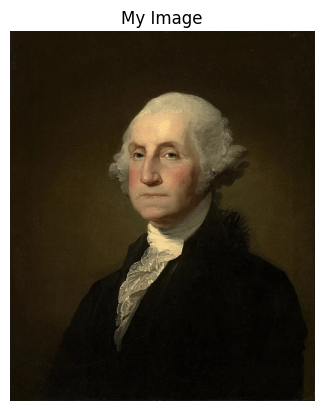

In [5]:
img_data = base64.b64decode(img_str2)
imgopen = Image.open(io.BytesIO(img_data))
img = np.array(imgopen)

plt.imshow(img)
plt.axis("off")
plt.title("My Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [6]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [7]:
# Task 1

In [8]:
def convolve(img, kernel):
  kh, kw = kernel.shape
  pad_h = kh // 2
  pad_w = kw // 2

  padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

  flipped_kernel = kernel[::-1, ::-1]

  h, w = img.shape
  out = np.zeros((h, w))

  for i in range(h):
    for j in range(w):
      patch = padded[i:i+kh, j:j+kw]
      out[i, j] = np.sum(patch * flipped_kernel)

  return out

In [9]:
#Task 2

In [10]:
def avg_blur_gray(img, k):
  kernel = np.ones((k, k)) / (k * k)
  return convolve(img, kernel)

In [11]:
def average_blur_rgb(img, k):
  h, w, c = img.shape
  out = np.zeros((h, w, c))
  kernel = np.ones((k, k)) / (k * k)

  out[:, :, 0] = convolve(img[:, :, 0], kernel)
  out[:, :, 1] = convolve(img[:, :, 1], kernel)
  out[:, :, 2] = convolve(img[:, :, 2], kernel)

  return out

In [12]:
#Task 3

In [13]:
def gaussian_kernel(ksize, sigma):
    kernel = np.zeros((ksize, ksize))
    c = ksize // 2
    for i in range(ksize):
        for j in range(ksize):
            x = i - c
            y = j - c
            kernel[i, j] = np.exp(-(x*x + y*y) / (2 * sigma**2))
    return kernel / np.sum(kernel)

In [14]:
def gaussian_blur_gray(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    return convolve(img, kernel)

In [15]:
def gaussian_blur_rgb(img, ksize, sigma):
  h, w, c = img.shape
  out = np.zeros((h, w, c))
  kernel = gaussian_kernel(ksize, sigma)

  out[:, :, 0] = convolve(img[:, :, 0], kernel)
  out[:, :, 1] = convolve(img[:, :, 1], kernel)
  out[:, :, 2] = convolve(img[:, :, 2], kernel)

  return out

In [16]:
gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

In [17]:
gray_blur = gaussian_blur_gray(gray, 31, 5)
img_blur= gaussian_blur_rgb(img, 31, 5) #Using k=6sigma+1 as suggested by GPT

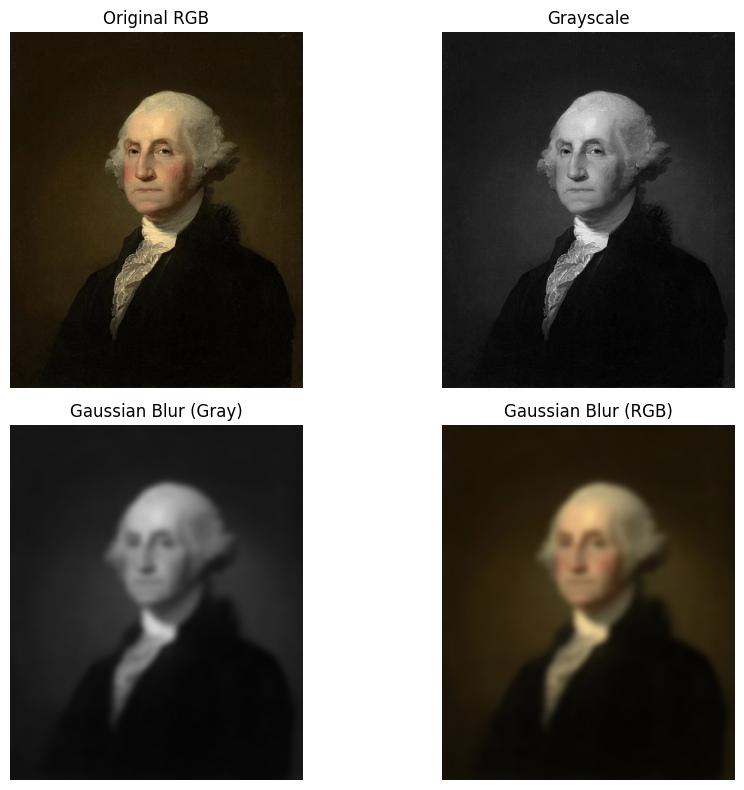

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].imshow(img)
ax[0, 0].set_title("Original RGB")
ax[0, 0].axis("off")

ax[0, 1].imshow(gray, cmap="gray")
ax[0, 1].set_title("Grayscale")
ax[0, 1].axis("off")

ax[1, 0].imshow(gray_blur, cmap="gray", vmin=0, vmax=255)
ax[1, 0].set_title("Gaussian Blur (Gray)")
ax[1, 0].axis("off")

img_blur_disp = np.clip(img_blur, 0, 255).astype(np.uint8)
ax[1, 1].imshow(img_blur_disp)
ax[1, 1].set_title("Gaussian Blur (RGB)")
ax[1, 1].axis("off")

plt.tight_layout()
plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [19]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [20]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

In [21]:
Gx = convolve(gray, sobel_x)
Gy = convolve(gray, sobel_y)

In [22]:
grad_mag = np.sqrt(Gx**2 + Gy**2)

In [23]:
grad_mag = grad_mag / grad_mag.max() * 255
grad_mag = grad_mag.astype(np.uint8)

In [24]:
edge_map = np.zeros_like(grad_mag)
edge_map[grad_mag >= 30] = 255 # pixels below 10 are made black

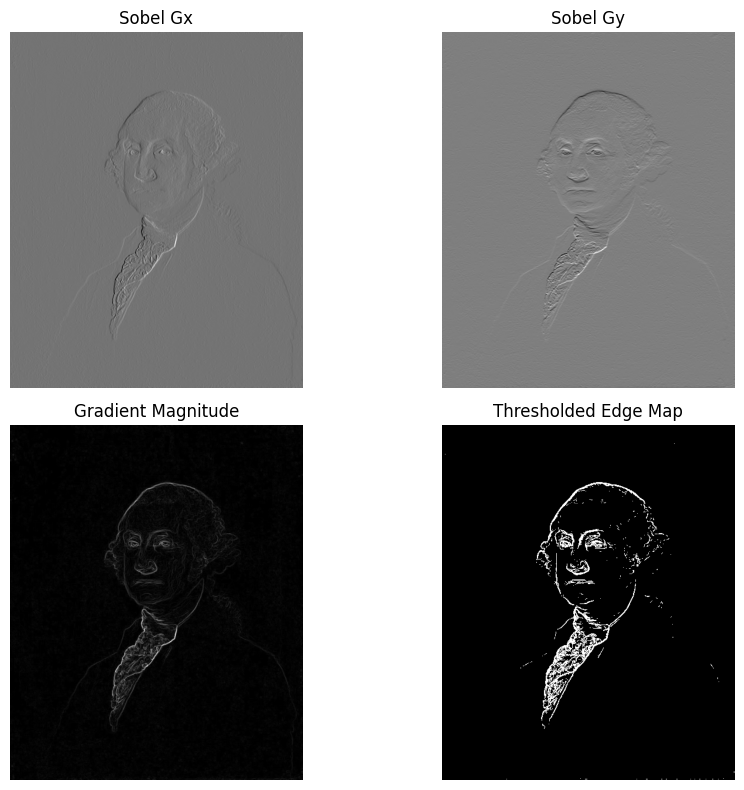

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].imshow(Gx, cmap="gray")
ax[0, 0].set_title("Sobel Gx")
ax[0, 0].axis("off")

ax[0, 1].imshow(Gy, cmap="gray")
ax[0, 1].set_title("Sobel Gy")
ax[0, 1].axis("off")

ax[1, 0].imshow(grad_mag, cmap="gray")
ax[1, 0].set_title("Gradient Magnitude")
ax[1, 0].axis("off")

ax[1, 1].imshow(edge_map, cmap="gray")
ax[1, 1].set_title("Thresholded Edge Map")
ax[1, 1].axis("off")

plt.tight_layout()
plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [26]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [27]:
# Task 1

In [28]:
import cv2

In [29]:
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

lap = convolve(gray, kernel)

alpha = 1
sharp = np.clip(gray - alpha * lap,0,255).astype(np.uint8)

In [30]:
lap_cv = cv2.Laplacian(gray, cv2.CV_64F)  # same as lecture, but used 64 to match depth, 32 was giving error
sharp_cv = np.clip(gray + lap_cv, 0, 255).astype(np.uint8)

In [31]:
print(np.max(lap+lap_cv))
print(np.min(lap+lap_cv))

1.7053025658242404e-13
-1.1368683772161603e-13


In [32]:
np.where(sharp_cv-sharp==255)

(array([143, 247, 399, 426, 460, 492, 492, 492, 493, 520, 527, 527, 567,
        569, 570, 570, 571, 571, 574, 576]),
 array([201, 369, 439, 198, 184, 290, 292, 294, 292, 304, 288, 295, 380,
        379, 379, 381, 379, 382, 377, 377]))

In [33]:
lap[143][201]+lap_cv[143][201]

np.float64(-7.105427357601002e-15)

In [34]:
gray[143][201]-gray[143][201]

np.float64(0.0)

In [35]:
np.max(sharp_cv-sharp)

np.uint8(255)

In [36]:
# NOW, somehow, sharp_cv-sharp is 255 at some points, even though it shouldnt be
# this seems like a glitch
# but we can conclude the following based on the max of lap+lap_cv

In [37]:
# hence we can see that the max in the sum array is very less
# this error is also only due to decimal operation precision being bad

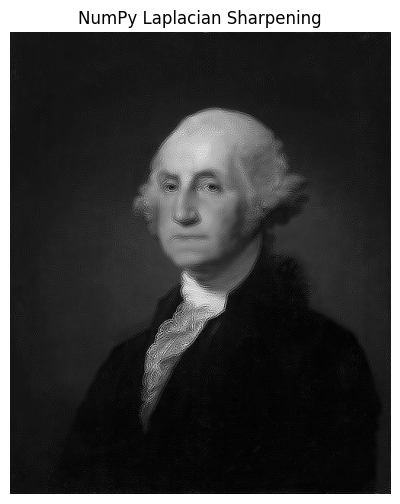

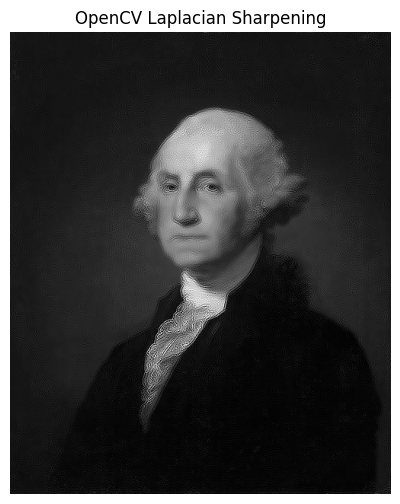

In [38]:
plt.figure(figsize=(6,6))
plt.imshow(sharp, cmap='gray')
plt.title("NumPy Laplacian Sharpening")
plt.axis("off")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(sharp_cv, cmap='gray')
plt.title("OpenCV Laplacian Sharpening")
plt.axis("off")
plt.show()

In [39]:
# I spent a lot of time here wondering why laplacian sharpening yields such a bad result as compared to unsharp masking
# figured that the sharpening seems bad only due to high alpha
# keeping alpha low, the images seem to resemble each other

In [40]:
# Task 2

In [41]:
gray_blur = gaussian_blur_gray(gray, 31, 5)

In [42]:
mask=gray-gray_blur

In [43]:
sharp2 = np.clip(gray+1*mask,0,255).astype(np.uint8)

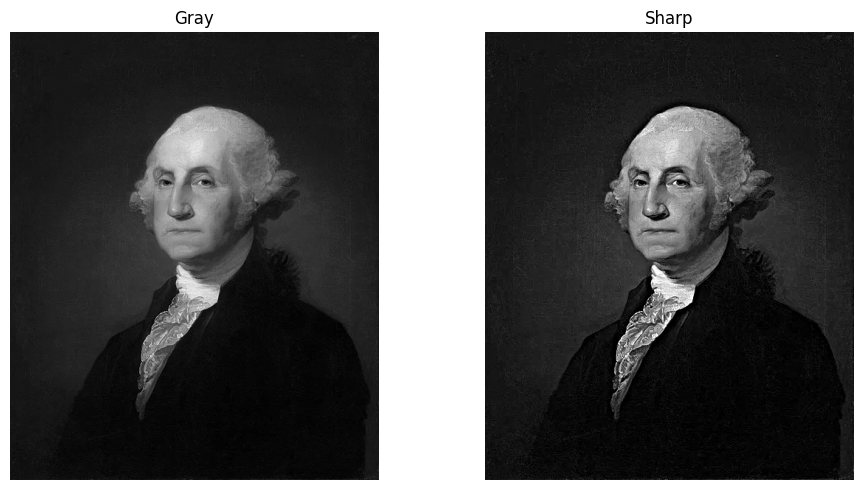

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Gray")
ax[0].axis("off")

ax[1].imshow(sharp2, cmap='gray')
ax[1].set_title("Sharp")
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [45]:
sharp2 = np.clip(gray+1*mask,0,255).astype(np.uint8)
sharp3 = np.clip(gray+0.5*mask,0,255).astype(np.uint8)
sharp4 = np.clip(gray+3*mask,0,255).astype(np.uint8)
sharp5 = np.clip(gray-0.8*mask,0,255).astype(np.uint8) # negative alpha causes blur
sharp6 = np.clip(gray - 0.4 * lap,0,255).astype(np.uint8) # from laplacian

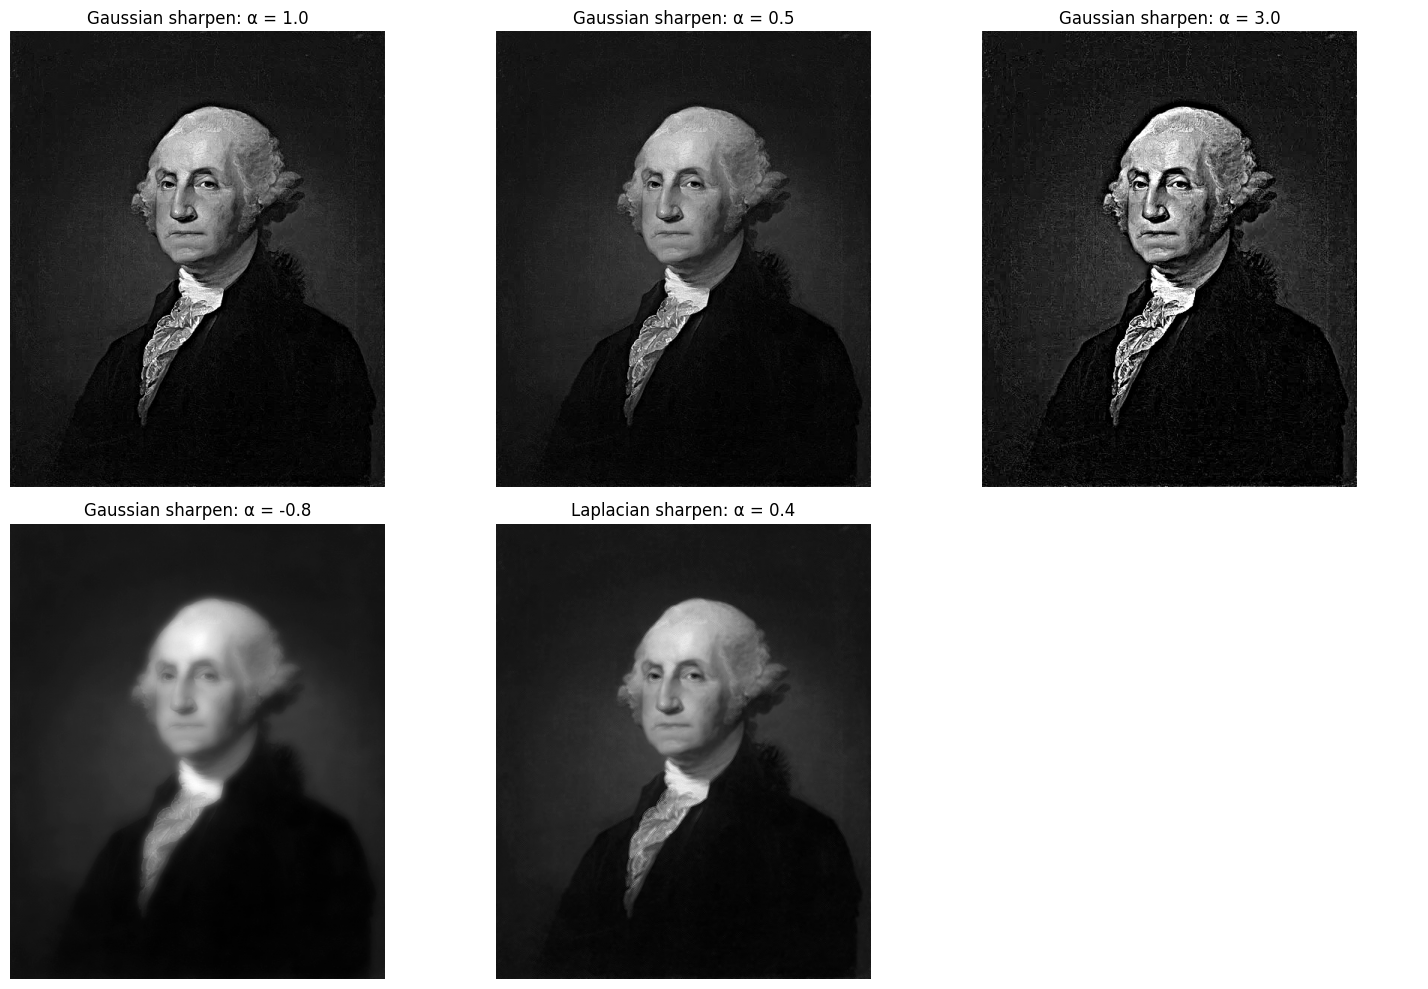

In [46]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(sharp2, cmap='gray')
ax[0, 0].set_title("Gaussian sharpen: α = 1.0")
ax[0, 0].axis("off")

ax[0, 1].imshow(sharp3, cmap='gray')
ax[0, 1].set_title("Gaussian sharpen: α = 0.5")
ax[0, 1].axis("off")

ax[0, 2].imshow(sharp4, cmap='gray')
ax[0, 2].set_title("Gaussian sharpen: α = 3.0")
ax[0, 2].axis("off")

ax[1, 0].imshow(sharp5, cmap='gray')
ax[1, 0].set_title("Gaussian sharpen: α = -0.8")
ax[1, 0].axis("off")

ax[1, 1].imshow(sharp6, cmap='gray')
ax[1, 1].set_title("Laplacian sharpen: α = 0.4")
ax[1, 1].axis("off")

ax[1, 2].axis("off")

plt.tight_layout()
plt.show()


In [47]:
#doubt why cant i get laplacian to be as good as gaussian with any alpha?

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [48]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [49]:
def show_magnitude_spectrum(alpha,title,sigma,kernalsize):
  gray_blur = gaussian_blur_gray(gray, sigma, kernalsize)
  mask=gray-gray_blur
  sharp1 = np.clip(gray+alpha*mask,0,255).astype(np.uint8)
  f = np.fft.fft2(sharp1)
  fshift = np.fft.fftshift(f)
  magnitude = np.abs(fshift)
  phase = np.angle(fshift)

  fig, ax = plt.subplots(1, 2, figsize=(10, 5))
  ax[0].imshow(20*np.log(magnitude + 1), cmap='gray')
  ax[0].set_title(title)
  ax[0].axis("off")

  ax[1].imshow(sharp1, cmap='gray')
  ax[1].set_title("Image")
  ax[1].axis("off")

  plt.tight_layout()
  plt.show()

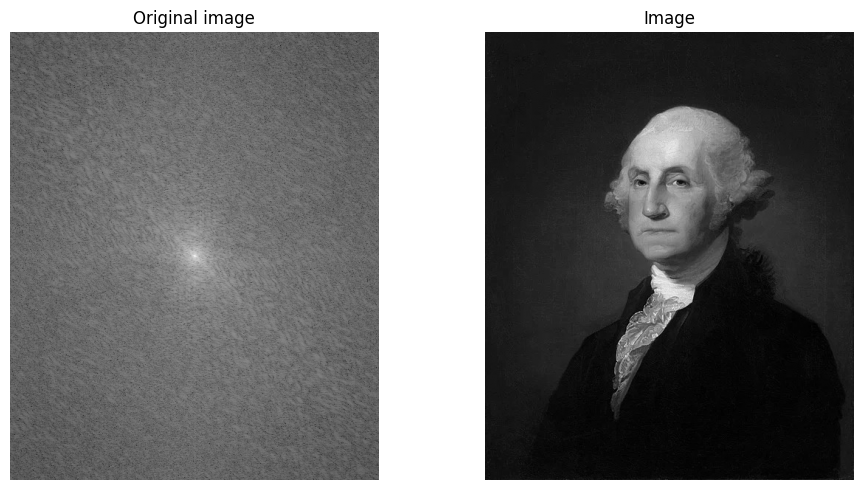

In [50]:
show_magnitude_spectrum(0,"Original image",31,5)

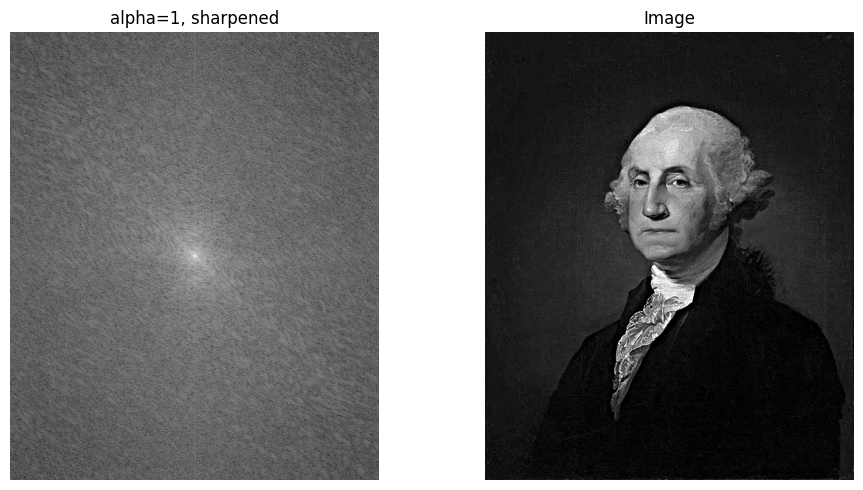

In [51]:
show_magnitude_spectrum(1,"alpha=1, sharpened",31,5)

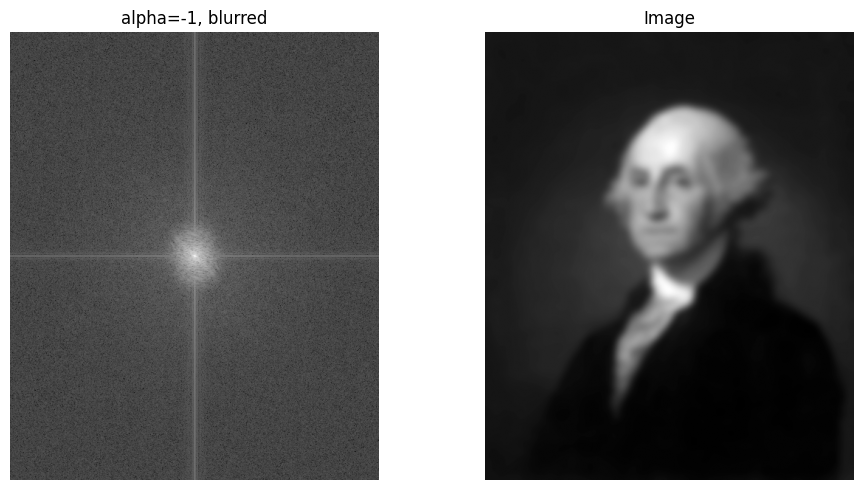

In [52]:
show_magnitude_spectrum(-1,"alpha=-1, blurred",31,5)

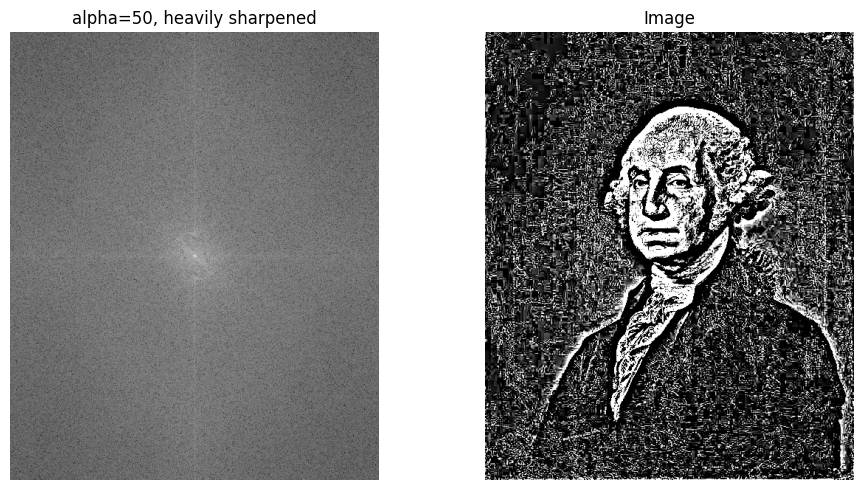

In [53]:
show_magnitude_spectrum(50,"alpha=50, heavily sharpened",31,5)

In [54]:
# observations
# as sharpening (alpha) increases, contribution from lower frequencies reduces, as we can see that the radius of the bright circle in the center decreases
# as we blur the image, the more alpha goes into negative, contribution from lower frequencies increases, as radius increases

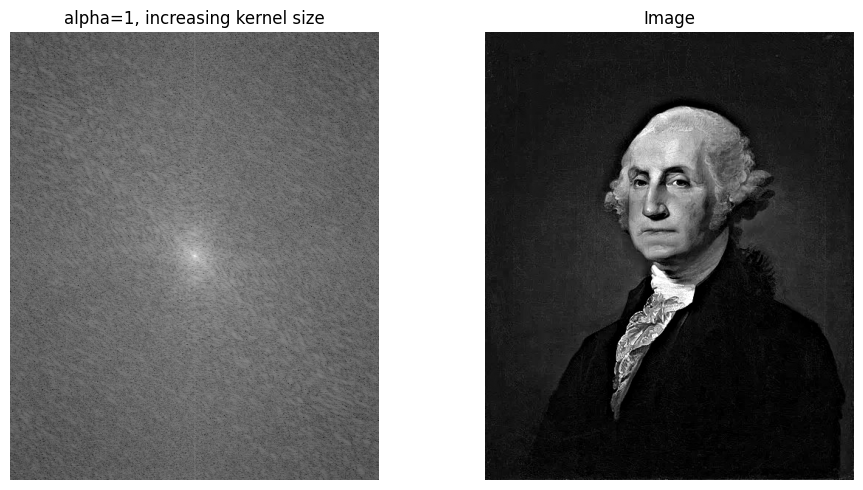

In [55]:
show_magnitude_spectrum(1,"alpha=1, increasing kernel size",31,51)

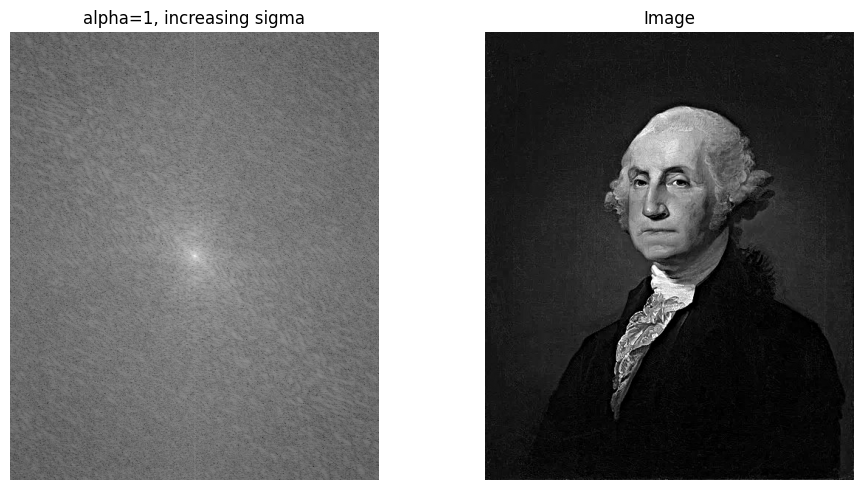

In [56]:
show_magnitude_spectrum(1,"alpha=1, increasing sigma",60,5)

In [57]:
# thus as we increase kernel size, keeping sigma same, the image does not change much
# as we increase sigma, sharpening becomes weaker, keeping kernal size the same, effect saturates and keeps coming closer to square filter, as the gaussian shape lies outside the kernel region
# as we decrease sigma, very little sharpening occurs as it becomes like delta function, taking into account only the central square
# thus an optimum value of sigma is required for efficient sharpening

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

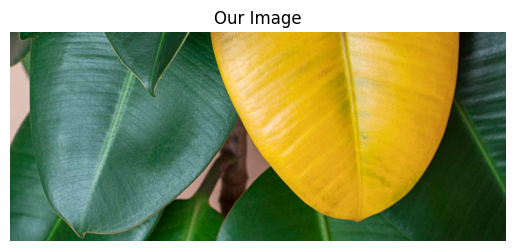

In [58]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [59]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [60]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

In [61]:
def gradient(gray):
  Gx = convolve(gray, sobel_x)
  Gy = convolve(gray, sobel_y)
  grad_mag = np.sqrt(Gx**2 + Gy**2)
  grad_mag = grad_mag / grad_mag.max() * 255
  grad_mag = grad_mag.astype(np.uint8)
  return grad_mag

In [ ]:
rgrad=gradient(img_part5[:,:,0])
ggrad=gradient(img_part5[:,:,1])
bgrad=gradient(img_part5[:,:,2])

In [ ]:
rlap=cv2.Laplacian(img_part5[:,:,0],cv2.CV_64F)
glap=cv2.Laplacian(img_part5[:,:,1],cv2.CV_64F)
blap=cv2.Laplacian(img_part5[:,:,2],cv2.CV_64F)

In [ ]:
# Laplacian seems more useful than gradient

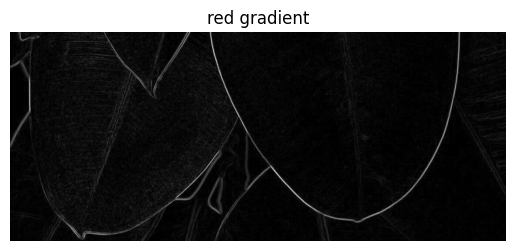

In [ ]:
plt.imshow(rgrad,cmap="gray")
plt.axis("off")
plt.title("red gradient")
plt.show()

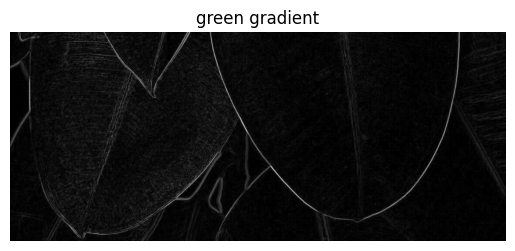

In [ ]:
plt.imshow(ggrad,cmap="gray")
plt.axis("off")
plt.title("green gradient")
plt.show()

In [ ]:
gedge_map = np.zeros_like(rgrad)
gedge_map[rgrad >= 80] = 255

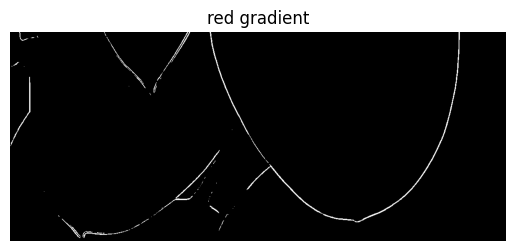

In [ ]:
plt.imshow(gedge_map,cmap="gray")
plt.axis("off")
plt.title("red gradient")
plt.show()

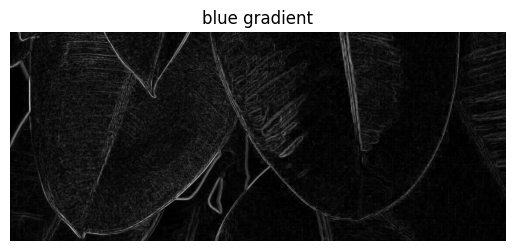

In [ ]:
plt.imshow(bgrad,cmap="gray")
plt.axis("off")
plt.title("blue gradient")
plt.show()

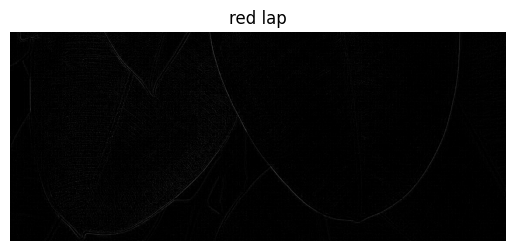

In [ ]:
plt.imshow(rlap,cmap="gray",vmin=0,vmax=255)
plt.axis("off")
plt.title("red lap")
plt.show()

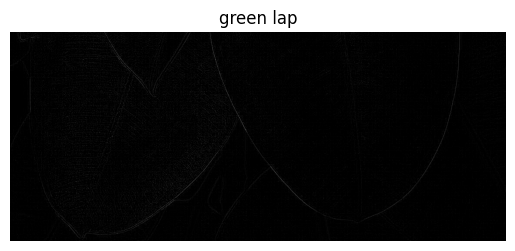

In [ ]:
plt.imshow(glap,cmap="gray",vmin=0,vmax=255)
plt.axis("off")
plt.title("green lap")
plt.show()

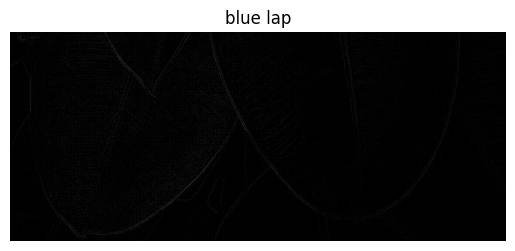

In [ ]:
plt.imshow(blap,cmap="gray",vmin=0,vmax=255)
plt.axis("off")
plt.title("blue lap")
plt.show()

In [ ]:
x=gradient(img_part5[:,:,0]+img_part5[:,:,1]-1.5*img_part5[:,:,2])

In [ ]:
x=np.clip(x,0,255)
x = x / x.max() * 255
x = x.astype(np.uint8)

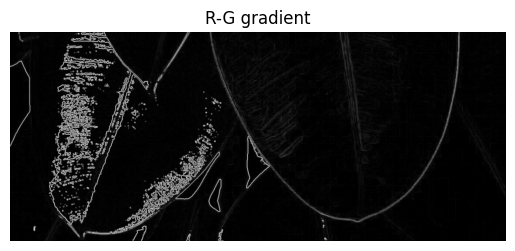

In [ ]:
plt.imshow((x),cmap="gray")
plt.axis("off")
plt.title("R-G gradient")
plt.show()

In [ ]:
y=cv2.Laplacian(img_part5[:,:,0]+img_part5[:,:,1]-1.5*img_part5[:,:,2],cv2.CV_64F)

In [ ]:
np.clip(y,0,255)

array([[0. , 0.5, 0. , ..., 4.5, 1. , 0. ],
       [0.5, 1. , 0. , ..., 2.5, 0. , 0. ],
       [0. , 0. , 1. , ..., 0.5, 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 1. ],
       [0. , 0. , 1. , ..., 0. , 0.5, 1. ],
       [0. , 0. , 1. , ..., 0. , 2. , 2. ]])

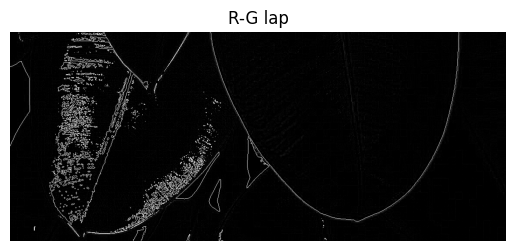

In [ ]:
plt.imshow((y),cmap="gray",vmin=0,vmax=255)
plt.axis("off")
plt.title("R-G lap")
plt.show()

In [ ]:
# i have no idea how to move forward, tried many things. would love to discuss.

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
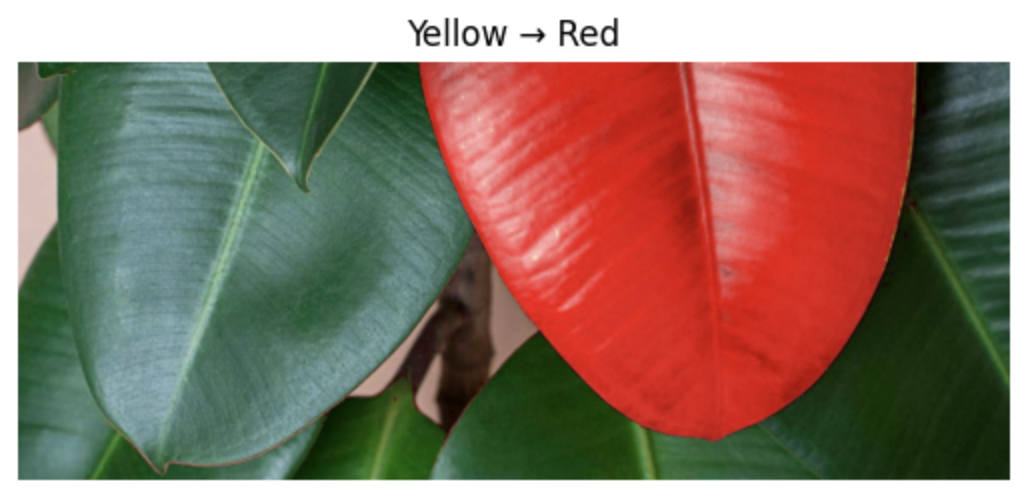

Also, we can change to a less brighter colour
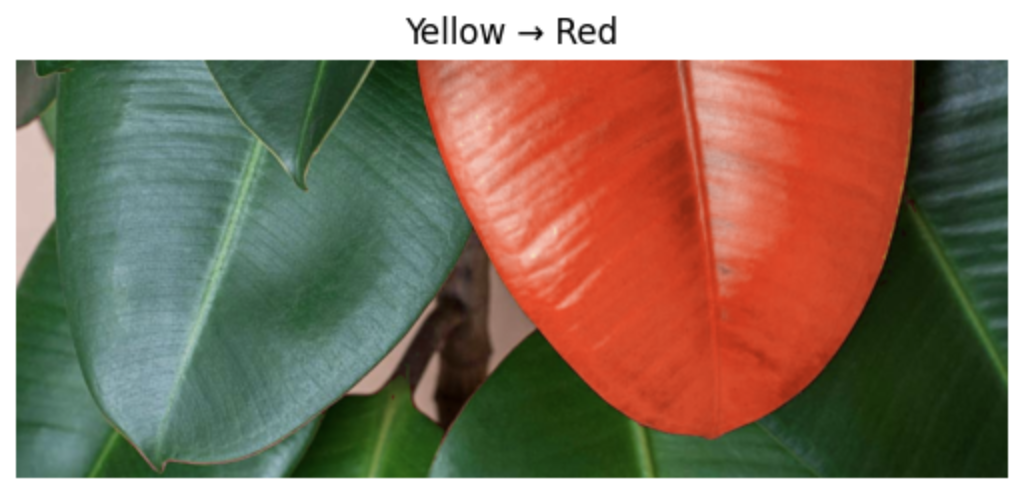

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
def rgb_to_hsv(img):
  img = img.astype(np.float32)
  R = img[:,:,0] / 255.0
  G = img[:,:,1] / 255.0
  B = img[:,:,2] / 255.0 #normalising

  Cmax = np.max(img[:,:,0:3], axis=2) / 255.0
  Cmin = np.min(img[:,:,0:3], axis=2) / 255.0#finding max and min of the three channels per pixel

  diff = Cmax - Cmin#chroma difference

  H = np.zeros_like(Cmax)

  mask_r = (Cmax == R) & (diff != 0)
  mask_g = (Cmax == G) & (diff != 0)
  mask_b = (Cmax == B) & (diff != 0) #to check which channel is maximum

  H[mask_r] = 60 * (((G[mask_r] - B[mask_r]) / diff[mask_r]) % 6)
  H[mask_g] = 60 * (((B[mask_g] - R[mask_g]) / diff[mask_g]) + 2)
  H[mask_b] = 60 * (((R[mask_b] - G[mask_b]) / diff[mask_b]) + 4) #from formula

  H = H / 2 #because opencv stores from 0 to 179

  S = np.zeros_like(Cmax)
  S[Cmax != 0] = (diff[Cmax != 0] / Cmax[Cmax != 0]) * 255 #for all pixels where cmax is not zero, compute saturation using diff/cmax, convert it to 0–255 scale, and store it in S. For pixels where cmax is zero, leave saturation as zero

  V = Cmax * 255 #scale value

  hsv = np.zeros_like(img, dtype=np.uint8)
  hsv[:,:,0] = H.astype(np.uint8)
  hsv[:,:,1] = S.astype(np.uint8)
  hsv[:,:,2] = V.astype(np.uint8) #compile final hsv together

  return hsv


In [488]:
import cv2

(np.float64(-0.5), np.float64(1139.5), np.float64(479.5), np.float64(-0.5))

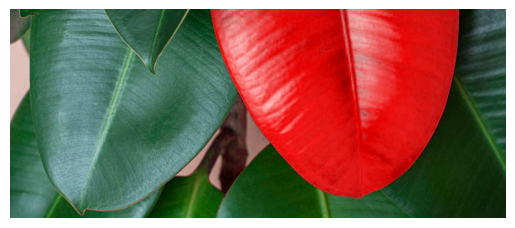

In [500]:
hsv = rgb_to_hsv(img_part5)

h = hsv[..., 0]
s = hsv[..., 1]
v = hsv[..., 2]

yellow= (h > 10) & (h < 30) & (s > 0) & (v > 0)
h[yellow] = 0
hsv[..., 0] = h

out = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

out = np.clip(out, 0, 255).astype(np.uint8)
plt.imshow(out)
plt.axis("off")